In [3]:
from allensdk.core.nwb_data_set import NwbDataSet
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py 
import os
from matplotlib.backends.backend_pdf import PdfPages
import pickle as pkl
import efel
os.chdir('neuron_genetic_alg')
from config import *
os.chdir('../')

#np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['agg.path.chunksize'] = 10000

# if you ran the examples above, you will have a NWB file here
cell_file_name = f'./model_responses/{model_num}.nwb'
cell_data_set = NwbDataSet(cell_file_name)

allen_file_name = f'./model_responses/{model_num}_allen_model_response_full_dt.nwb'
allen_data_set = NwbDataSet(allen_file_name)

sota_file_name = './compare_response2.hdf5'
sota_data_set = h5py.File(sota_file_name, 'r')

sweep_numbers = sorted(cell_data_set.get_experiment_sweep_numbers())

# sweep_number = sweep_numbers[0] 
# sweep_data = data_set.get_sweep(sweep_number)

# # spike times are in seconds relative to the start of the sweep
# spike_times = data_set.get_spike_times(sweep_number)

# # stimulus is a numpy array in amps
# stimulus = sweep_data['stimulus']

# # response is a numpy array in volts
# reponse = sweep_data['response']

# # sampling rate is in Hz
#sampling_rate = sweep_data['sampling_rate']
#print(sampling_rate)

# # start/stop indices that exclude the experimental test pulse (if applicable)
# index_range = sweep_data['index_range']

In [4]:
import allensdk
allensdk.__version__

'2.13.2'

In [5]:
from scalebary import add_scalebar
my_dpi = 96

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 3
tick_minor = 0
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

In [11]:
def cm_to_in(cm):
    return cm/2.54

def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
    fig, axs = plt.subplots(2,figsize=(cm_to_in(8),cm_to_in(9)),gridspec_kw={'height_ratios': [1, 4]})
    times = list(range(len(stim)))
    #axs[0].set_title(title_stim)
    axs[0].plot(times,stim, color='black', linewidth=0.5)
    axs[0].locator_params(axis='x', nbins=5)
    axs[0].locator_params(axis='y', nbins=5)
    
    add_scalebar(axs[0])
    #axs[0].set_title('Voltage Response '+title_volts)
    volts_target = volts[0]
    print(volts_target)
    volts_best_response = volts[1]
    
    axs[1].plot(times,volts_target, label='target', color='black',linewidth=1)
    axs[1].plot(times,volts_best_response, label='response', color='red',linewidth=1)
    axs[1].locator_params(axis='x', nbins=5)
    axs[1].locator_params(axis='y', nbins=8)
    add_scalebar(axs[1])
    
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    #plt.tight_layout(pad=1)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=my_dpi, bbox_inches="tight")
    return fig,axs

# def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
#     plt.figure(figsize=(cm_to_in(16), cm_to_in(12)))
#     plt.subplot(2, 1, 1)
#     plt.title(title_stim)
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Amplitude (nA)')
#     plt.plot(stim, color='black', linewidth=0.7)
#     plt.subplot(2, 1, 2)
#     plt.title('Voltage Response '+title_volts)
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Amplitude (mV)')
#     plt.plot(volts, color='black')
#     plt.tight_layout(pad=1)
#     plt.show()
#     if file_path_to_save:
#         plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

In [7]:
import h5py

initial_ind = 150000

short_sq_ind = [170000, 240000]
long_sq_ind = [initial_ind, 460000]
ramp_ind = [initial_ind, 1710000]
noise_ind_1 = [initial_ind, 1200000]
noise_ind_2 = [1900000, 2800000]
noise_ind_3 = [3500000, 4400000]
sq_0_5_ind = [initial_ind, 450000]
sq_2_ind = [initial_ind, 700000]

# stim_file_path = '../stims/allen_data_stims_10000.hdf5'
# volts_file_path = '../target_volts/allen_data_target_volts_10000.hdf5'

In [24]:
def filtr(lis, ind_lis):
    return lis[ind_lis[0]:ind_lis[1]]

# def plot_sampled(sweep_number, stimulus, cell_response, allen_response, sota_response, dt):
#     fig = plt.figure(figsize=(cm_to_in(10), cm_to_in(20)))
#     plt.subplot(3, 1, 1)
#     plt.title('Stim number '+str(sweep_number))
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Amplitude (nA)')
#     plt.plot(np.arange(len(stimulus))*dt, stimulus, color='black', linewidth=0.7)
#     plt.subplot(3, 1, 2)
#     plt.title('Allen\'s Model Response')
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Amplitude (mV)')
#     plt.plot(np.arange(len(stimulus))*dt, cell_response, color='black')
#     plt.plot(np.arange(len(stimulus))*dt, allen_response, color='crimson')
#     plt.subplot(3, 1, 3)
#     plt.title('CoMParE Model Response')
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Amplitude (mV)')
#     plt.plot(np.arange(len(stimulus))*dt, cell_response, color='black')
#     plt.plot(np.arange(len(stimulus))*dt, sota_response, color='crimson')
#     plt.tight_layout(pad=1)
#     plt.show()
#     print('\n \n')
#     return fig

def plot_sampled(sweep_number, stimulus, cell_response, allen_response, sota_response, dt):
    fig, axs = plt.subplots(3, figsize=(cm_to_in(8),cm_to_in(9)), gridspec_kw={'height_ratios': [1, 4, 4]})
    times = np.arange(len(stimulus))*dt
    axs[0].set_title(sweep_number)
    axs[0].plot(times, stimulus, color='black', linewidth=0.5)
    axs[0].locator_params(axis='x', nbins=5)
    axs[0].locator_params(axis='y', nbins=5)
    
    add_scalebar(axs[0])
    #axs[0].set_title('Voltage Response '+sweep_number)
#     volts_target = volts[0]
    print(sweep_number)
#     volts_best_response = volts[1]
    
    axs[1].plot(times, cell_response, label='Cell response', color='black',linewidth=1)
    axs[1].plot(times, allen_response, label='Allen model response', color='red',linewidth=1)
    axs[1].locator_params(axis='x', nbins=5)
    axs[1].locator_params(axis='y', nbins=8)
    add_scalebar(axs[1])
    
    axs[2].plot(times, cell_response, label='Cell response', color='black',linewidth=1)
    axs[2].plot(times, sota_response, label='CoMParE model response', color='red',linewidth=1)
    axs[2].locator_params(axis='x', nbins=5)
    axs[2].locator_params(axis='y', nbins=8)
    add_scalebar(axs[2])
    
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    #plt.tight_layout(pad=1)
    plt.show()
#     if file_path_to_save:
#         plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=my_dpi, bbox_inches="tight")
    return fig #,axs


In [16]:
def read_and_plot(sweep_list, save_path=None, pdf=None):
    if save_path:
        if os.path.isfile(save_path):
            os.remove(save_path)
        save_file = h5py.File(save_path, 'w')
        sweep_keys = []
    for sweep_number in sweep_list:
        sweep_data = cell_data_set.get_sweep(sweep_number)
        allen_sweep_data = allen_data_set.get_sweep(sweep_number)
        stimulus = sweep_data['stimulus']*10**9
        cell_response = sweep_data['response'][4000:]*10**3
        sampling_rate = sweep_data['sampling_rate']
        meta_data = cell_data_set.get_sweep_metadata(sweep_number)
        stim_kind = meta_data['aibs_stimulus_name']
        allen_response = allen_sweep_data['response'][4000:]*10**3
        sota_response = sota_data_set[str(sweep_number)+'_response'][:]
        sota_dt = sota_data_set[str(sweep_number)+'_dt'][:]
        print('sota dt :', sota_dt, 'sampling rate:', sampling_rate)
        if not isinstance(stim_kind, str):
            stim_kind = stim_kind.decode('ascii')
        print('Stim kind: '+stim_kind)
        if 'Test' in stim_kind:
            print('Test:', sweep_number)
        if 'Short Square' in stim_kind:
            stimulus = filtr(stimulus, short_sq_ind)
            cell_response = filtr(cell_response, short_sq_ind)
            allen_response = filtr(allen_response, short_sq_ind)
            sota_response = filtr(sota_response, short_sq_ind)
        if 'Long Square' in stim_kind:
            stimulus = filtr(stimulus, long_sq_ind)
            cell_response = filtr(cell_response, long_sq_ind)
            allen_response = filtr(allen_response, long_sq_ind)
            sota_response = filtr(sota_response, long_sq_ind)
        if 'Ramp' in stim_kind:
            stimulus = filtr(stimulus, ramp_ind)
            cell_response = filtr(cell_response, ramp_ind)
            allen_response = filtr(allen_response, ramp_ind)
            sota_response = filtr(sota_response, ramp_ind)
        if 'Square - 0.5ms Subthreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_0_5_ind)
            cell_response = filtr(cell_response, sq_0_5_ind)
            allen_response = filtr(allen_response, sq_0_5_ind)
            sota_response = filtr(sota_response, sq_0_5_ind)
        if 'Square - 2s Suprathreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_2_ind)
            cell_response = filtr(cell_response, sq_2_ind)
            allen_response = filtr(allen_response, sq_2_ind)
            sota_response = filtr(sota_response, sq_2_ind)
        if not 'Noise' in stim_kind and not 'Test' in stim_kind:
            fig = plot_sampled(sweep_number, stimulus, cell_response, allen_response, sota_response, sota_dt)
            if save_path:
                save_file.create_dataset(str(sweep_number)+'_stimulus', data=stimulus)
                save_file.create_dataset(str(sweep_number)+'_cell_response', data=cell_response)
                save_file.create_dataset(str(sweep_number)+'_allen_model_response', data=allen_response)
                save_file.create_dataset(str(sweep_number)+'_compare_model_response', data=sota_response)
                save_file.create_dataset(str(sweep_number)+'_dt', data=np.array([1/sampling_rate*1000]))
                sweep_keys.append(str(sweep_number))
            if pdf:
                pdf.savefig(fig)
                plt.close(fig)
        if 'Noise' in stim_kind:
            stimulus1 = filtr(stimulus, noise_ind_1)
            cell_response1 = filtr(cell_response, noise_ind_1)
            allen_response1 = filtr(allen_response, noise_ind_1)
            sota_response1 = filtr(sota_response, noise_ind_1)
            stimulus2 = filtr(stimulus, noise_ind_2)
            cell_response2 = filtr(cell_response, noise_ind_2)
            allen_response2 = filtr(allen_response, noise_ind_2)
            sota_response2 = filtr(sota_response, noise_ind_2)
            stimulus3 = filtr(stimulus, noise_ind_3)
            cell_response3 = filtr(cell_response, noise_ind_3)
            allen_response3 = filtr(allen_response, noise_ind_3)
            sota_response3 = filtr(sota_response, noise_ind_3)
            fig1 = plot_sampled(sweep_number, stimulus1, cell_response1, allen_response1, sota_response1, sota_dt)
            fig2 = plot_sampled(sweep_number, stimulus2, cell_response2, allen_response2, sota_response2, sota_dt)
            fig3 = plot_sampled(sweep_number, stimulus3, cell_response3, allen_response3, sota_response3, sota_dt)
            if save_path:
                save_file.create_dataset(str(sweep_number)+'_1_stimulus', data=stimulus1)
                save_file.create_dataset(str(sweep_number)+'_1_cell_response', data=cell_response1)
                save_file.create_dataset(str(sweep_number)+'_1_allen_model_response', data=allen_response1)
                save_file.create_dataset(str(sweep_number)+'_1_compare_model_response', data=sota_response1)
                save_file.create_dataset(str(sweep_number)+'_1_dt', data=np.array([1/sampling_rate*1000]))
                save_file.create_dataset(str(sweep_number)+'_2_stimulus', data=stimulus2)
                save_file.create_dataset(str(sweep_number)+'_2_cell_response', data=cell_response2)
                save_file.create_dataset(str(sweep_number)+'_2_allen_model_response', data=allen_response2)
                save_file.create_dataset(str(sweep_number)+'_2_compare_model_response', data=sota_response2)
                save_file.create_dataset(str(sweep_number)+'_2_dt', data=np.array([1/sampling_rate*1000]))
                save_file.create_dataset(str(sweep_number)+'_3_stimulus', data=stimulus3)
                save_file.create_dataset(str(sweep_number)+'_3_cell_response', data=cell_response3)
                save_file.create_dataset(str(sweep_number)+'_3_allen_model_response', data=allen_response3)
                save_file.create_dataset(str(sweep_number)+'_3_compare_model_response', data=sota_response3)
                save_file.create_dataset(str(sweep_number)+'_3_dt', data=np.array([1/sampling_rate*1000]))
                sweep_keys.append(str(sweep_number)+'_1')
                sweep_keys.append(str(sweep_number)+'_2')
                sweep_keys.append(str(sweep_number)+'_3')
            if pdf:
                pdf.savefig(fig1)
                plt.close(fig1)
                pdf.savefig(fig2)
                plt.close(fig2)
                pdf.savefig(fig3)
                plt.close(fig3)
    if save_path:
        save_file.create_dataset('sweep_numbers', data=np.array(sweep_list))
        save_file.create_dataset('sweep_keys', data=np.array([np.string_(e) for e in sweep_keys]))
        save_file.close()

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp


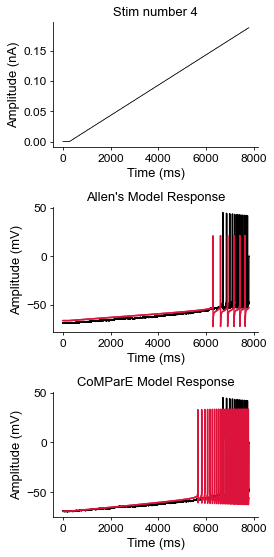


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp


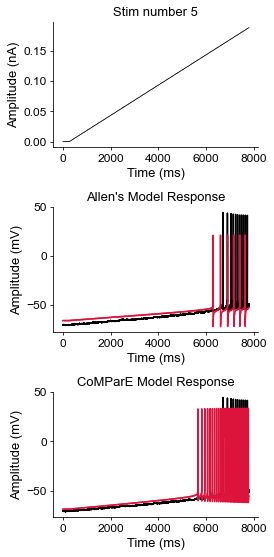


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp


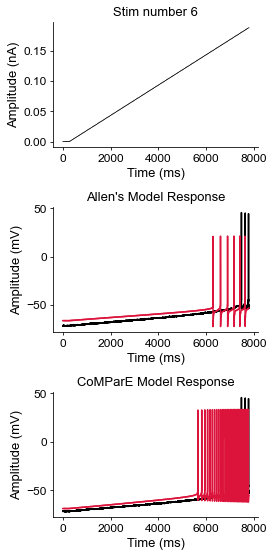


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


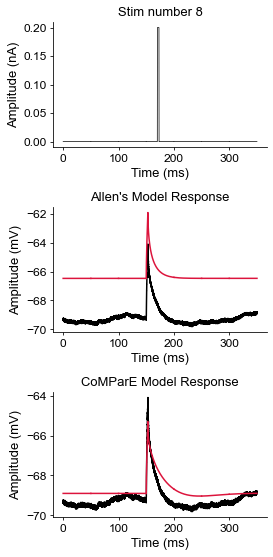


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


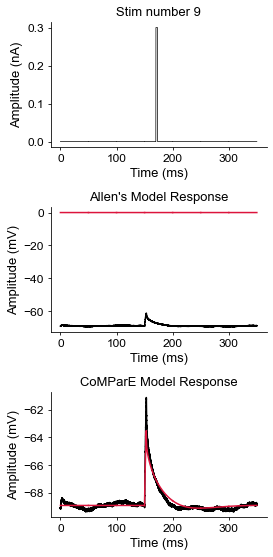


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


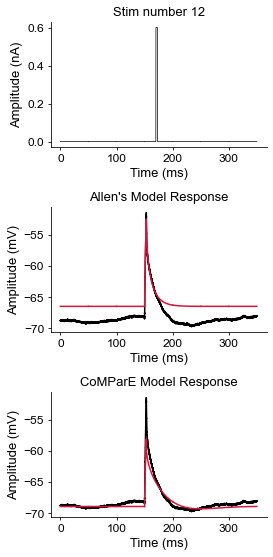


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


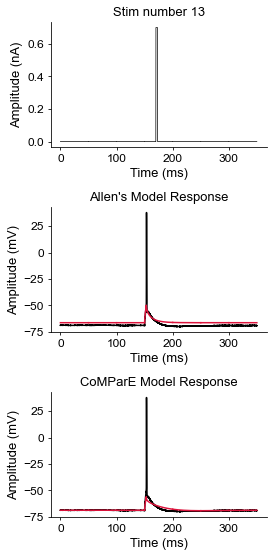


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


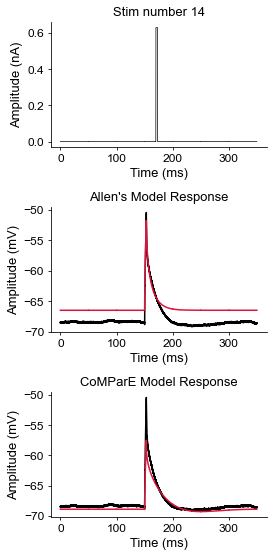

KeyboardInterrupt: 

In [10]:
# # Save parsed stimulus and responses
pdf = PdfPages('comparison.pdf')
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
read_and_plot(sweep_numbers, parsed_stim_response_path, pdf)
pdf.close()

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp
4


/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be re

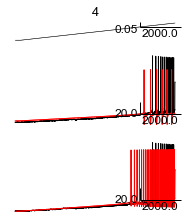

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square
23


/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be re

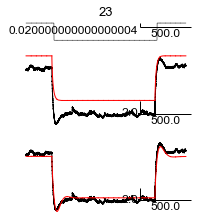

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square
43


/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be re

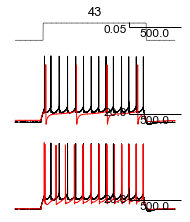

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Noise 1
53


/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be re

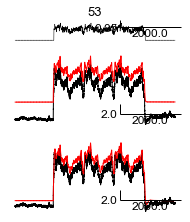

/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)


53


/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)


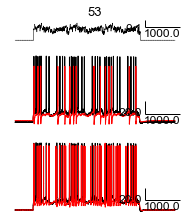

/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  self.xlabel = TextArea(labelx, minimumdescent=False)
/Users/kyunggeunkim/Dropbox/Paper_plots/compare_vs_allen_plot_generator/scalebary.py:33: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be re

53


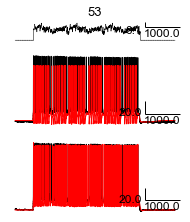

In [25]:
# # Save parsed stimulus and responses
pdf = PdfPages('comparison_selected.pdf')
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
read_and_plot([4, 23, 43, 53], parsed_stim_response_path, pdf)
pdf.close()

In [14]:
def eval_efel(feature_name, target, data, dt):
    def diff_lists(lis1, lis2):
        def safe_mean(lis):
            if np.size(lis) == 0:
                return 0
            return np.mean(lis)
        if lis1 is None and lis2 is None:
            return 0
        if lis1 is None:
            lis1 = [0]
        if lis2 is None:
            lis2 = [0]
        len1, len2 = len(lis1), len(lis2)
        if len1 > len2:
            lis2 = np.concatenate((lis2, np.zeros(len1 - len2)), axis=0)
        if len2 > len1:
            lis1 = np.concatenate((lis1, np.zeros(len2 - len1)), axis=0)
        return np.sqrt(safe_mean((lis1 - lis2)**2))
    time_stamps = len(target)
    time = np.cumsum([dt for i in range(time_stamps)])
    curr_trace_target, curr_trace_data = {}, {}
    stim_start, stim_end = dt, time_stamps*dt
    curr_trace_target['T'], curr_trace_data['T'] = time, time
    curr_trace_target['V'], curr_trace_data['V'] = target, data
    curr_trace_target['stim_start'], curr_trace_data['stim_start'] = [stim_start], [stim_start]
    curr_trace_target['stim_end'], curr_trace_data['stim_end'] = [stim_end], [stim_end]
    traces = [curr_trace_target, curr_trace_data]
    traces_results = efel.getFeatureValues(traces, [feature_name], raise_warnings=False)
    diff_feature = diff_lists(traces_results[0][feature_name], traces_results[1][feature_name])
    return diff_feature, traces_results

In [15]:
# Read saved file fresh
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
data_file = h5py.File(parsed_stim_response_path, 'r')
sweep_keys = [e.decode('ascii') for e in data_file['sweep_keys']]

In [16]:
# Adjust which features and stims we want to compute
import efel
all_features = efel.api.getFeatureNames()

In [17]:
def show_efel(efel_feature_dict, feature_names, pdf, title):
    def normalize_efel_score(cell_features, allen_features, compare_features):
        cell_feature_mean = np.mean(cell_features)
        if cell_feature_mean != 0:
            return np.array(cell_features)/cell_feature_mean, np.array(allen_features)/cell_feature_mean,\
                    np.array(compare_features)/cell_feature_mean 
        else:
            return np.array(cell_features), np.array(allen_features), np.array(compare_features) 
    #feature_names = list(efel_feature_dict.keys())
    width=0.4
    fig, ax = plt.subplots(figsize=(15, 5))
    for i, l in enumerate(feature_names):
        efel_data = efel_feature_dict[l]
        cell_features, allen_features, compare_features = efel_data["cell_features"], efel_data["allen_features"], efel_data["compare_features"]
        if cell_features is None or len(cell_features)==0:
            cell_features = [0]
            continue
        if allen_features is None or len(allen_features)==0:
            allen_features = [0]
            continue
        if compare_features is None or len(compare_features)==0:
            compare_features = [0]
            continue
        x_cell = np.ones(len(cell_features))*i + (np.random.rand(len(cell_features))*width/3.-width/3.)
        x_allen = np.ones(len(allen_features))*i + (np.random.rand(len(allen_features))*width/3.)
        x_compare = np.ones(len(compare_features))*i + (np.random.rand(len(compare_features))*width/3.+width/3.)
        cell_features, allen_features, compare_features = normalize_efel_score(cell_features, allen_features, compare_features)
        ax.scatter(x_cell, cell_features, color="black", s=25)
        ax.scatter(x_allen, allen_features, color="blue", s=25)
        ax.scatter(x_compare, compare_features, color="crimson", s=25)

    ax.set_xticks(range(len(feature_names)))
    ax.set_xticklabels(feature_names, rotation=90)
    ax.scatter([], [], color="black", label="Cell response")
    ax.scatter([], [], color="blue", label="Allen's model response")
    ax.scatter([], [], color="crimson", label="CoMPare model response")
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.5, 1))
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

def grade_efel(efel_feature_dict, draw_feature_names, pdf, title):
    def normalize_efel_score(cell_features, allen_features, compare_features):
        cell_feature_mean = np.max(np.concatenate([cell_features, allen_features, compare_features]))
        cell_feature_min = np.min(np.concatenate([cell_features, allen_features, compare_features]))
        res1 = (np.array(cell_features) - cell_feature_min) / (cell_feature_mean - cell_feature_min)
        res2 =  (np.array(allen_features) - cell_feature_min) / (cell_feature_mean - cell_feature_min)
        res3 = (np.array(compare_features) - cell_feature_min )/ (cell_feature_mean - cell_feature_min)
        return res1, res2, res3
                    
        # else:
        #     return np.array(cell_features)-cell_feature_min, np.array(allen_features)- cell_feature_min, np.array(compare_features) - cell_feature_min 
    
    feature_names = list(efel_feature_dict.keys())
    width=0.4
    fig, ax = plt.subplots(figsize=(15, 5))
    max_score = 0
    allen_score = 0 
    compare_score = 0
    i = 0
    for feat_name in feature_names:
        efel_data = efel_feature_dict[feat_name]
        cell_features, allen_features, compare_features = efel_data["cell_features"], efel_data["allen_features"], efel_data["compare_features"]
        if cell_features is None or len(cell_features)==0:
            cell_features = []
        if allen_features is None or len(allen_features)==0:
            allen_features = []
        if compare_features is None or len(compare_features)==0:
            compare_features = []
        x_cell = np.ones(len(cell_features))*i + (np.random.rand(len(cell_features))*width/3.-width/3.)
        x_allen = np.ones(len(allen_features))*i + (np.random.rand(len(allen_features))*width/3.)
        x_compare = np.ones(len(compare_features))*i + (np.random.rand(len(compare_features))*width/3.+width/3.)
        if len(cell_features) != 0 and len(allen_features) != 0 and len(compare_features) != 0:
            cell_features, allen_features, compare_features = normalize_efel_score(cell_features, allen_features, compare_features)
        if feat_name in draw_feature_names:
            ax.scatter(x_cell, cell_features, color="black", s=25)
            ax.scatter(x_allen, allen_features, color="blue", s=25)
            ax.scatter(x_compare, compare_features, color="crimson", s=25)
            i += 1
        if len(allen_features) > 0 and len(cell_features) > 1 and len(compare_features) > 1:
            max_score += 1 #np.mean(cell_features)
            # shift features positive
            # score_min = abs(np.min(np.concatenate([cell_features, allen_features, compare_features])))
            # adj_cell_feat = cell_features + score_min
            # adj_allen_feat = allen_features + score_min
            # adj_compare_feat = compare_features + score_min
            # ABS SCALED DISTANCE so abs(feat_dist) / scale
            allen_score += 1 - np.nanmean(np.abs(allen_features[:len(cell_features)] - cell_features[:len(allen_features)]) )#/ (adj_cell_feat[:len(adj_allen_feat)] ))
            compare_score += 1 - np.nanmean(np.abs(compare_features[:len(cell_features)] - cell_features[:len(compare_features)])) # / (adj_cell_feat[:len(adj_compare_feat)] ))

    ax.set_xticks(range(len(draw_feature_names)))
#     xticks = ax.get_xticks()
#     ax.set_xticks(np.linspace(0,max(xticks), len(draw_feature_names)))
    ax.set_xticklabels(draw_feature_names, rotation=90)
    ax.scatter([], [], color="black", label="Cell response")
    ax.scatter([], [], color="blue", label="Allen's model response")
    ax.scatter([], [], color="crimson", label="CoMPare model response")
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_title(title)
    #pdf.savefig(fig, bbox_inches='tight')
    #plt.close(fig)
    return max_score, allen_score, compare_score

    
    
    
    

In [18]:
# efel_data = {}
# for sweep_key in sweep_keys:
#     print(f"processing {sweep_key} sweep for {len(all_features)}")
#     stim_val = data_file[sweep_key+'_stimulus'][:]
#     cell_response = data_file[sweep_key+'_cell_response'][:]
#     allen_response = data_file[sweep_key+'_allen_model_response'][:]
#     compare_response = data_file[sweep_key+'_compare_model_response'][:]
#     dt_val = data_file[sweep_key+'_dt'][0]
#     #plot_sampled(sweep_key, stim_val, cell_response, allen_response, compare_response)
#     efel_feature_dict = {}
#     for efel_name in all_features:
#         print(f'efel name : {efel_name}')
#         l2_val_allen, efel_values_allen = eval_efel(efel_name, cell_response, allen_response, dt_val)
#         l2_val_compare, efel_values_compare = eval_efel(efel_name, cell_response, compare_response, dt_val)
#         efel_feature_dict[efel_name] = {"cell_features": efel_values_allen[0][efel_name],\
#                                         "allen_features": efel_values_allen[1][efel_name],\
#                                         "compare_features": efel_values_compare[1][efel_name]}
# #         print('eFEL name:', efel_name)
# #         #print(efel_name+" value for target:", efel_values[0][efel_name])
# #         #print(efel_name+" value for best model response:", efel_values[1][efel_name])
# #         print("Euclidean Distance for Allen's Model:", l2_val_allen)
# #         print("Euclidean Distance for CoMParE Model:", l2_val_compare)
# #         print('\n')
#     efel_data[sweep_key] = efel_feature_dict
# #     show_efel(efel_feature_dict)

In [19]:
# import pickle as pkl


In [20]:
# import pickle as pkl
# pkl.dump(efel_data, open('./efel_data/efel_dataset_model_488683425.pkl', 'wb'))

In [21]:
efel_data = pkl.load(open(f'./efel_data/efel_dataset_model_{model_num}.pkl', 'rb'))

In [22]:
selected_efel_names = efel.api.getFeatureNames()[:5]
# selected_efel_names = np.random.choice(efel.api.getFeatureNames(), 10)
selected_efel_names = ['AP_amplitude','burst_mean_freq','min_voltage_between_spikes','AP_amplitude_diff' \
'AP_peak_downstroke', 'all_ISI_values', 'AHP_time_from_peak', 'Spikecount_stimint','steady_state_voltage', 'AP_rise_rate_change'] 

print(selected_efel_names)


['AP_amplitude', 'burst_mean_freq', 'min_voltage_between_spikes', 'AP_amplitude_diffAP_peak_downstroke', 'all_ISI_values', 'AHP_time_from_peak', 'Spikecount_stimint', 'steady_state_voltage', 'AP_rise_rate_change']


In [23]:
# for sweep_key in sweep_keys:
#     try:
#         efel_feature_dict = efel_data[sweep_key]
#         show_efel(efel_feature_dict, selected_efel_names)
#     except:
#         continue

/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_98746/3089482787.py:46: RuntimeWarning: invalid value encountered in true_divide
  res1 = (np.array(cell_features) - cell_feature_min) / (cell_feature_mean - cell_feature_min)
/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_98746/3089482787.py:47: RuntimeWarning: invalid value encountered in true_divide
  res2 =  (np.array(allen_features) - cell_feature_min) / (cell_feature_mean - cell_feature_min)
/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_98746/3089482787.py:48: RuntimeWarning: invalid value encountered in true_divide
  res3 = (np.array(compare_features) - cell_feature_min )/ (cell_feature_mean - cell_feature_min)
/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_98746/3089482787.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

KeyboardInterrupt: 

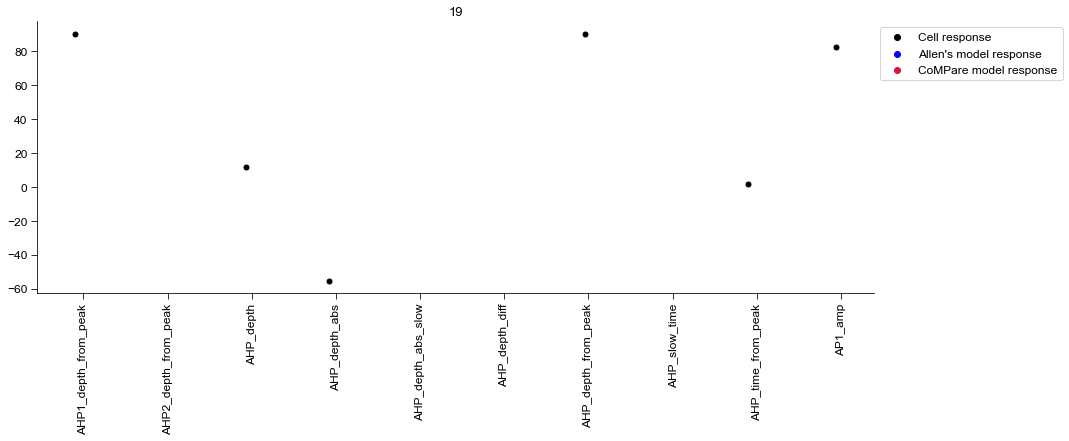

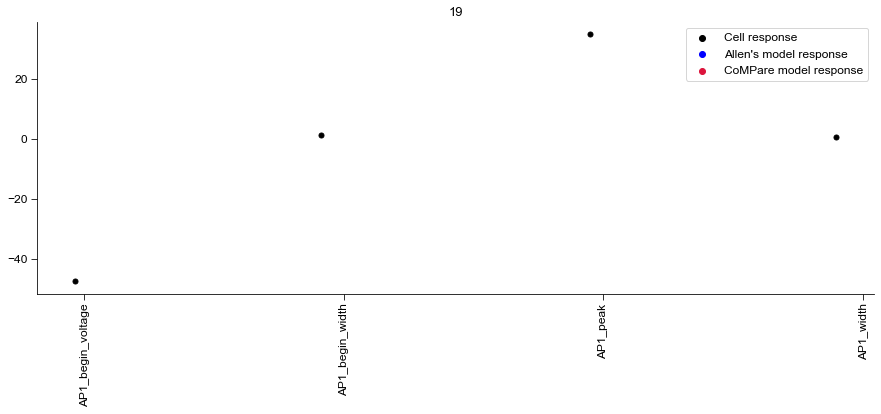

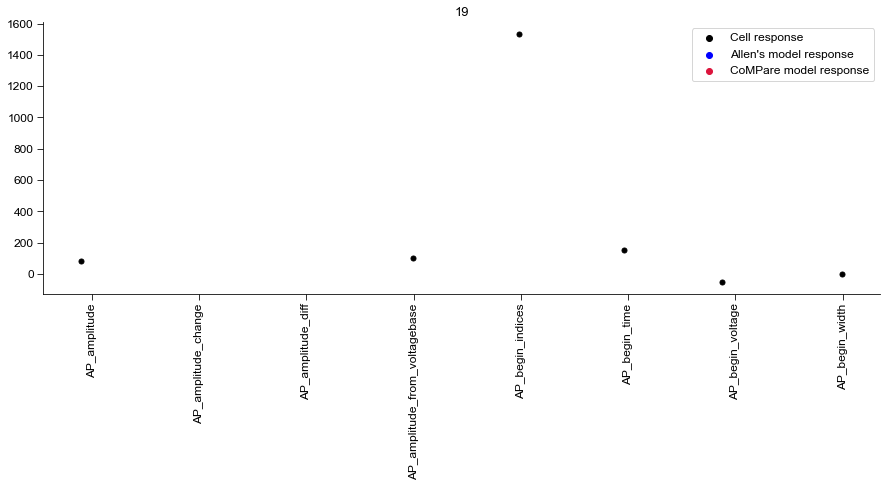

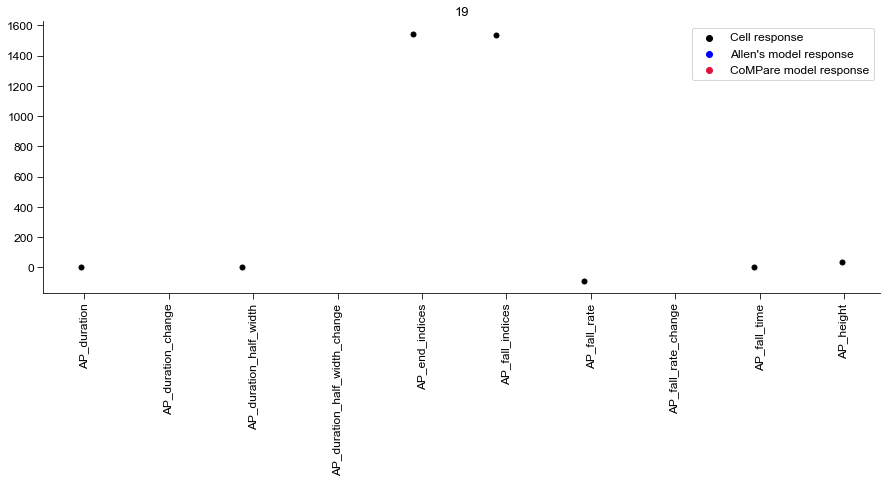

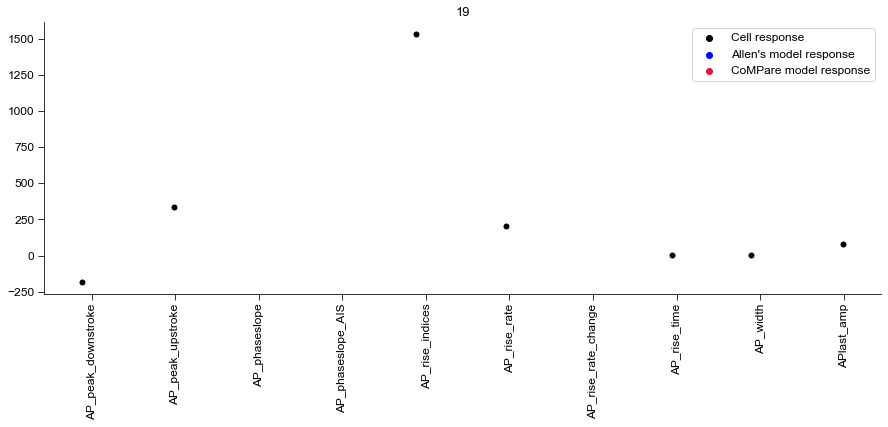

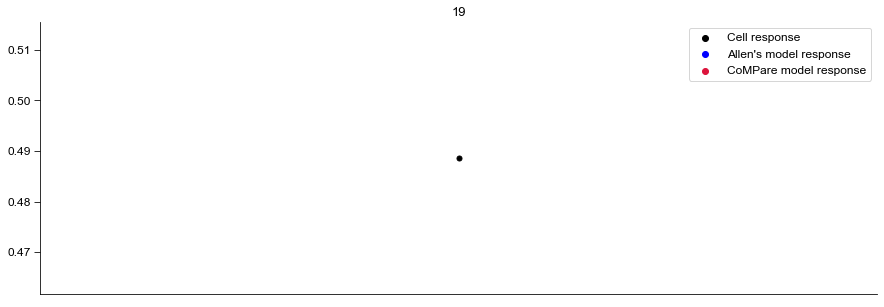

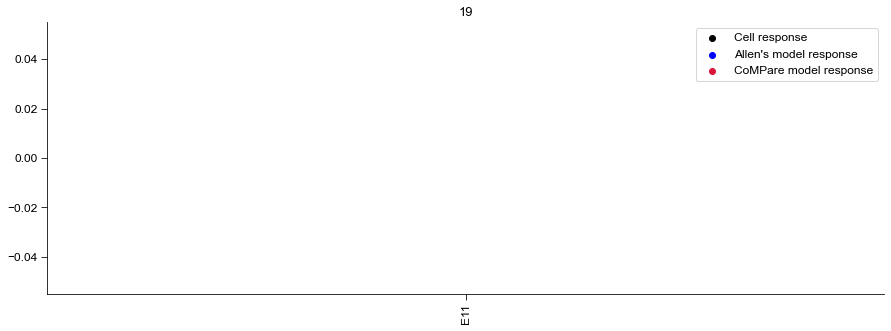

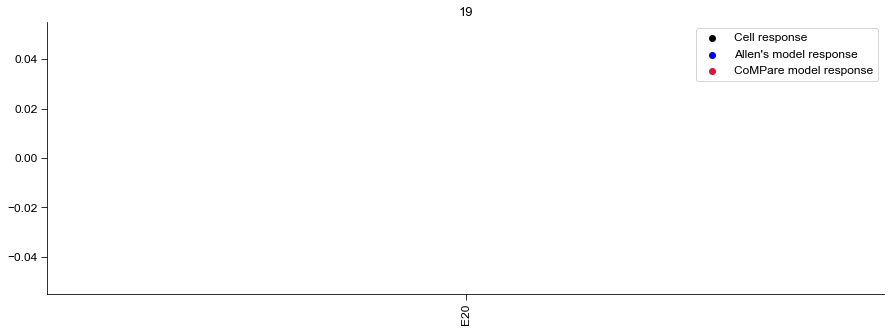

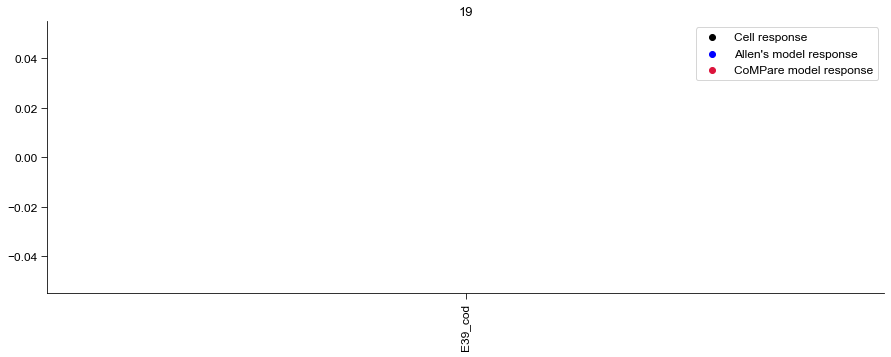

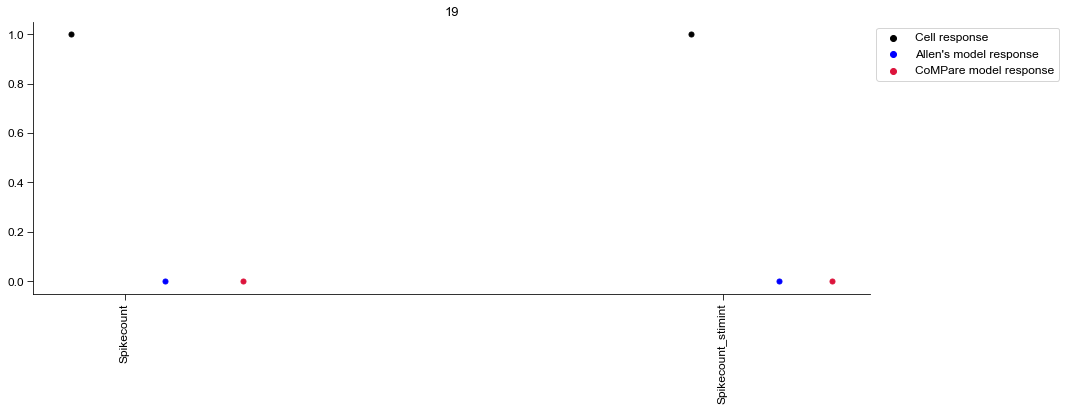

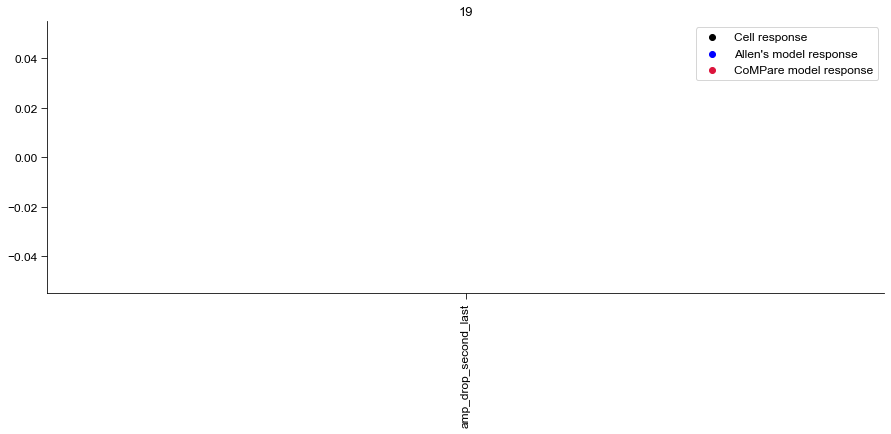

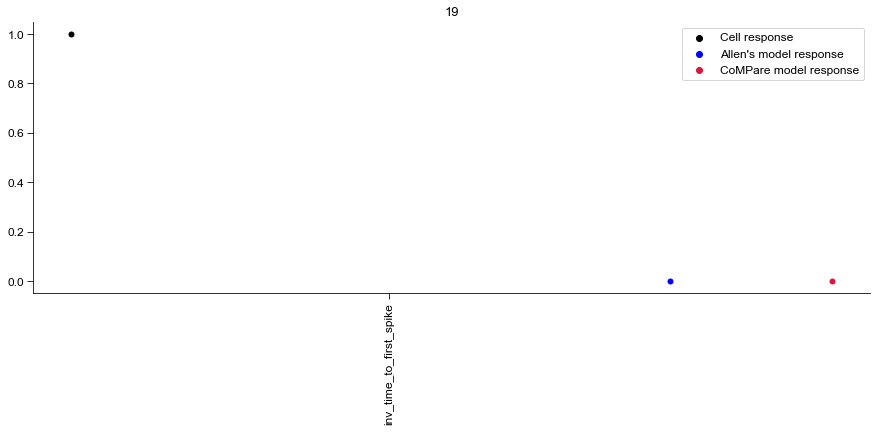

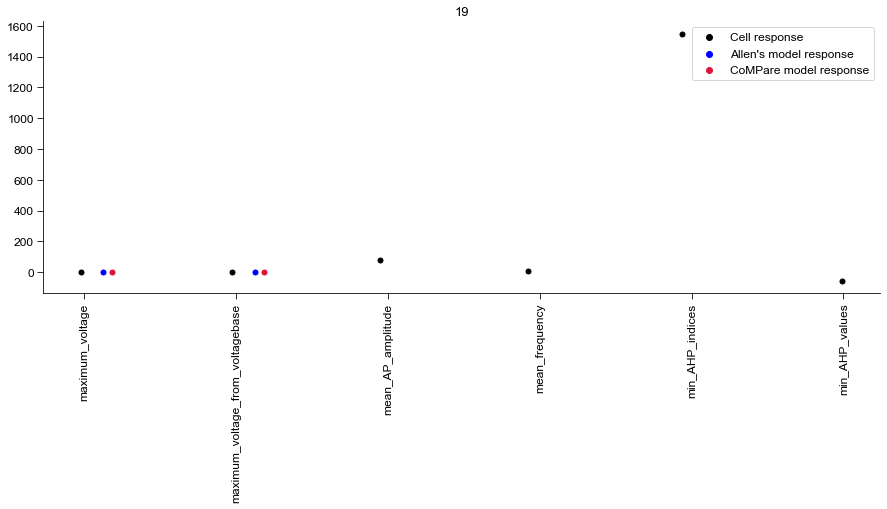

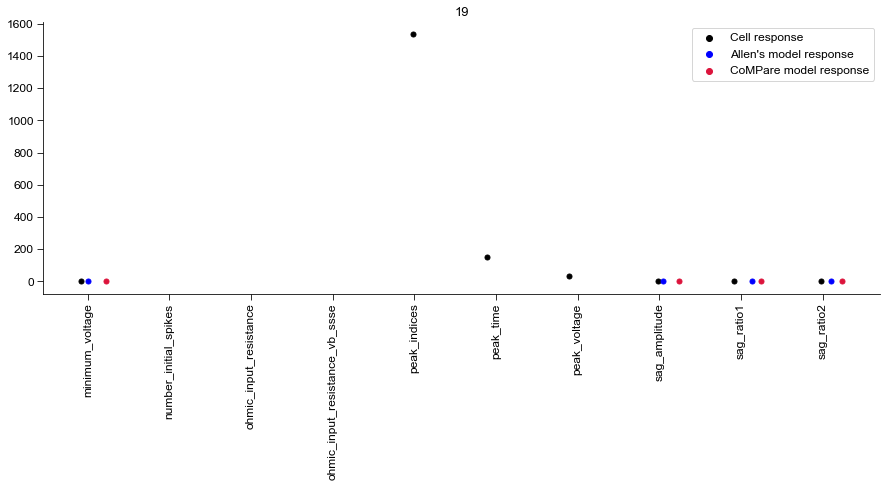

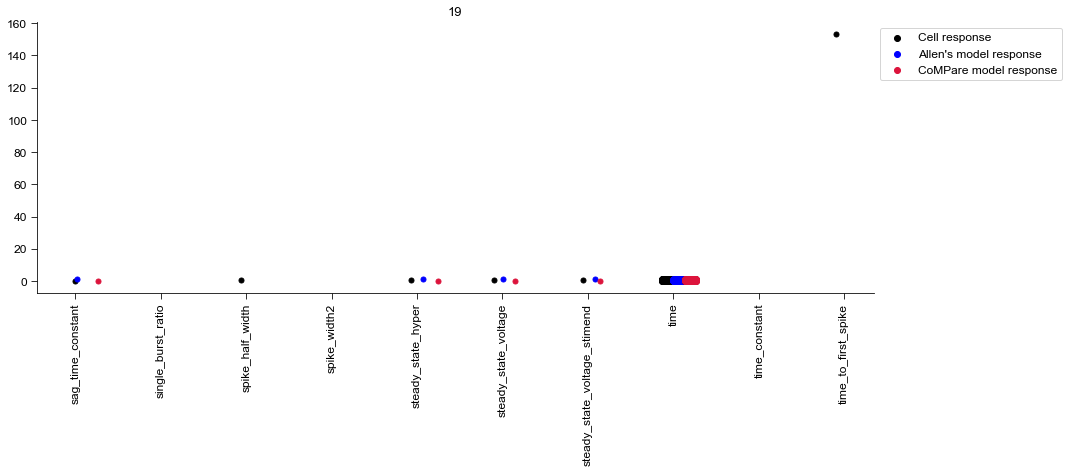

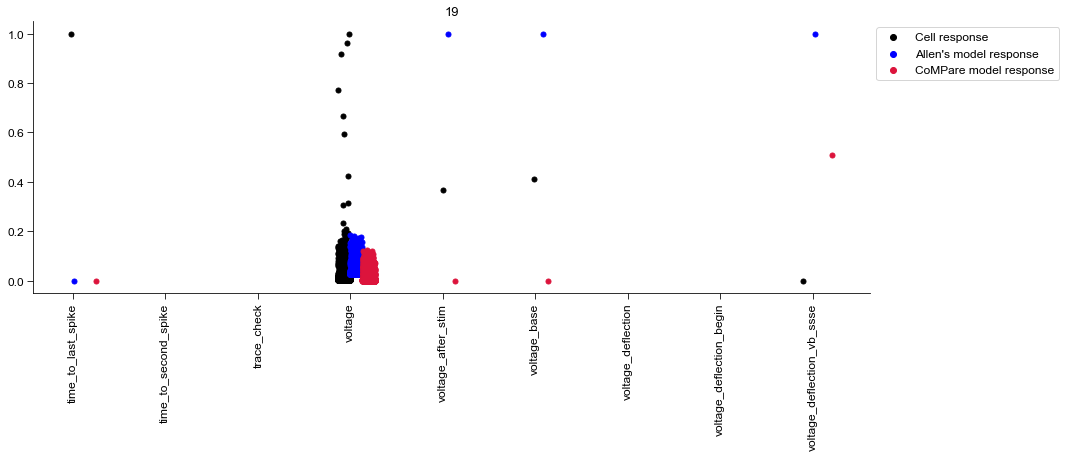

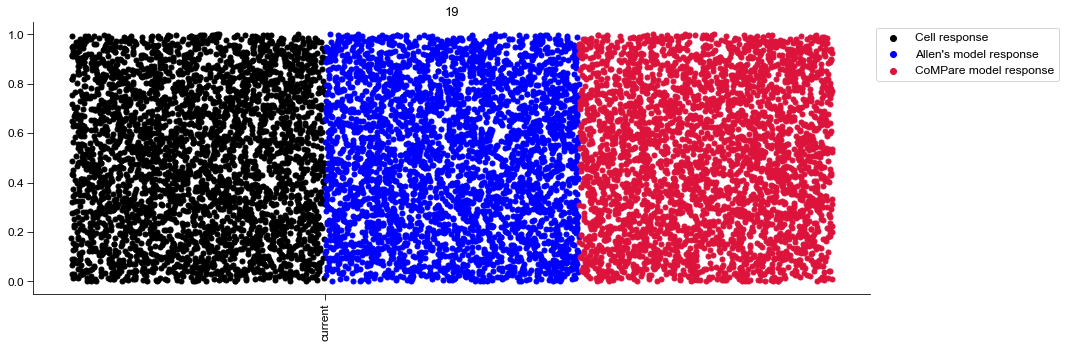

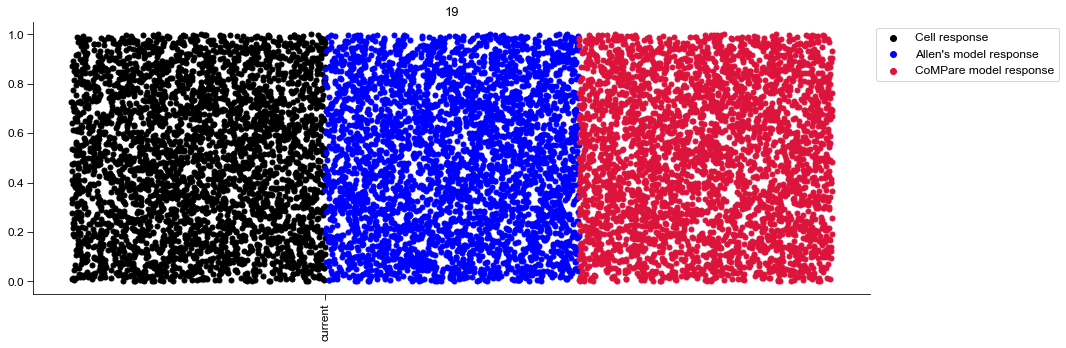

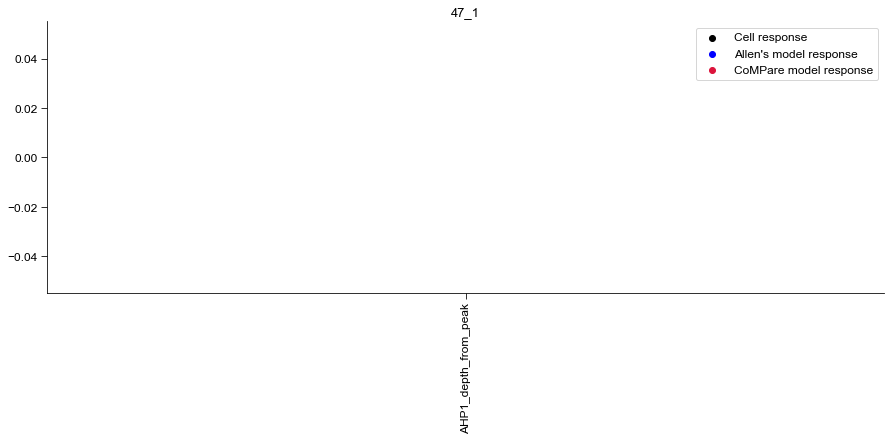

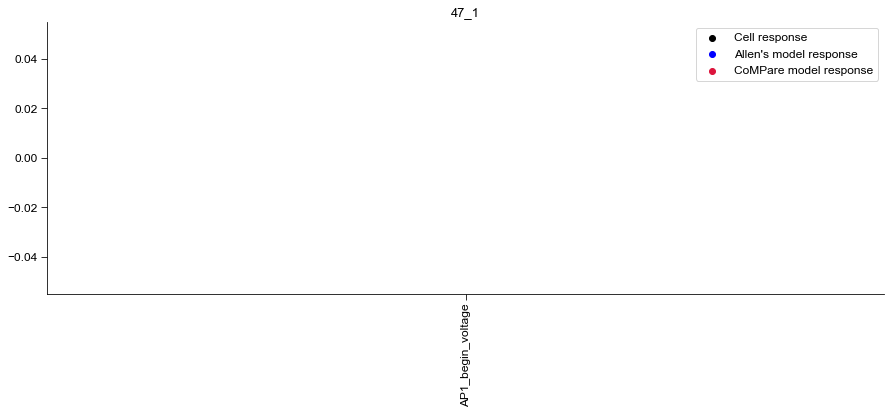

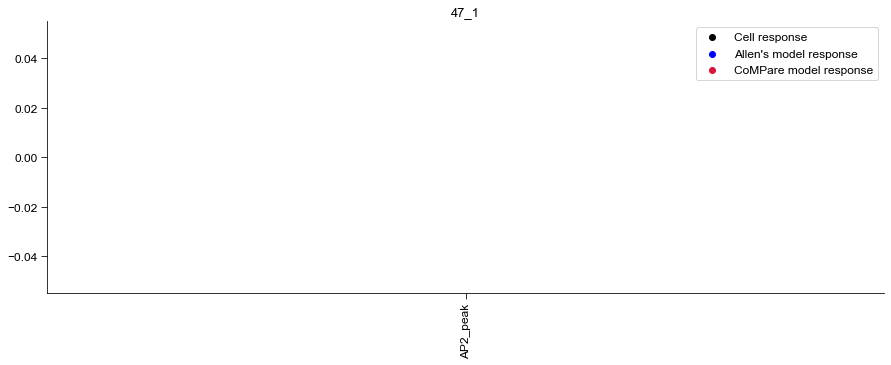

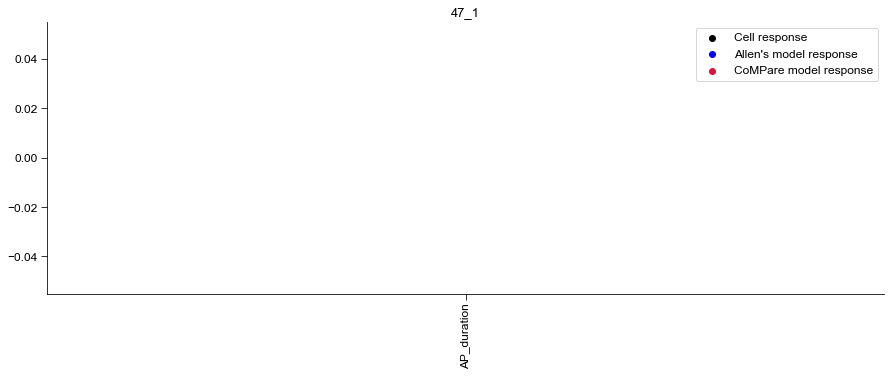

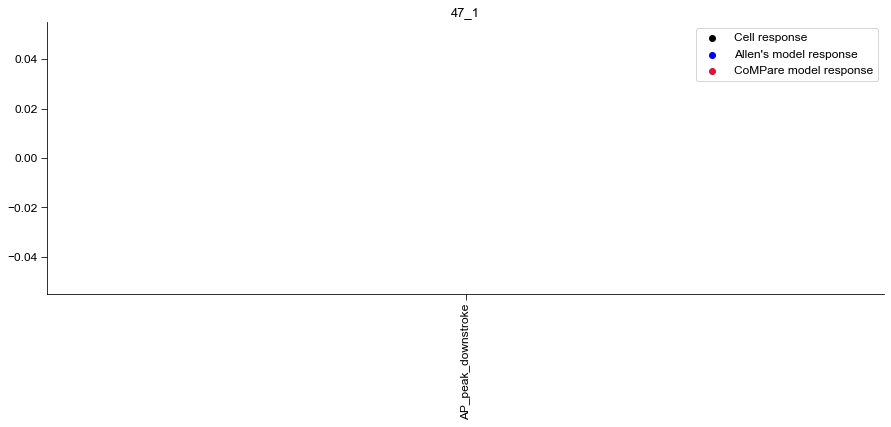

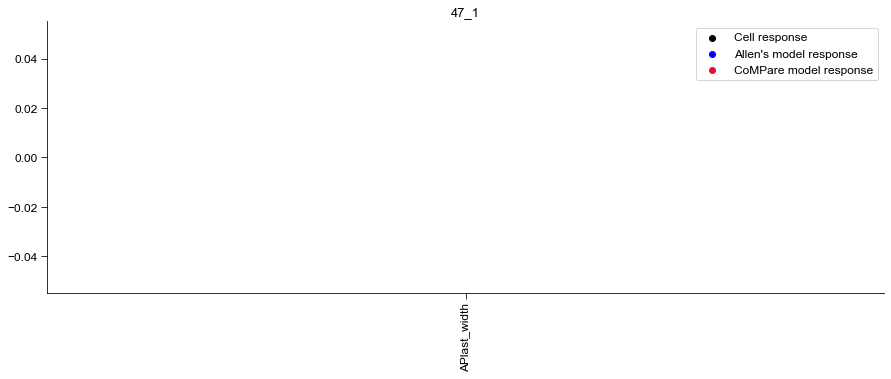

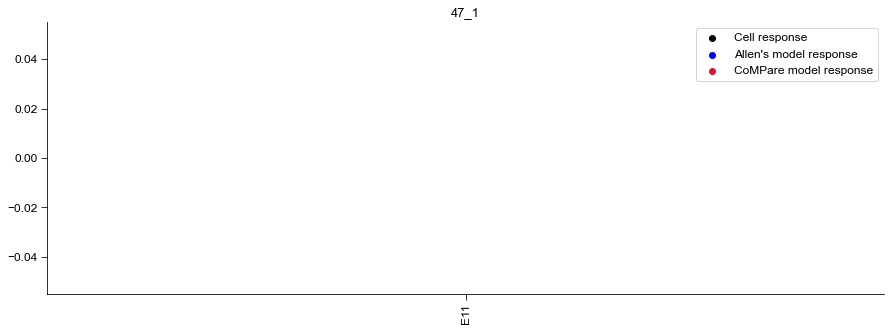

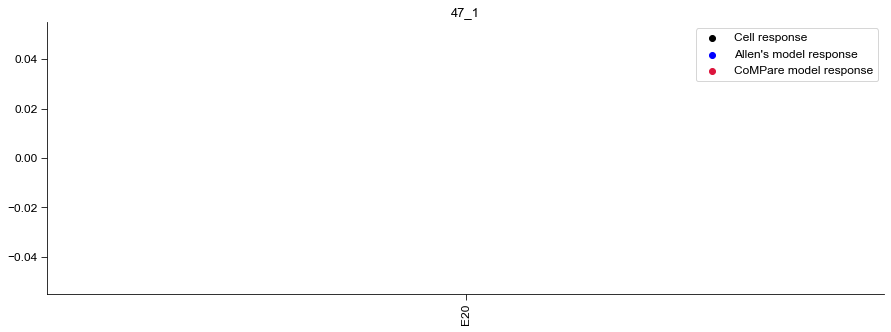

Error in callback <function flush_figures at 0x7fd77c603820> (for post_execute):


KeyboardInterrupt: 

In [24]:
total_possible = []
allen_scores = []
compare_scores = []
pdf = PdfPages('efel_comparison.pdf')
# for sweep_key in sweep_keys:
#     # sweep_data = cell_data_set.get_sweep(sweep_num)
#     # cell_response = sweep_data['response'][4000:]*10**3
#     # # if np.max(cell_response) < 0:
#     # #     continue
#     try:
#         efel_feature_dict = efel_data[sweep_key]
#         max_score, allen_score, compare_score = grade_efel(efel_feature_dict, selected_efel_names, pdf, sweep_key)
#         if not allen_score:
#             print(sweep_key)
#         total_possible.append(max_score)
#         allen_scores.append(allen_score)
#         compare_scores.append(compare_score)
#     except KeyError:
#         total_possible.append(0)
#         allen_scores.append(0)
#         compare_scores.append(0)
#         continue

# sweep_data = cell_data_set.get_sweep(sweep_num)
# cell_response = sweep_data['response'][4000:]*10**3
# # if np.max(cell_response) < 0:
# #     continue

sweep_key = '43'
all_efel_names = efel.api.getFeatureNames()
for sweep_key in efel_data.keys():
    for i in range(0, len(all_efel_names), 10):
        selected_efel_names = all_efel_names[i:i+10]
        efel_feature_dict = efel_data[sweep_key]
        max_score, allen_score, compare_score = grade_efel(efel_feature_dict, selected_efel_names, pdf, sweep_key)
        if not allen_score:
            print(sweep_key)
        total_possible.append(max_score)
        allen_scores.append(allen_score)
        compare_scores.append(compare_score)

    selected_efel_names = all_efel_names[160:]
    efel_feature_dict = efel_data[sweep_key]
    max_score, allen_score, compare_score = grade_efel(efel_feature_dict, selected_efel_names, pdf, sweep_key)
    if not allen_score:
        print(sweep_key)
    total_possible.append(max_score)
    allen_scores.append(allen_score)
    compare_scores.append(compare_score)
        
#pdf.close()

In [26]:
allen_scores = np.array(allen_scores)
total_possible = np.array(total_possible)
compare_scores = np.array(compare_scores)
curr_sweep_keys =  np.array(sweep_keys)

remove_inds = (total_possible == 0) | (allen_scores < 0) | (compare_scores < 0)
compare_scores = compare_scores[~remove_inds]
total_possible = total_possible[~remove_inds]
allen_scores = allen_scores[~remove_inds]
# curr_sweep_keys = curr_sweep_keys[~remove_inds]


In [27]:
allen_grades = (allen_scores/total_possible) * 100
compare_grades = (compare_scores/total_possible) * 100

mask = (allen_grades < 90) & (compare_grades < 90 )
allen_grades = allen_grades[mask]
compare_grades = compare_grades[mask]


In [28]:
selected_efel_features = ['time_to_first_spike',
                    'time_to_second_spike',
                    'time_to_last_spike',
                    'Spikecount',
                    #'Spikecount_stimint',
                    #'number_initial_spikes',
                    'mean_frequency',
                    #'ISI_semilog_slope',
                    'ISI_CV',
                    'burst_number',
                    'AP1_amp',
                    'AP2_amp',
                    'APlast_amp',
                    'AP_amplitude_from_voltagebase',
                    'AP1_peak',
                    'AP2_peak',
                    'AP2_AP1_diff',
                    #'AP2_AP1_peak_diff',
                    'AHP_depth_abs',
#                     'AHP_depth_abs_slow',
#                     'AHP_slow_time',
#                     'AHP_depth',
                    'AHP1_depth_from_peak',
                    #'AHP2_depth_from_peak',
                    'AHP_time_from_peak',
                    'min_voltage_between_spikes',
                    'AP_duration_half_width',
                    'AP_width',
                    'AP1_width',
                    'AP2_width',
                    'APlast_width',
                    #'AP1_begin_width',
                    #'AP2_begin_width',
                    #'AP2_AP1_begin_width_diff',
                    'AP1_begin_voltage',
                    'AP2_begin_voltage',
                    'AP_begin_time',
                    'AP_peak_upstroke',
                    'AP_peak_downstroke',
                    'AP_rise_time',
                    'AP_phaseslope',
                    #'AP_phaseslope_AIS',
                    'steady_state_voltage_stimend',
                    'steady_state_voltage',
                    'voltage_base',
                    #'current_base',
                    'decay_time_constant_after_stim',
                    #'voltage_deflection_vb_ssse',
                    'voltage_deflection',
                    #'voltage_deflection_begin',
                    'voltage_after_stim',
                    'minimum_voltage',
                    'maximum_voltage']
                    #'maximum_voltage_from_voltagebase']

# Put these in the passive stims only
#                     'sag_time_constant',
#                     'sag_amplitude',
#                     'sag_ratio1',
#                     'sag_ratio2', 

selected_stims = ['4',
                  '8', 
                  '12',
                  #'22', passivs for sag
                  #'23', passivs for sag
                  #'34', passive for sag
                  '35',
                  '36',
                  '38',
                  '43',
                  '44',
                  '46',
                  '47_1',
                  '47_2',
                  '47_3',
                  '48_1',
                  '48_2',
                  '48_3',
                  '50_1',
                  '50_2',
                  '50_3',
                  '53_1',
                  '53_2',
                  '53_3',
                  #'56',
                  '58',
                  '59',
                  '64',
                  '65',
                  '66',
                  '68']


In [29]:
#from scipy.special import sigmoid
feature_devs_scatter_plot = []
for efel_name in selected_efel_features: #efel.api.getFeatureNames():
    for sweep_key in selected_stims: #efel_data.keys():
        target = efel_data[sweep_key][efel_name]['cell_features']
        allen = efel_data[sweep_key][efel_name]['allen_features']
        compare = efel_data[sweep_key][efel_name]['compare_features']
        if not target is None and not allen is None and not compare is None:
            if len(target) and len(allen) and len(compare):
                target_mean = np.mean(target)
                allen_tmp = [abs(e-target_mean) for e in allen]
                compare_tmp = [abs(e-target_mean) for e in compare]
                allen_dev = np.mean(allen_tmp)
                compare_dev = np.mean(compare_tmp)
                #if compare_dev-allen_dev > 0:
                #    print(efel_name)
                if not np.isnan(target_mean) and not np.isnan(allen_dev) and not np.isnan(compare_dev):
                    #allen_dev = abs(target_mean-allen_mean)
                    #compare_dev = abs(target_mean-compare_mean)
                    if allen_dev != 0 and compare_dev != 0:
                        feature_devs_scatter_plot.append(np.log10([1+allen_dev, 1+compare_dev]))
feature_devs_scatter_plot = np.array(feature_devs_scatter_plot).T
        

In [30]:
# for e in feature_devs_scatter_plot[0]:
#     print(e)

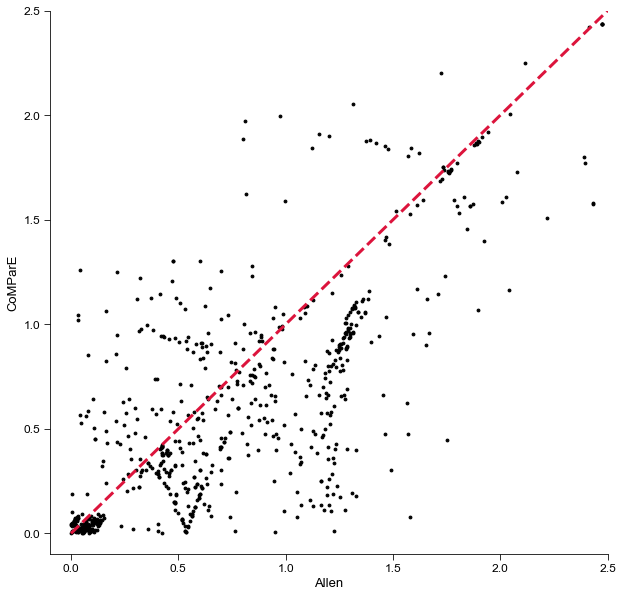

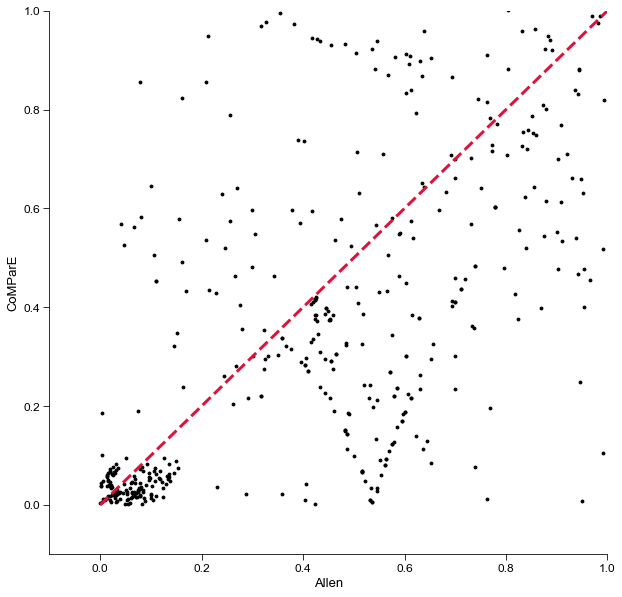

Percent of dots under y = x line: 73.97 %


In [32]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(feature_devs_scatter_plot[0], feature_devs_scatter_plot[1], color='black', s=8)
ax.axis(xmin=-0.1, xmax=2.5, ymin=-0.1, ymax=2.5)
ax.plot(np.arange(0, 3, 0.01), (np.arange(0, 3, 0.01)), color='crimson', linewidth=3, linestyle='--', alpha=1)
plt.xlabel('Allen')
plt.ylabel('CoMParE')
plt.show()
fig.savefig("scatter_plot_large.pdf", bbox_inches='tight')

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(feature_devs_scatter_plot[0], feature_devs_scatter_plot[1], color='black', s=8)
ax.plot(np.arange(0, 3, 0.01), (np.arange(0, 3, 0.01)), color='crimson', linewidth=3, linestyle='--', alpha=1)
ax.axis(xmin=-0.1, xmax=1, ymin=-0.1, ymax=1)
plt.xlabel('Allen')
plt.ylabel('CoMParE')
plt.show()
fig.savefig("scatter_plot_small.pdf", bbox_inches='tight')

print('Percent of dots under y = x line:', 
     str(len([1 for i in range(len(feature_devs_scatter_plot[0])) if feature_devs_scatter_plot[0][i] > feature_devs_scatter_plot[1][i]])/len(feature_devs_scatter_plot[0])*100)[:5], '%')

In [ ]:
pdf_efel_grade_plot = PdfPages('efel_grade_plot.pdf')

fig = plt.figure(figsize=(8,8))
ax = plt.gca()

bins=20
plt.hist(compare_grades, alpha=.2, color='indianred', label = 'compare grade', bins=bins)
plt.hist(allen_grades, alpha=.2, color='lightsteelblue', label = 'allen grade', bins=bins)

plt.hist(compare_grades,  edgecolor='indianred', facecolor="None", linewidth=2, bins=bins)
plt.hist(allen_grades,  facecolor="None", edgecolor='lightsteelblue', linewidth=2, bins=bins)

ax.axvline(np.mean(allen_grades), color='lightsteelblue', label = 'mean allen grade ', linewidth=4, linestyle='--')
ax.axvline(np.mean(compare_grades), color='indianred', label = 'mean compare grade ', linewidth=4, linestyle='--')
plt.ylabel('number of sweeps')
plt.xlabel('grade bin')
plt.legend(loc=(1, .9))
pdf_efel_grade_plot.savefig(bbox_inches='tight')
pdf_efel_grade_plot.close()



In [194]:
# Read saved file fresh
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
data_file = h5py.File(parsed_stim_response_path, 'r')
sweep_keys = [e.decode('ascii') for e in data_file['sweep_keys']]

In [42]:
from tslearn.metrics import dtw
from fastdtw import fastdtw
from scipy.signal import correlate
from scipy.spatial.distance import euclidean

def compute_l2_norm(target, model_response):
    return np.linalg.norm((target-model_response)/np.linalg.norm(target))

def compute_dtw(target, model_response):
    return fastdtw(target, model_response, dist=euclidean)[0]

def compute_cosine_similarity(target, model_response):
    return np.dot(target, model_response)/(np.linalg.norm(target)*np.linalg.norm(model_response)+0.00001)

def compute_cross_correlation(target, model_response):
    return correlate(target/np.linalg.norm(target), model_response/np.linalg.norm(target))

In [54]:
from tqdm import tqdm
deviation_measures = {'l2_compare': [], 'l2_allen': [], 'cos_compare': [], 'cos_allen': [], 'crosscorr_compare': [],\
                      'crosscorr_allen': [], 'dtw_compare': [], 'dtw_allen': []}
for s in tqdm(sweep_keys):
    cell_response = data_file[s+'_cell_response'][:]
    allen_model_response = data_file[s+'_allen_model_response'][:]
    compare_response = data_file[s+'_compare_model_response'][:]
    if np.mean(allen_model_response) != 0:
        l2_compare, l2_allen = compute_l2_norm(cell_response, compare_response), compute_l2_norm(cell_response, allen_model_response)
    #     dtw_compare, dtw_allen = compute_dtw(cell_response, compare_response), compute_dtw(cell_response, allen_model_response)
        cos_compare, cos_allen = compute_cosine_similarity(cell_response, compare_response),\
                                 compute_cosine_similarity(cell_response, allen_model_response)
        crosscorr_compare, crosscorr_allen = compute_cross_correlation(cell_response, compare_response),\
                                             compute_cross_correlation(cell_response, allen_model_response)

        deviation_measures['l2_compare'].append(l2_compare)
        deviation_measures['l2_allen'].append(l2_allen)
        deviation_measures['cos_compare'].append(cos_compare)
        deviation_measures['cos_allen'].append(cos_allen)
        deviation_measures['crosscorr_compare'].append(np.max(crosscorr_compare))
        deviation_measures['crosscorr_allen'].append(np.max(crosscorr_allen))
        deviation_measures['dtw_compare'].append(0)
        deviation_measures['dtw_allen'].append(0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  6.61it/s]


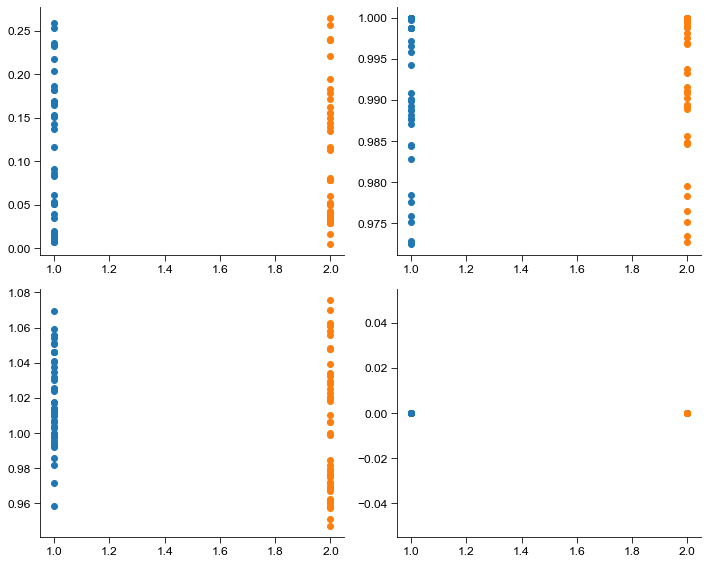

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.scatter(np.ones(len(deviation_measures['l2_compare'])), deviation_measures['l2_compare'])
plt.scatter(2*np.ones(len(deviation_measures['l2_allen'])), deviation_measures['l2_allen'])
plt.subplot(2, 2, 2)
plt.scatter(np.ones(len(deviation_measures['cos_compare'])), deviation_measures['cos_compare'])
plt.scatter(2*np.ones(len(deviation_measures['cos_allen'])), deviation_measures['cos_allen'])
plt.subplot(2, 2, 3)
plt.scatter(np.ones(len(deviation_measures['crosscorr_compare'])), deviation_measures['crosscorr_compare'])
plt.scatter(2*np.ones(len(deviation_measures['crosscorr_allen'])), deviation_measures['crosscorr_allen'])
plt.subplot(2, 2, 4)
plt.scatter(np.ones(len(deviation_measures['dtw_compare'])), deviation_measures['dtw_compare'])
plt.scatter(2*np.ones(len(deviation_measures['dtw_allen'])), deviation_measures['dtw_allen'])
plt.tight_layout()
plt.show()

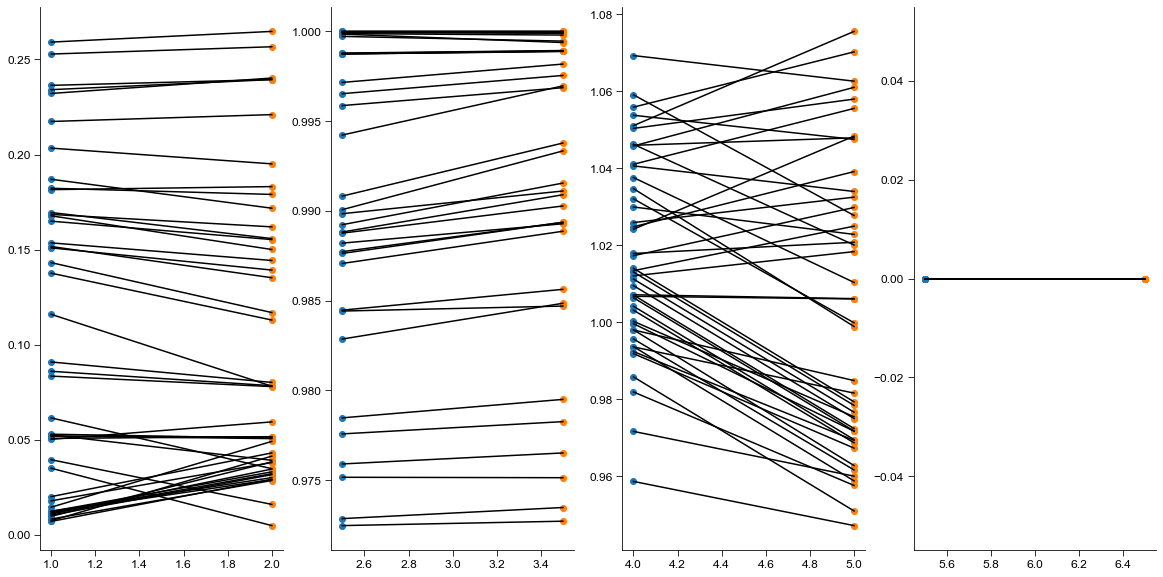

In [85]:
plt.figure(figsize=(20,10))
l2_allen_comapre_dev_match = [[deviation_measures['l2_compare'][i], deviation_measures['l2_allen'][i]] for i in range(len(deviation_measures['l2_allen']))]
cos_allen_comapre_dev_match = [[deviation_measures['cos_compare'][i], deviation_measures['cos_allen'][i]] for i in range(len(deviation_measures['cos_allen']))]
crosscorr_allen_comapre_dev_match = [[deviation_measures['crosscorr_compare'][i], deviation_measures['crosscorr_allen'][i]] for i in range(len(deviation_measures['crosscorr_allen']))]
dtw_allen_comapre_dev_match = [[deviation_measures['dtw_compare'][i], deviation_measures['dtw_allen'][i]] for i in range(len(deviation_measures['dtw_allen']))]

plt.subplot(1, 4, 1)
plt.scatter(np.ones(len(deviation_measures['l2_compare'])), deviation_measures['l2_compare'])
plt.scatter(2*np.ones(len(deviation_measures['l2_allen'])), deviation_measures['l2_allen'])
for i in range(len(l2_allen_comapre_dev_match)):
    plt.plot([1, 2], l2_allen_comapre_dev_match[i], color='black')
    
plt.subplot(1, 4, 2)
plt.scatter(2.5*np.ones(len(deviation_measures['cos_compare'])), deviation_measures['cos_compare'])
plt.scatter(3.5*np.ones(len(deviation_measures['cos_allen'])), deviation_measures['cos_allen'])
for i in range(len(cos_allen_comapre_dev_match)):
    plt.plot([2.5, 3.5], cos_allen_comapre_dev_match[i], color='black')

plt.subplot(1, 4, 3)
plt.scatter(4*np.ones(len(deviation_measures['crosscorr_compare'])), deviation_measures['crosscorr_compare'])
plt.scatter(5*np.ones(len(deviation_measures['crosscorr_allen'])), deviation_measures['crosscorr_allen'])
for i in range(len(crosscorr_allen_comapre_dev_match)):
    plt.plot([4, 5], crosscorr_allen_comapre_dev_match[i], color='black')
    
plt.subplot(1, 4, 4)
plt.scatter(5.5*np.ones(len(deviation_measures['dtw_compare'])), deviation_measures['dtw_compare'])
plt.scatter(6.5*np.ones(len(deviation_measures['dtw_allen'])), deviation_measures['dtw_allen'])
for i in range(len(dtw_allen_comapre_dev_match)):
    plt.plot([5.5, 6.5], dtw_allen_comapre_dev_match[i], color='black')
plt.show()

In [332]:
feature_devs_dict = {}
for efel_name in efel.api.getFeatureNames():
    feature_devs = []
    for sweep_key in efel_data.keys():
        target = efel_data[sweep_key][efel_name]['cell_features']
        allen = efel_data[sweep_key][efel_name]['allen_features']
        compare = efel_data[sweep_key][efel_name]['compare_features']
        if not target is None and not allen is None and not compare is None:
            if len(target) and len(allen) and len(compare):
                target_mean = np.mean(target)
                allen_mean = np.mean(allen)
                compare_mean = np.mean(compare)
                feature_devs.append([abs(target_mean-compare_mean), abs(target_mean-allen_mean)])
    feature_devs_dict[efel_name] = feature_devs
        

In [333]:
feature_devs_dict_filtered = {}
for key in feature_devs_dict:
    dev_list = feature_devs_dict[key]
    if len(dev_list):
        new_dev_list = []
        for dev in dev_list:
            if not (dev[0] == 0 or dev[1] == 0) and not ((np.isnan(dev[0]) or np.isnan(dev[1]))):
                new_dev_list.append(dev)
        if len(new_dev_list):
            feature_devs_dict_filtered[key] = new_dev_list

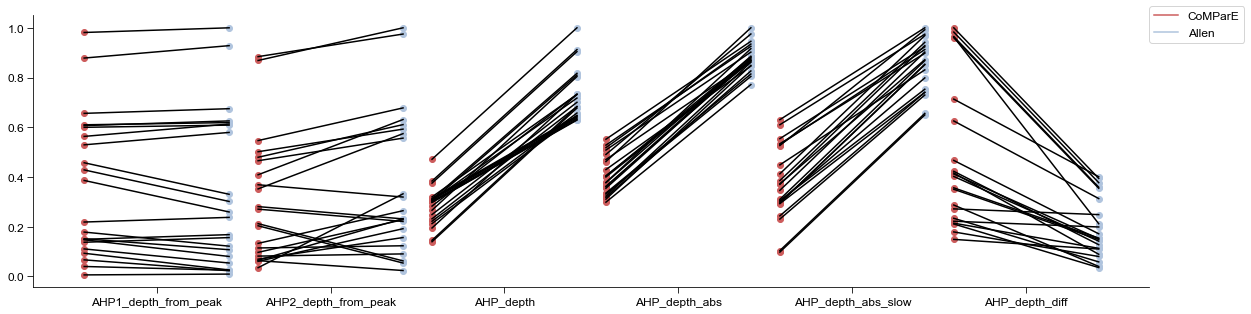

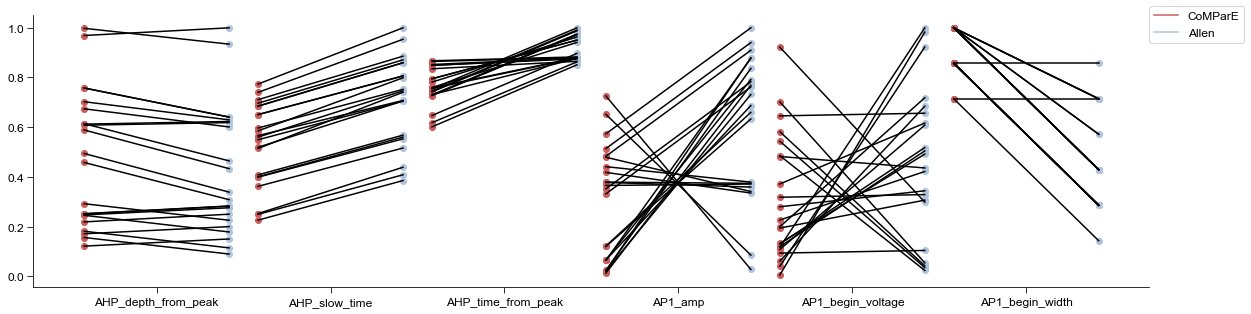

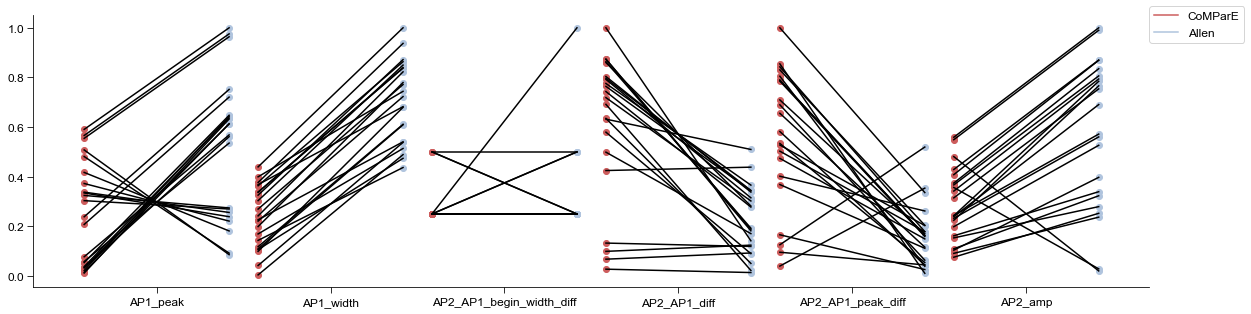

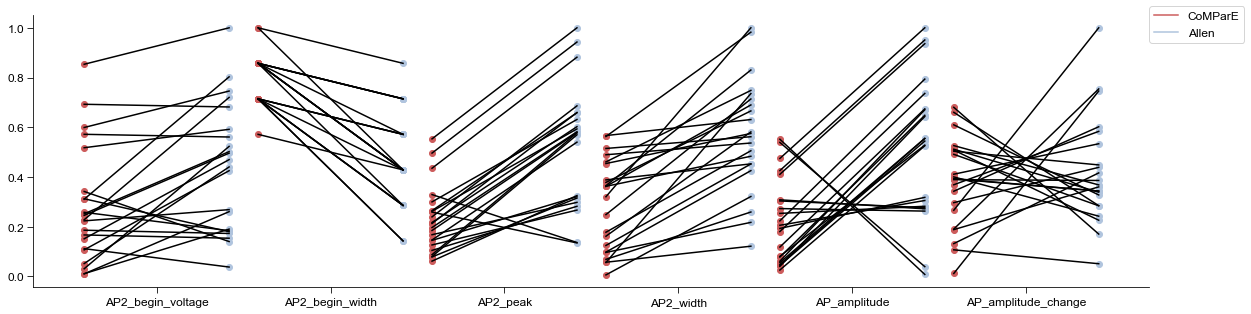

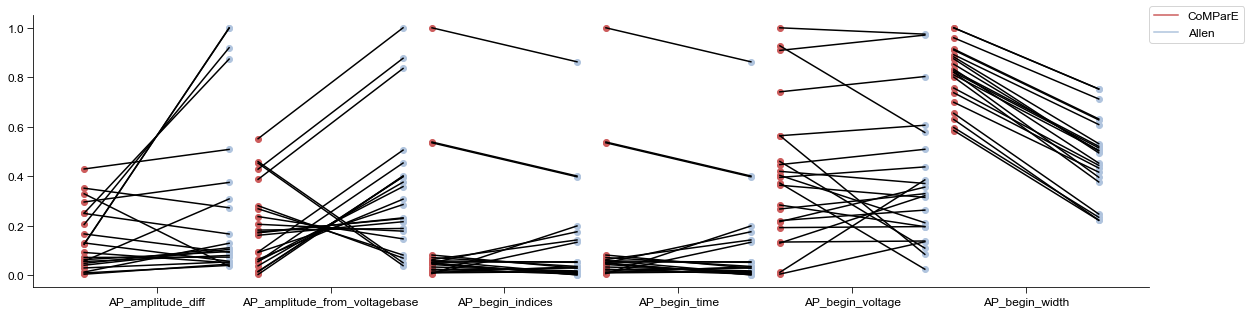

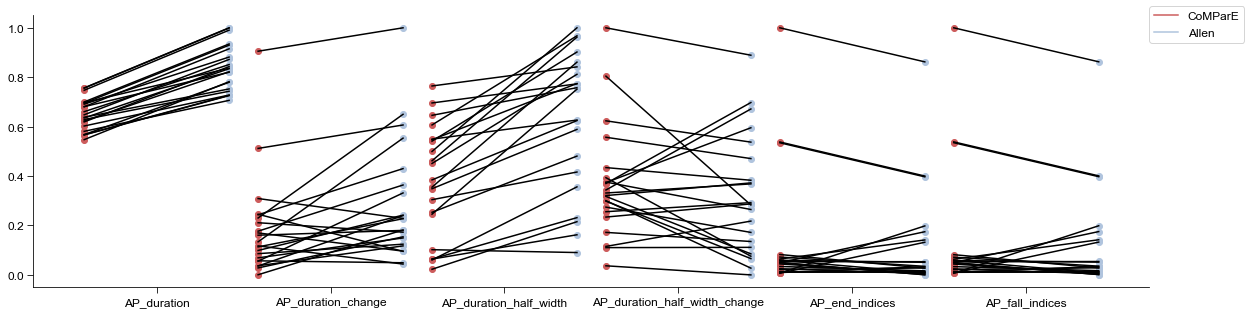

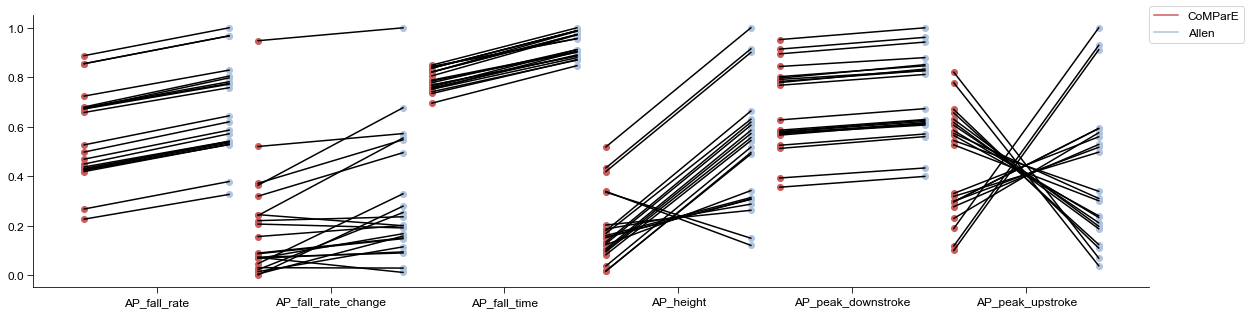

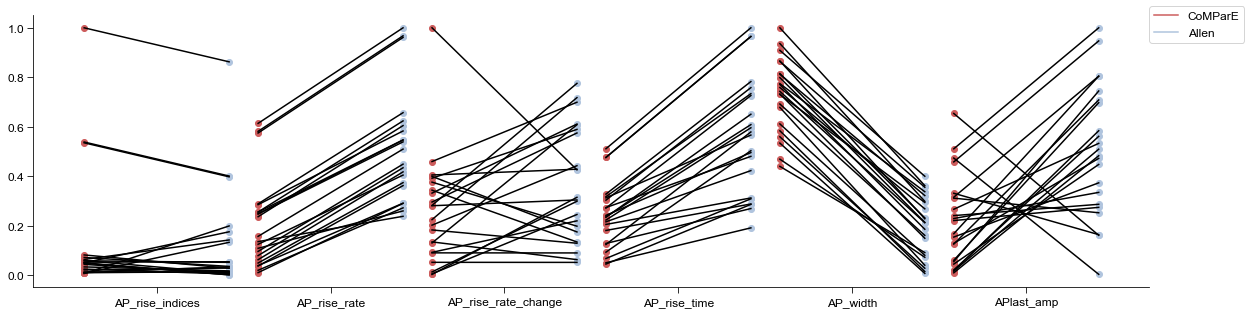

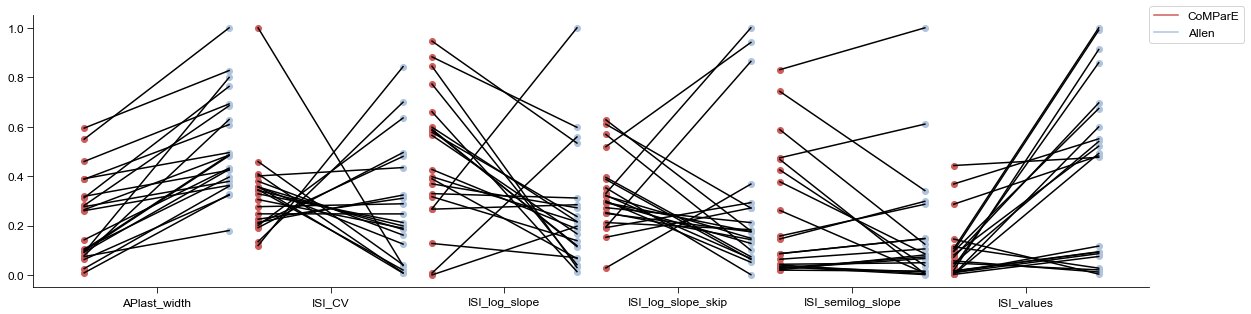

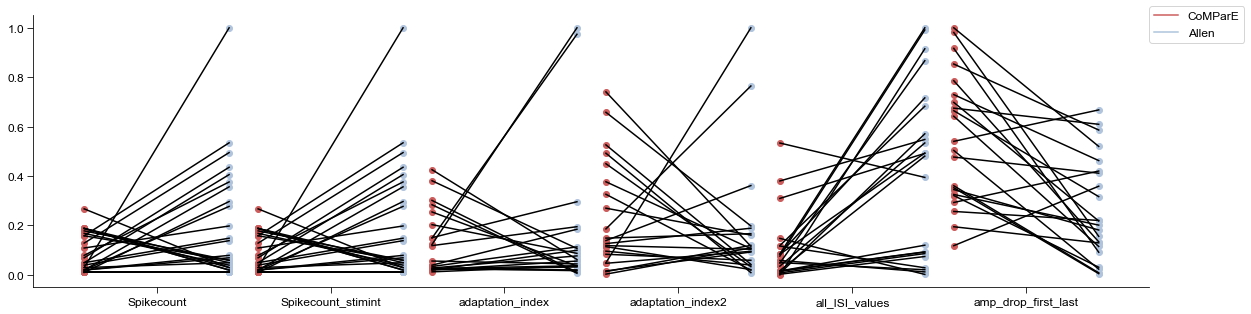

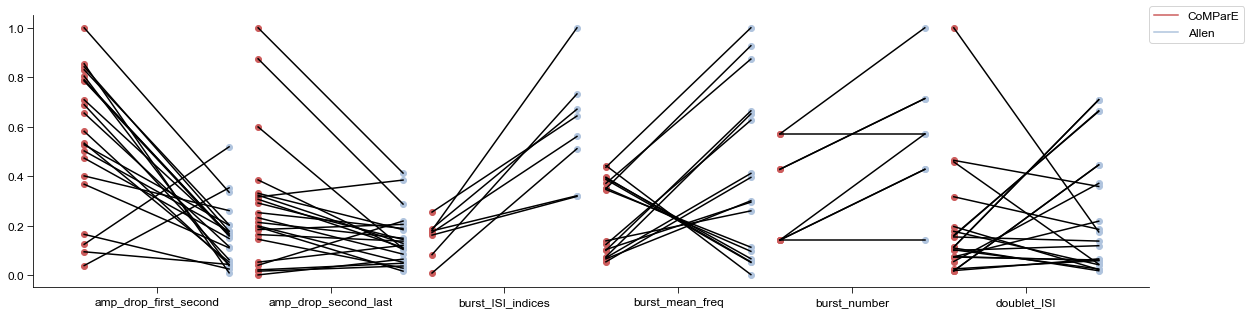

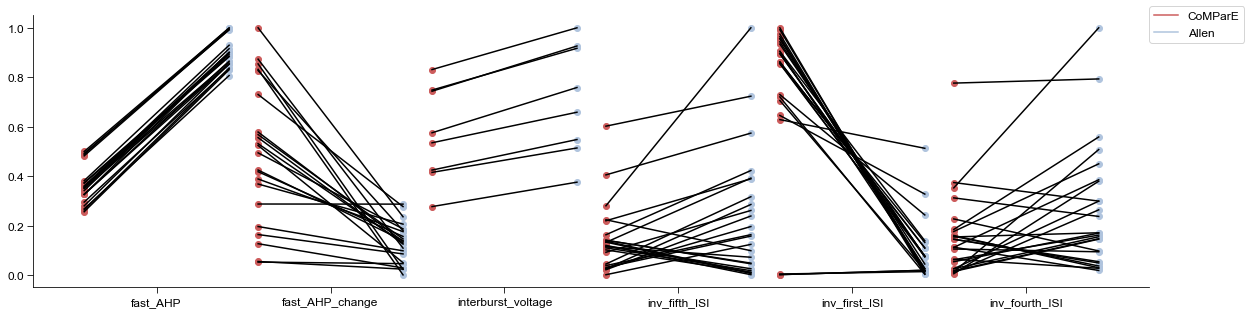

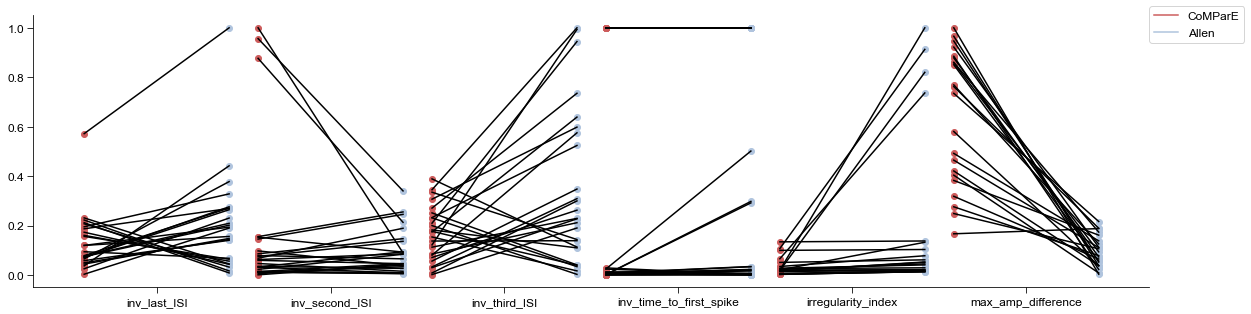

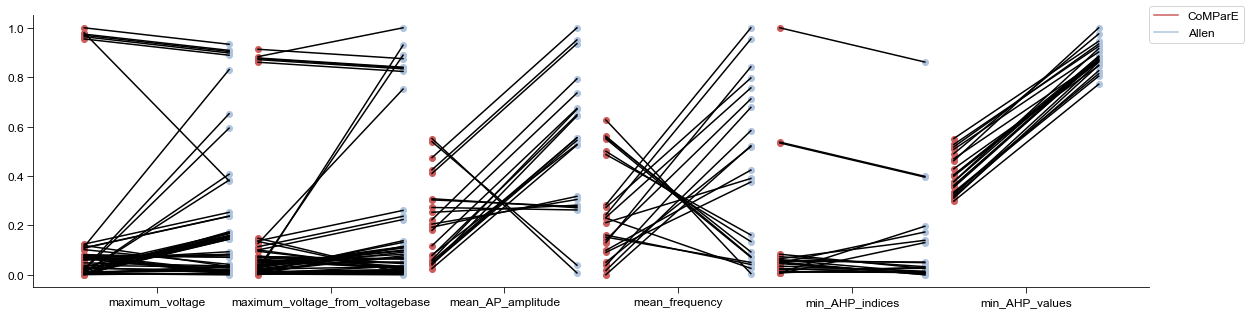

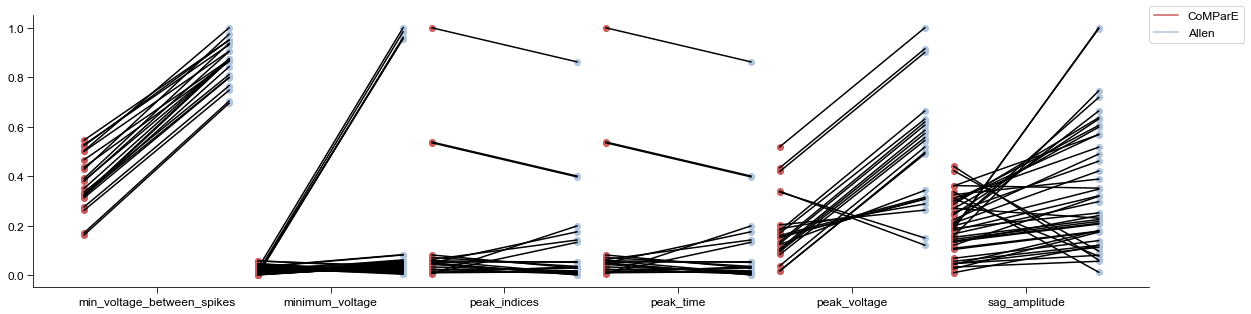

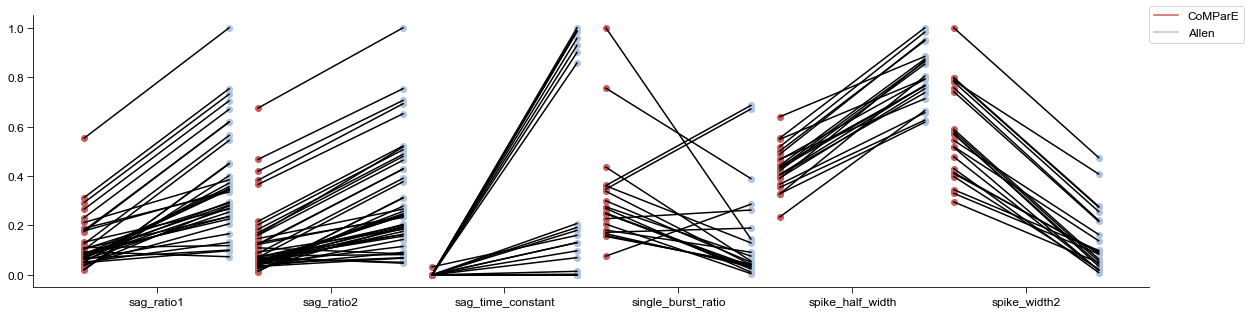

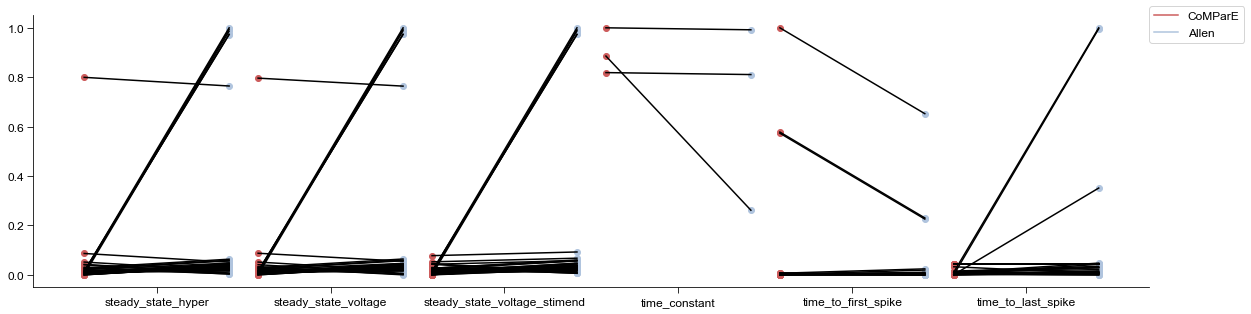

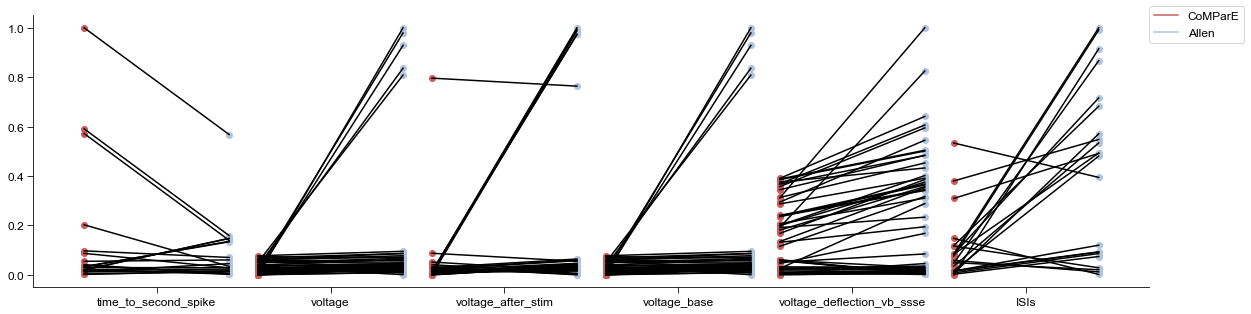

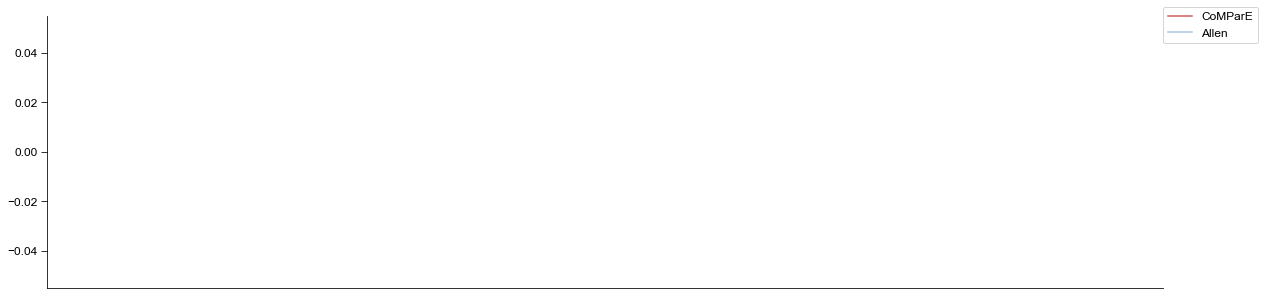

In [342]:
pdf_efel_line_plot = PdfPages('efel_line_plot.pdf')
for k in range(0, len(list(feature_devs_dict_filtered.keys()))+6, 6):
    selected_efel_features = list(feature_devs_dict_filtered.keys())[k:k+6]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
    for i in range(len(selected_efel_features)):
        key = selected_efel_features[i]
        feat_dev_measure_log = np.array(feature_devs_dict_filtered[key])
        feat_dev_measure_log_max = np.max(np.concatenate(feat_dev_measure_log))
        feat_dev_measure_log_norm = feat_dev_measure_log/feat_dev_measure_log_max
        ax.scatter(1.2*i+np.ones(len(feat_dev_measure_log_norm.T[0])), feat_dev_measure_log_norm.T[0], color='indianred')
        ax.scatter(1.2*i+2*np.ones(len(feat_dev_measure_log_norm.T[1])), feat_dev_measure_log_norm.T[1], color='lightsteelblue')
        for j in range(len(feat_dev_measure_log_norm)):
            ax.plot([1.2*i+1, 1.2*i+2], feat_dev_measure_log_norm[j], color='black')
    #ax.legend(loc=(1, 0.9))
    #ax.set_title(key)
    ax.set_xticks([1.2*i+1.5 for i in range(len(selected_efel_features))])
    ax.set_xticklabels(selected_efel_features)
    ax.plot([], label='CoMParE', color='indianred')
    ax.plot([], label='Allen', color='lightsteelblue')
    plt.legend(loc=(1,0.9))
    pdf_efel_line_plot.savefig(fig, bbox_inches='tight')
pdf_efel_line_plot.close()

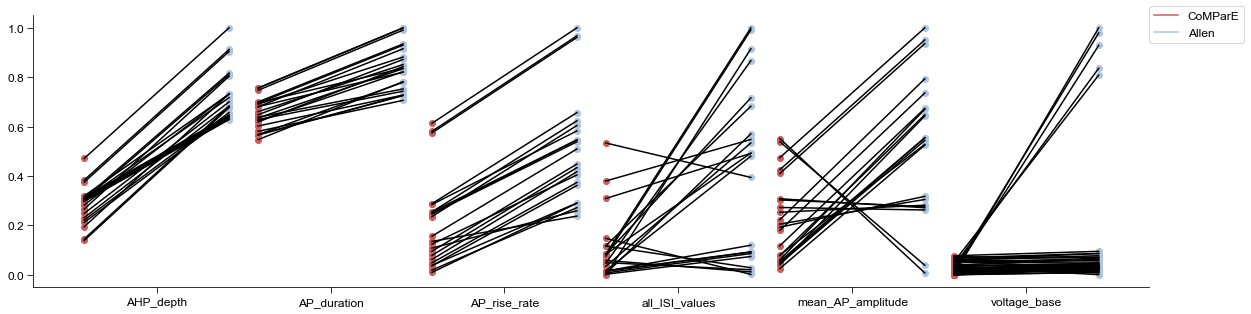

In [338]:
selected_efel_features = ['AHP_depth', 'AP_duration', 'AP_rise_rate', 'all_ISI_values', 'mean_AP_amplitude', 'voltage_base']
#['Spikecount', 'time_to_first_spike', 'AP_amplitude_from_voltagebase', 'AHP_depth', 'AP_width', 'ISIs']
pdf_efel_line_plot_selected = PdfPages('efel_line_plot_selected_ver2.pdf')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
for i in range(len(selected_efel_features)):
    key = selected_efel_features[i]
    feat_dev_measure_log = np.array(feature_devs_dict_filtered[key])
    feat_dev_measure_log_max = np.max(np.concatenate(feat_dev_measure_log))
    feat_dev_measure_log_norm = feat_dev_measure_log/feat_dev_measure_log_max
    ax.scatter(1.2*i+np.ones(len(feat_dev_measure_log_norm.T[0])), feat_dev_measure_log_norm.T[0], color='indianred')
    ax.scatter(1.2*i+2*np.ones(len(feat_dev_measure_log_norm.T[1])), feat_dev_measure_log_norm.T[1], color='lightsteelblue')
    for j in range(len(feat_dev_measure_log_norm)):
        ax.plot([1.2*i+1, 1.2*i+2], feat_dev_measure_log_norm[j], color='black')
    #ax.legend(loc=(1, 0.9))
#ax.set_title(key)
ax.set_xticks([1.2*i+1.5 for i in range(len(selected_efel_features))])
ax.set_xticklabels(selected_efel_features)
ax.plot([], label='CoMParE', color='indianred')
ax.plot([], label='Allen', color='lightsteelblue')
plt.legend(loc=(1,0.9))
pdf_efel_line_plot_selected.savefig(fig, bbox_inches='tight')
pdf_efel_line_plot_selected.close()

In [274]:
feature_devs_per_stim_feature_dict = {}
for sweep_key in efel_data.keys():
    feature_devs_per_stim_feature_dict[sweep_key] = {}
    for efel_name in efel.api.getFeatureNames():
        target = efel_data[sweep_key][efel_name]['cell_features']
        allen = efel_data[sweep_key][efel_name]['allen_features']
        compare = efel_data[sweep_key][efel_name]['compare_features']
        if not target is None and not allen is None and not compare is None:
            if len(target) and len(allen) and len(compare):
                target_mean = np.mean(target)
                allen_devs = []
                compare_devs = []
                for a in allen:
                    v = abs(a-target_mean)
                    if not np.isnan(v):
                        allen_devs.append(v)
                for c in compare:
                    v = abs(c-target_mean)
                    if not np.isnan(v):
                        compare_devs.append(v)
                if len(allen_devs) and len(compare_devs):
                    all_elems = np.concatenate([compare_devs, allen_devs])
                    feature_devs_per_stim_feature_dict[sweep_key][efel_name]\
                        = [np.array(compare_devs)/np.max(all_elems), np.array(allen_devs)/np.max(all_elems)]

/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_72729/2347847149.py:24: RuntimeWarning: invalid value encountered in true_divide
  = [np.array(compare_devs)/np.max(all_elems), np.array(allen_devs)/np.max(all_elems)]


In [153]:
print(feature_devs_per_stim_feature_dict['43']['AHP_depth'])

[[-0.2360581674193775, -1.0814696618487996, -1.5527839312172675, -1.254320800922606, -1.2106974097024388, -1.2268951294068846, -1.249920145363277, -1.2731866481965823, -1.2949748255331963, -1.313381983428682, -1.3299108885207496, -1.3454560166691905, -1.3590712446816433, -1.37092359739637], [-4.54638829755737, -4.615081011217885, -4.610352396481561, -4.605874975597723]]


/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_72729/830140797.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))


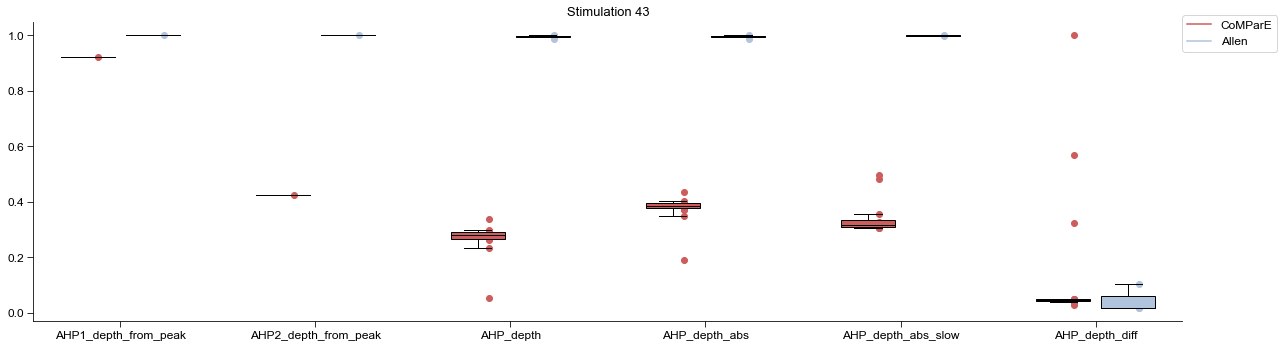

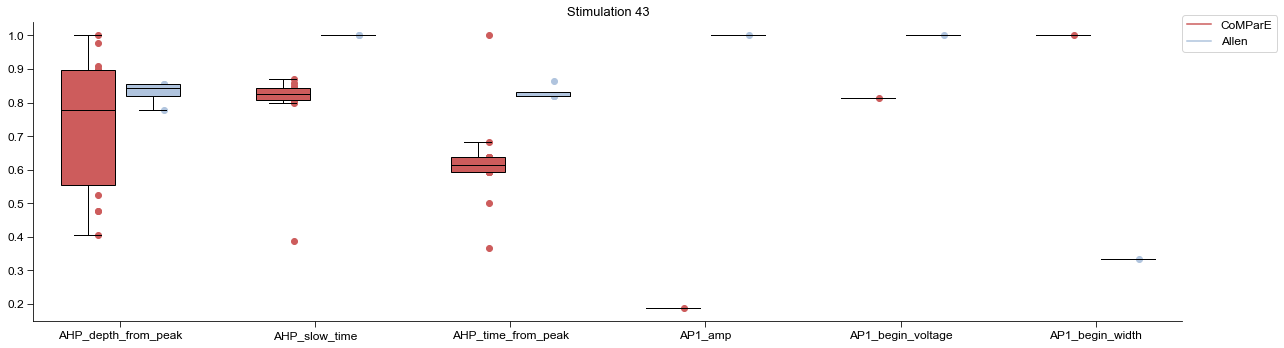

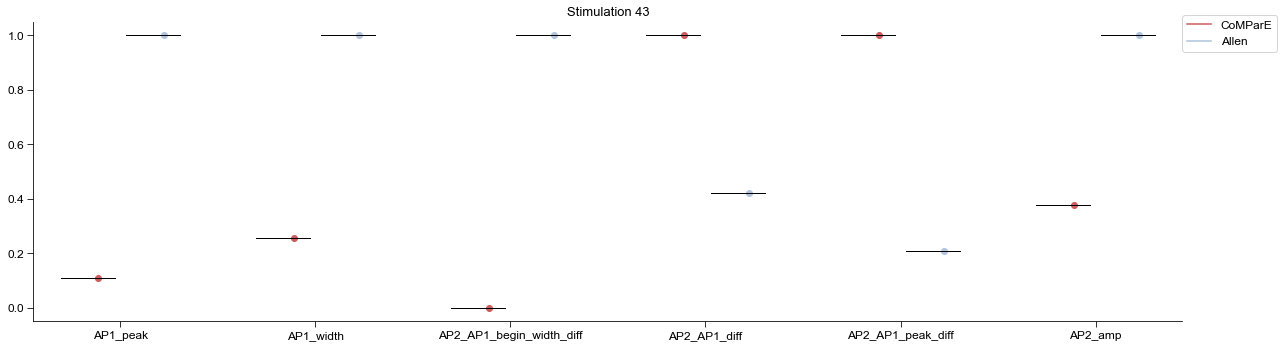

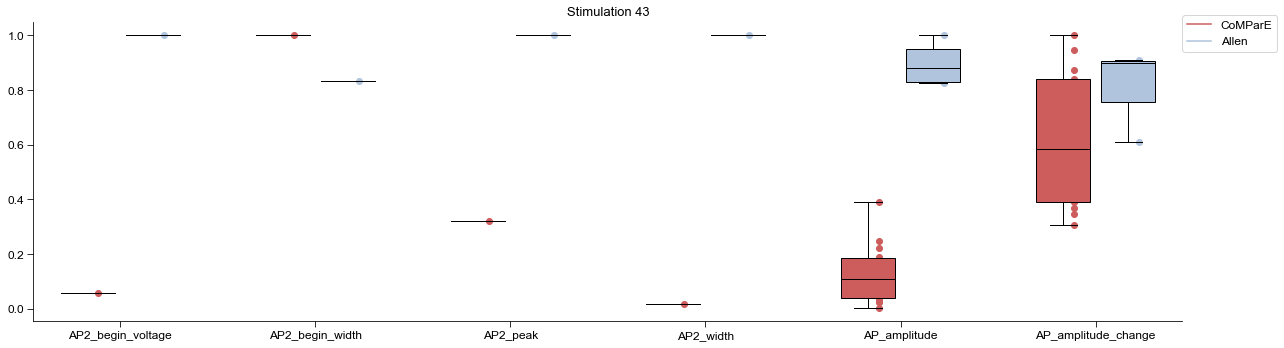

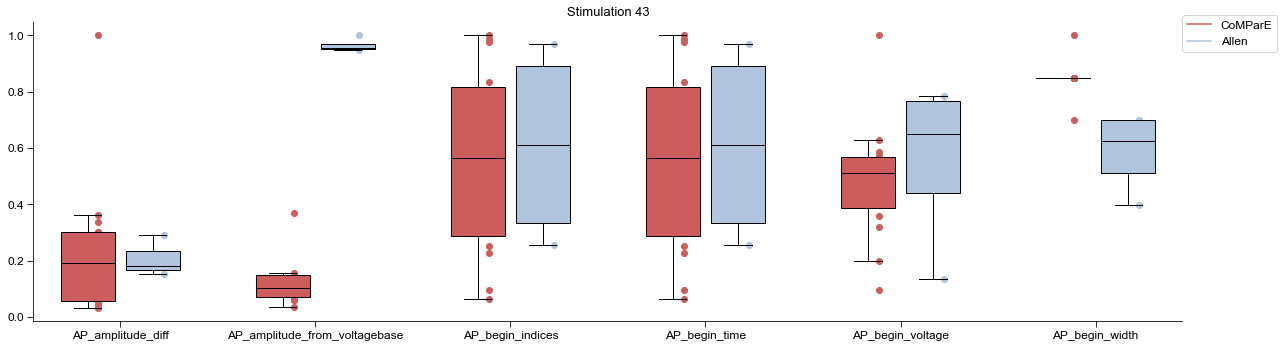

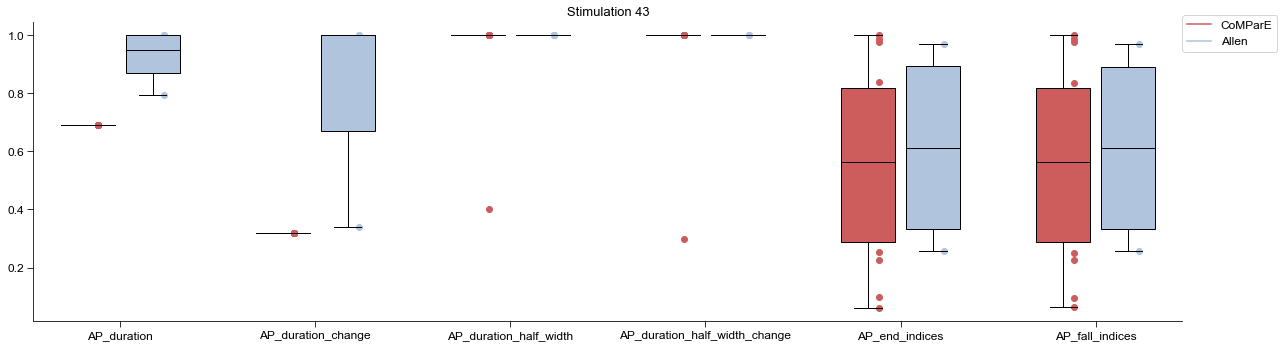

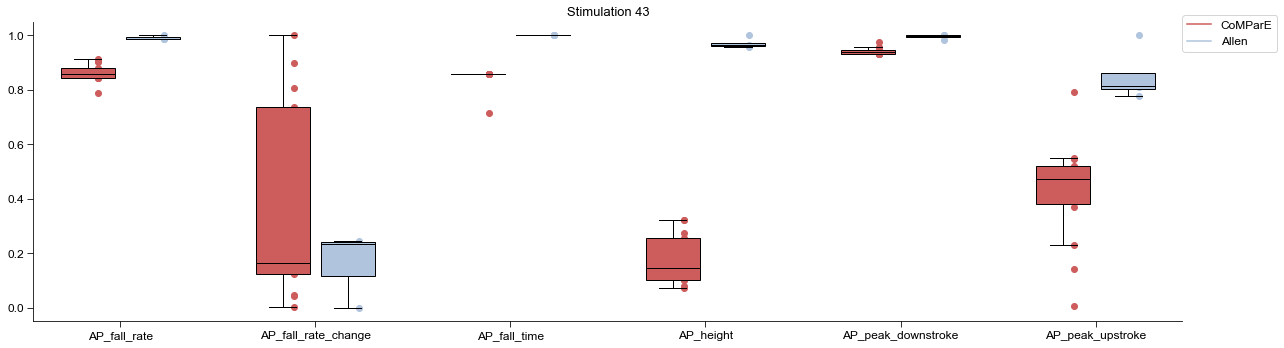

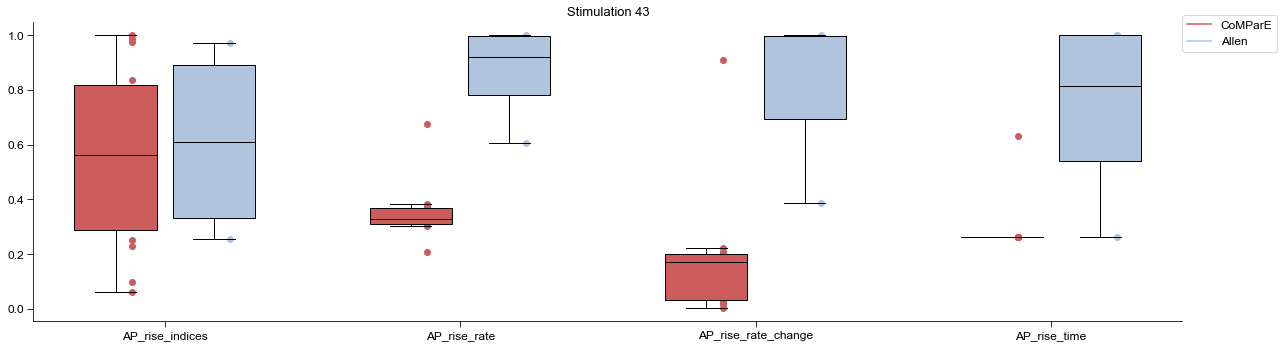

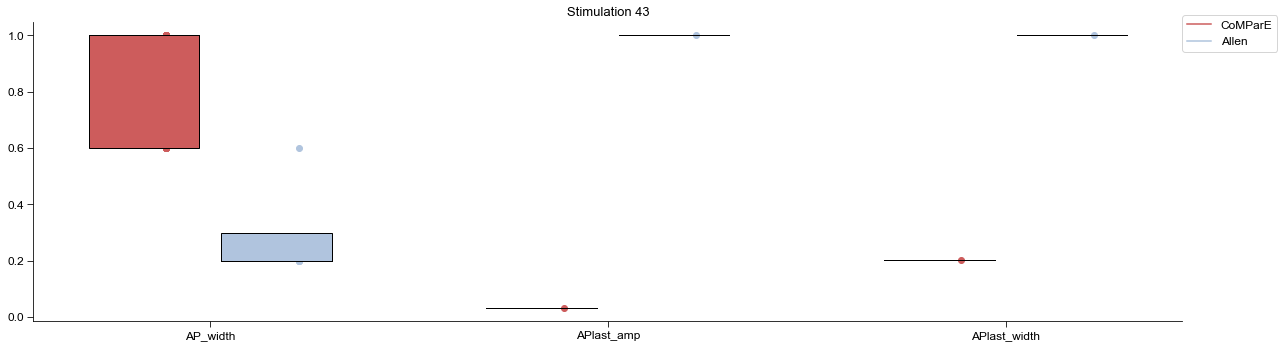

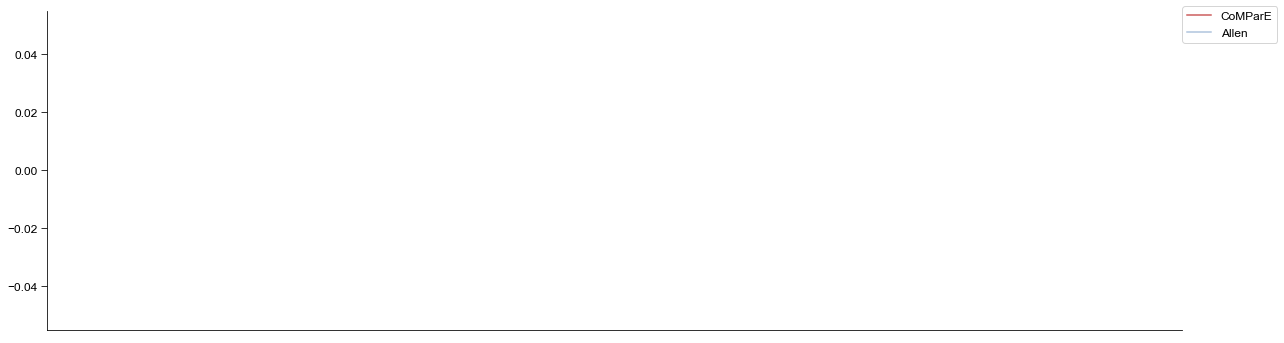

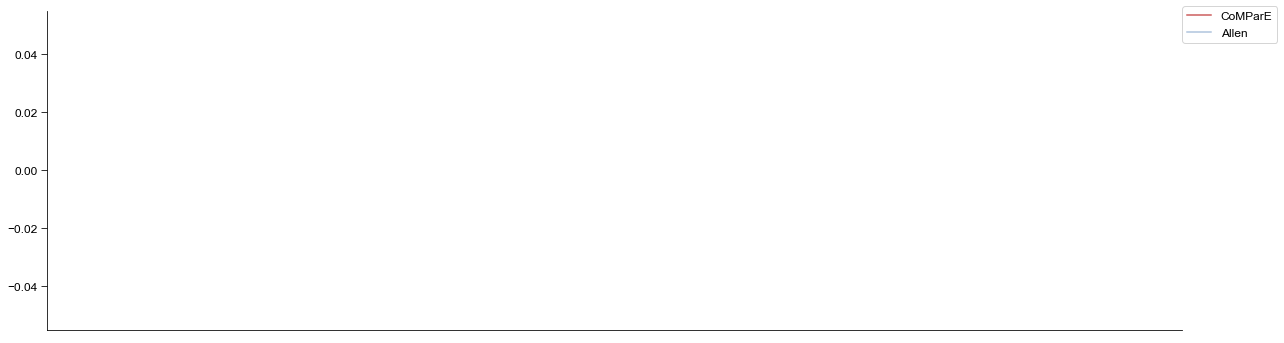

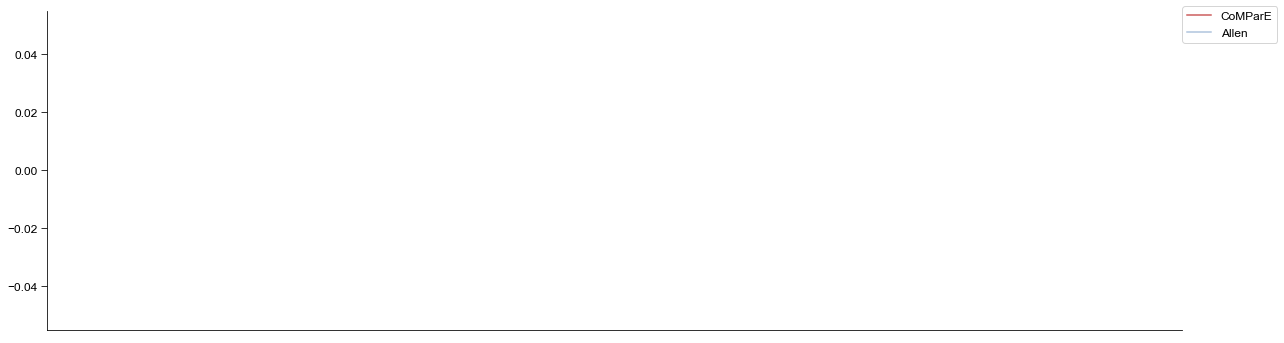

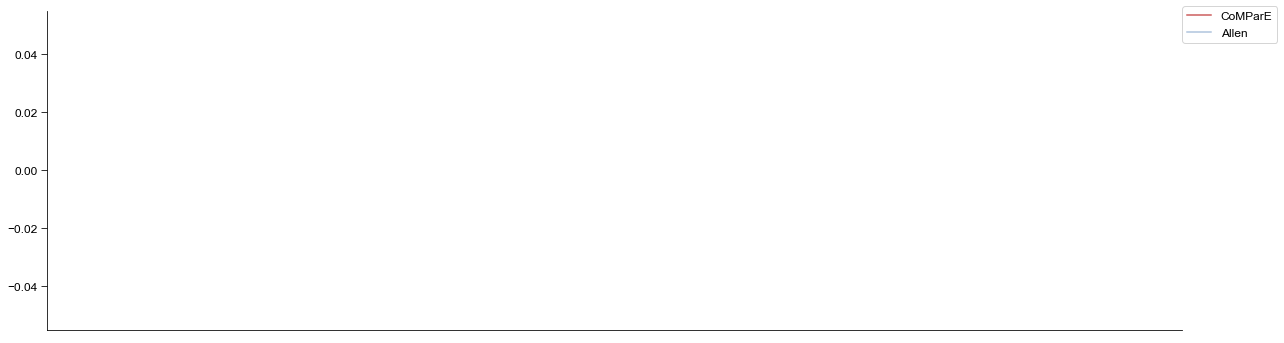

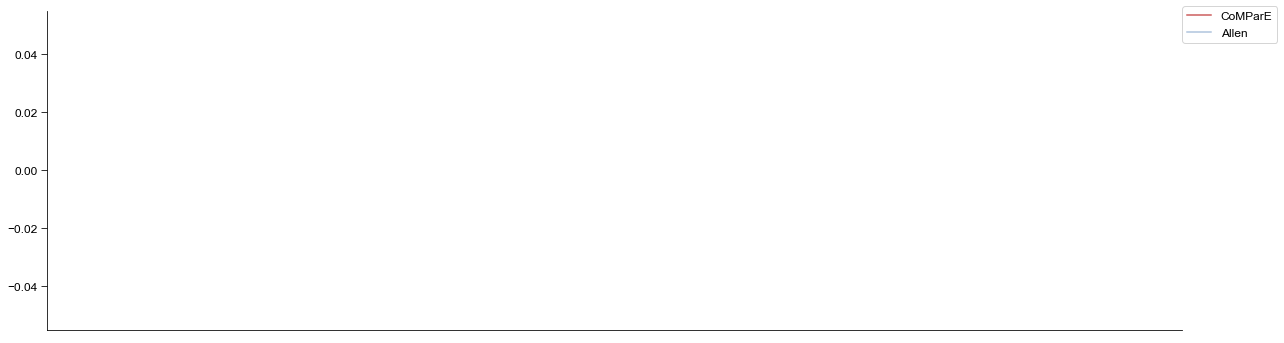

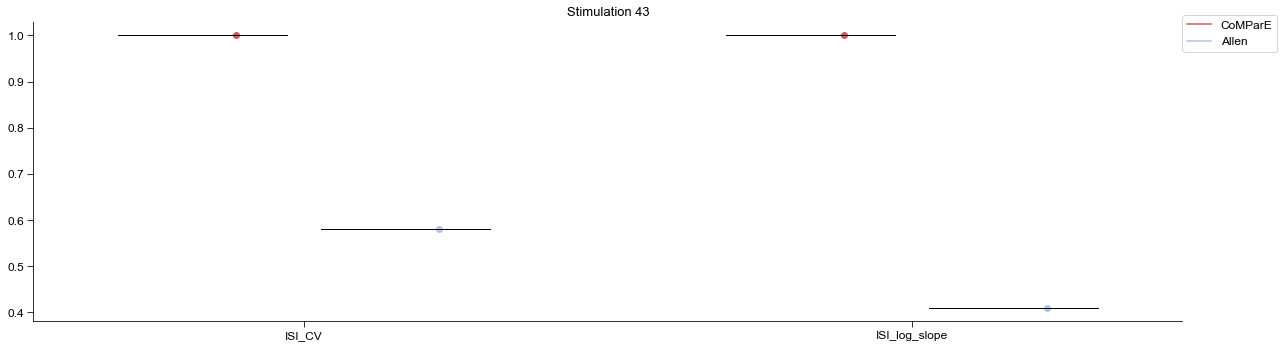

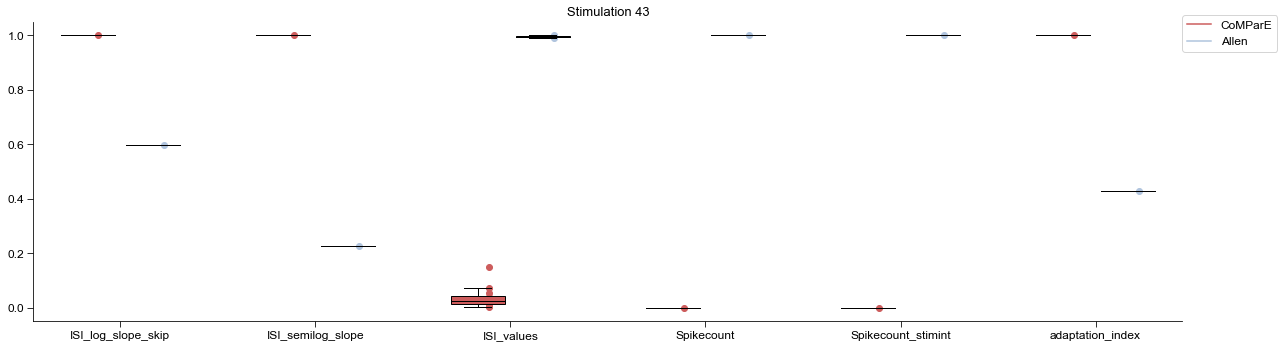

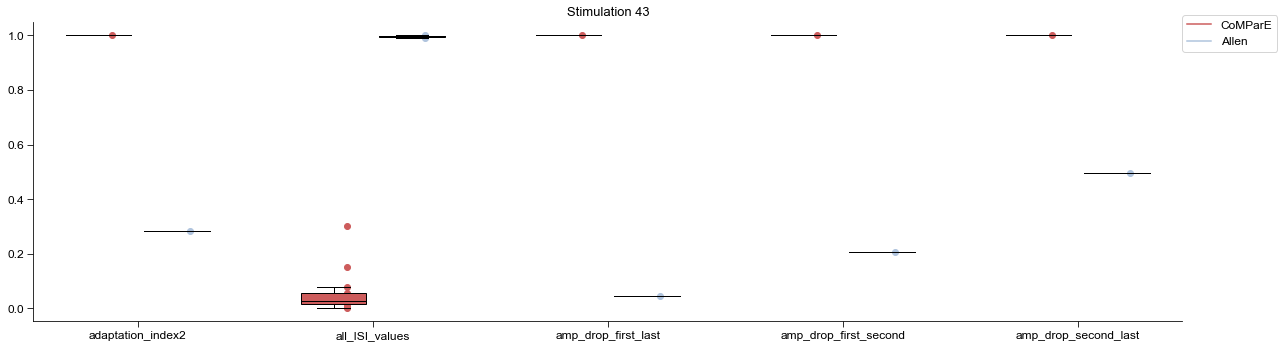

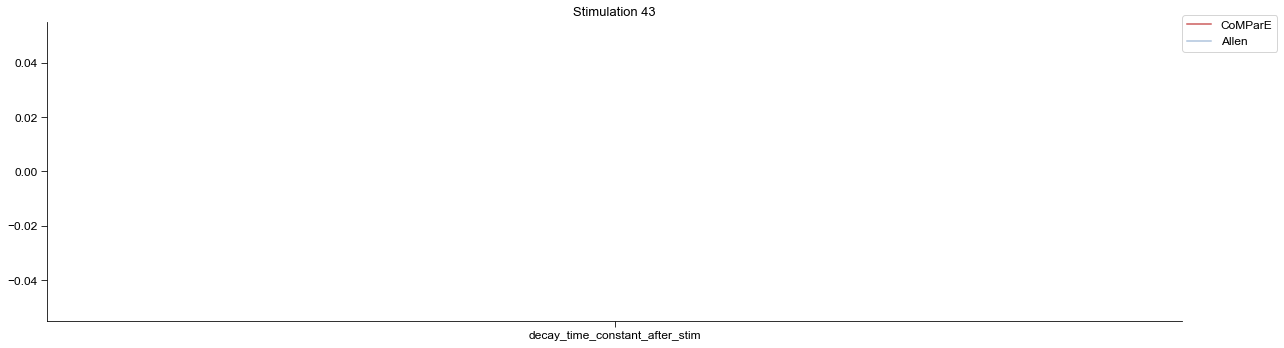

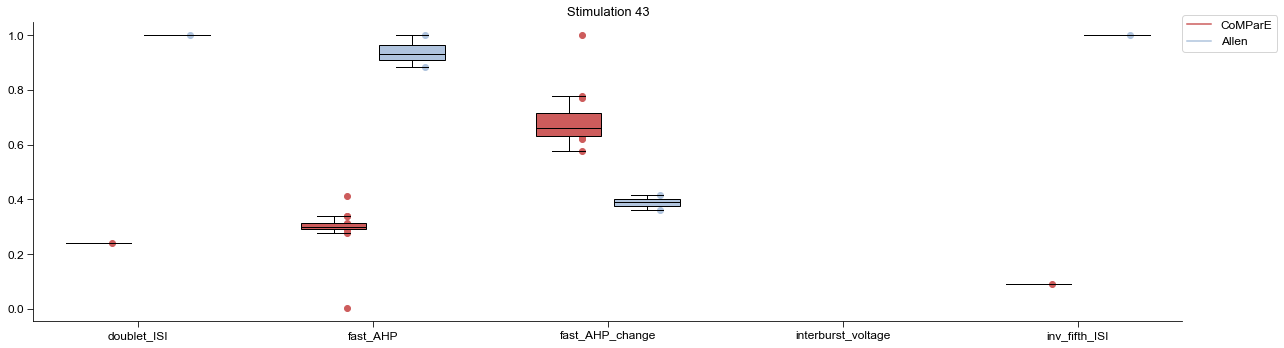

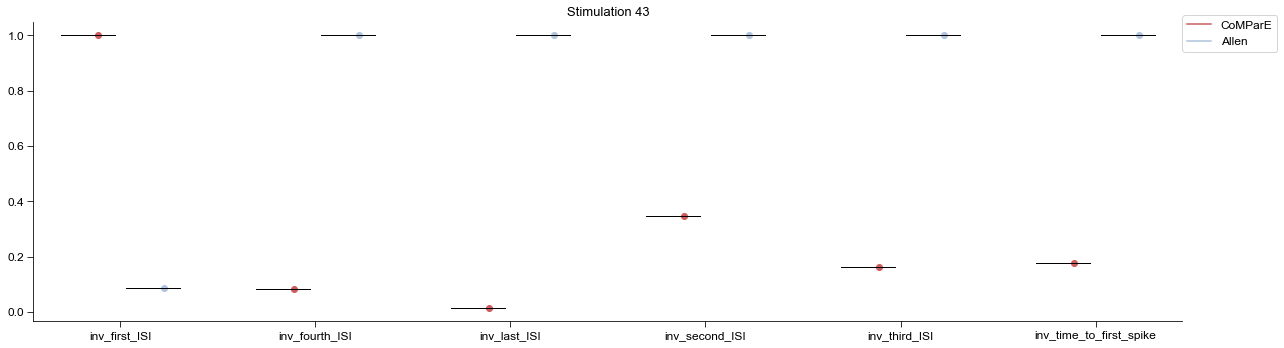

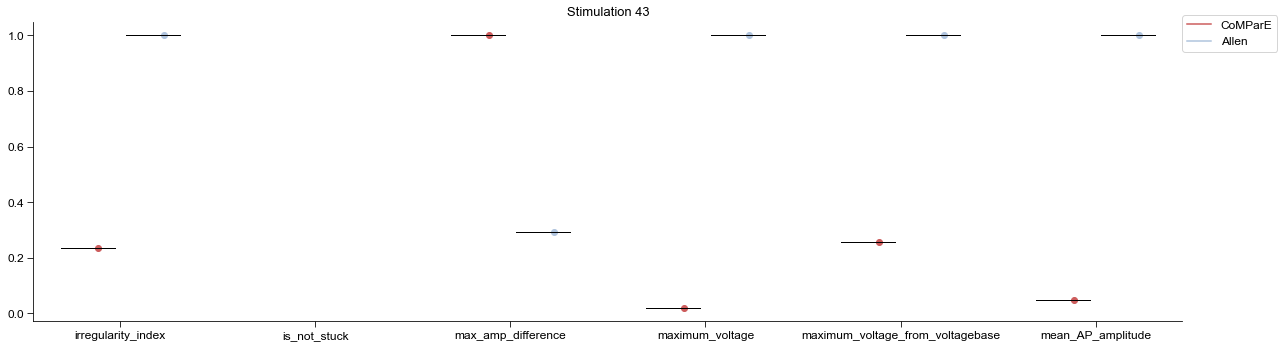

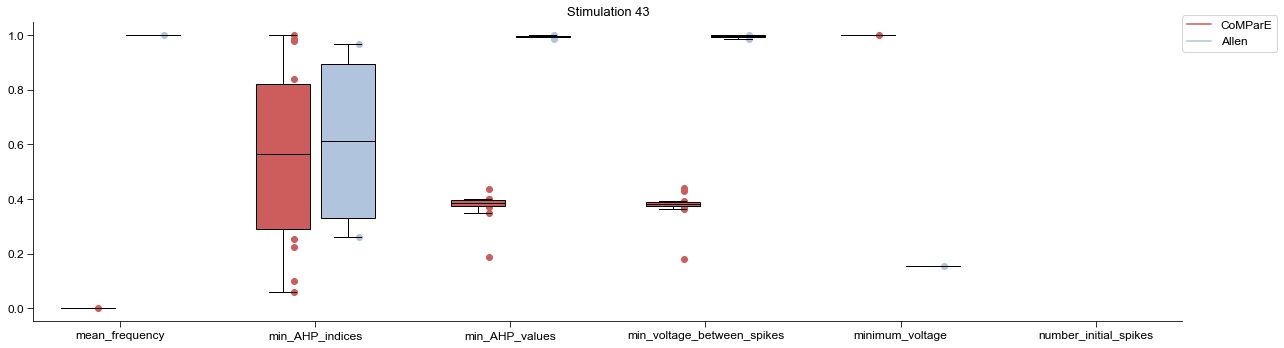

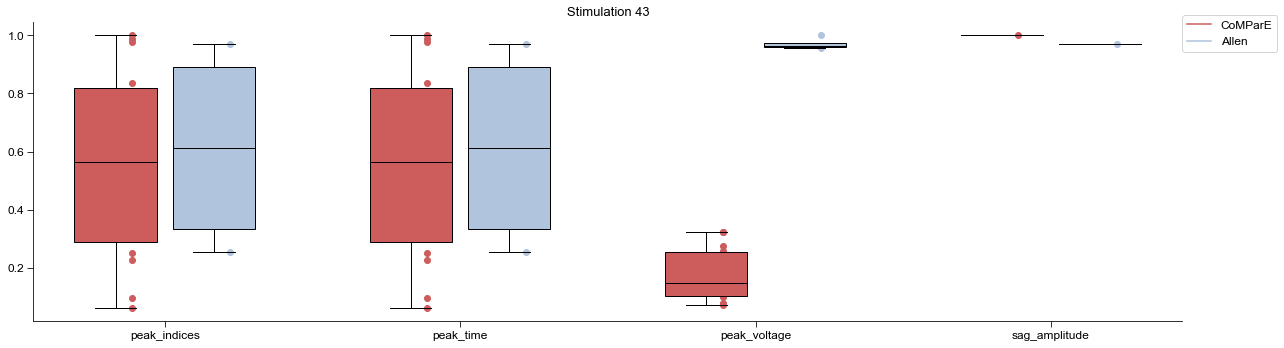

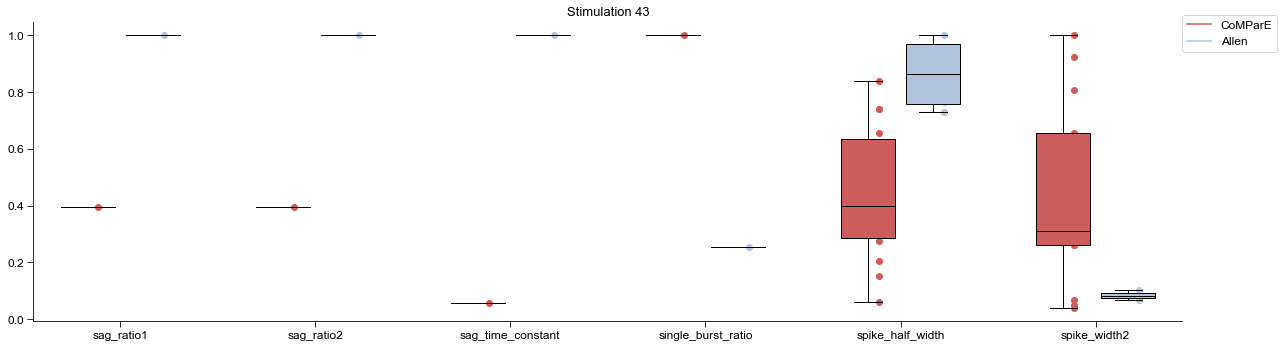

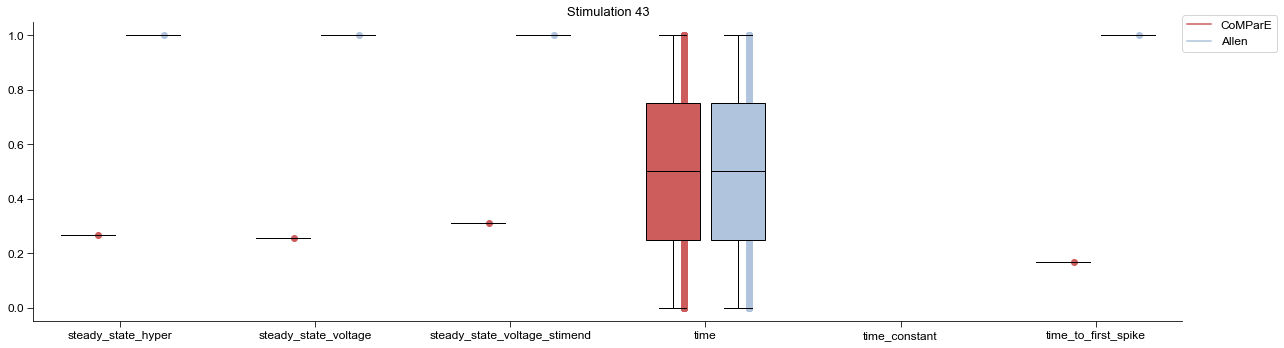

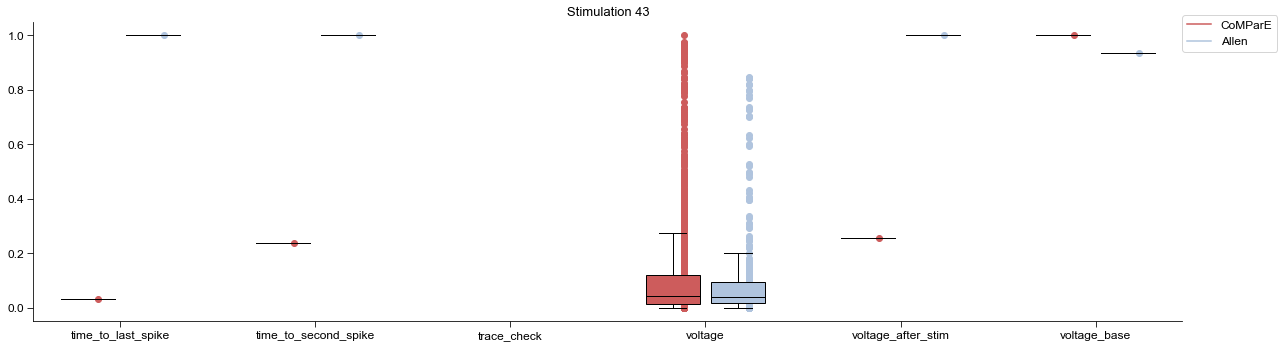

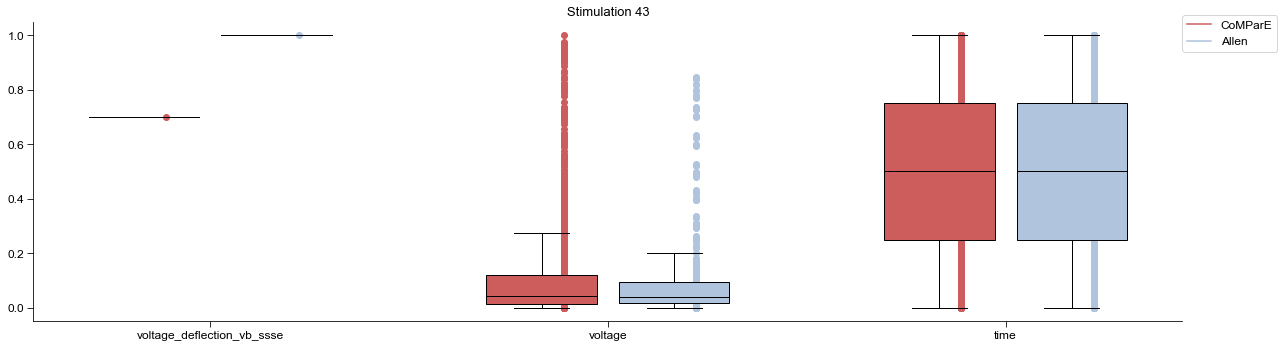

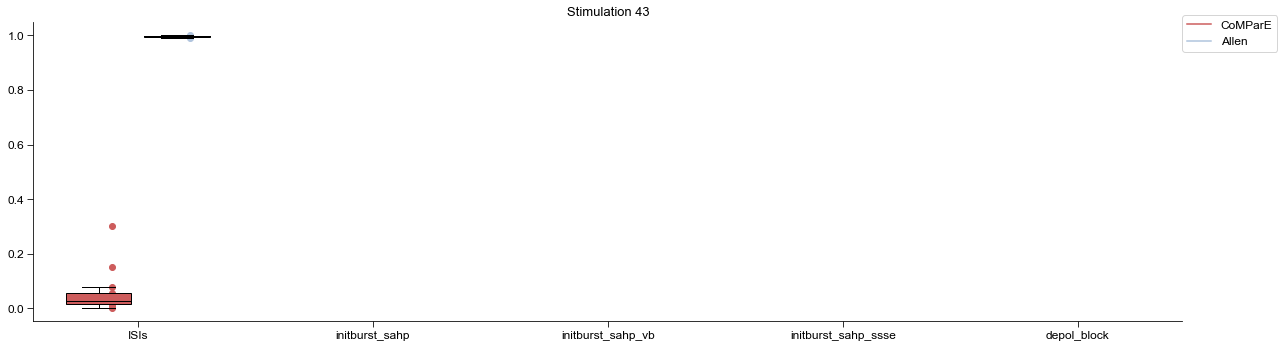

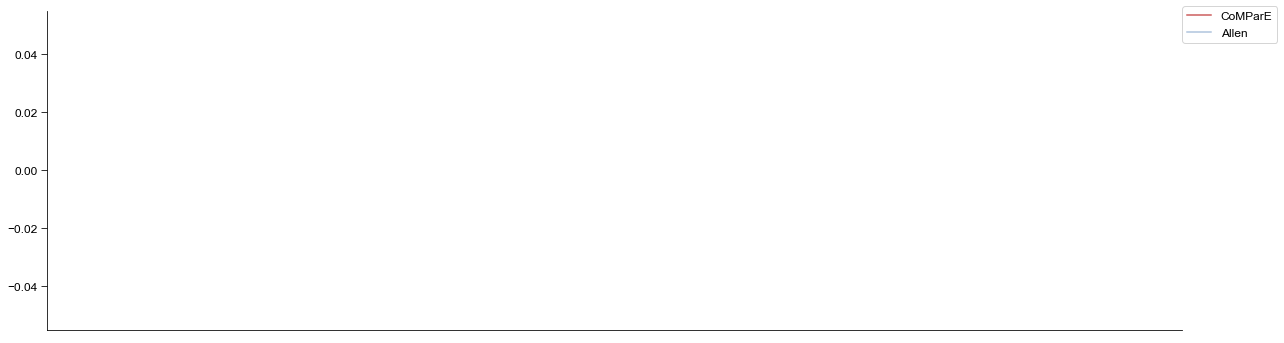

In [315]:
pdf_efel_box_plot = PdfPages('efel_box_plot.pdf')
sweep_key = '43'
for j in range(0, len(efel.api.getFeatureNames())+6, 6):
    f_names = efel.api.getFeatureNames()[j:j+6]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
    for i in range(len(f_names)):
        labels = ['CoMParE', 'Allen']
        efel_name = f_names[i]
        if efel_name in feature_devs_per_stim_feature_dict[sweep_key]:
            bplot1 = ax.boxplot(feature_devs_per_stim_feature_dict[sweep_key][efel_name][0],
                                 vert=True,  # vertical box alignment
                                 patch_artist=True,  # fill with color
                                 widths=0.5,
                                 boxprops=dict(facecolor='indianred'),
                                 medianprops=dict(color='black'),
                                 showfliers=False,
                                 positions=[0.5+1.8*i])  # will be used to label x-ticks
            bplot2 = ax.boxplot(feature_devs_per_stim_feature_dict[sweep_key][efel_name][1],
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             widths=0.5,
                             boxprops=dict(facecolor='lightsteelblue'),
                             medianprops=dict(color='black'),
                             showfliers=False,
                             positions=[1.1+1.8*i])  # will be used to label x-ticks
            ax.scatter([0.6+1.8*i for e in feature_devs_per_stim_feature_dict[sweep_key][efel_name][0]],\
                       feature_devs_per_stim_feature_dict[sweep_key][efel_name][0], color='indianred')
            ax.scatter([1.2+1.8*i for e in feature_devs_per_stim_feature_dict[sweep_key][efel_name][1]],\
                       feature_devs_per_stim_feature_dict[sweep_key][efel_name][1], color='lightsteelblue')
            ax.set_title('Stimulation '+sweep_key)

        #ax.set_xlabel('Three separate samples')
    ax.set_xticks([0.8+1.8*i for i in range(len(f_names))])
    ax.set_xticklabels(f_names)
    ax.plot([], label='CoMParE', color='indianred')
    ax.plot([], label='Allen', color='lightsteelblue')
    plt.legend(loc=(1,0.9))
    plt.tight_layout()
    pdf_efel_box_plot.savefig(fig, bbox_inches='tight')
pdf_efel_box_plot.close()

In [208]:
#selected_efel_features = ['Spikecount', 'time_to_first_spike', 'AP_amplitude_from_voltagebase', 'AHP_depth', 'AP_width', 'ISIs']
selected_efel_features = ['AHP_depth', 'AP_duration', 'AP_rise_rate', 'all_ISI_values', 'mean_AP_amplitude', 'voltage_base']

/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_72729/2363479461.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))


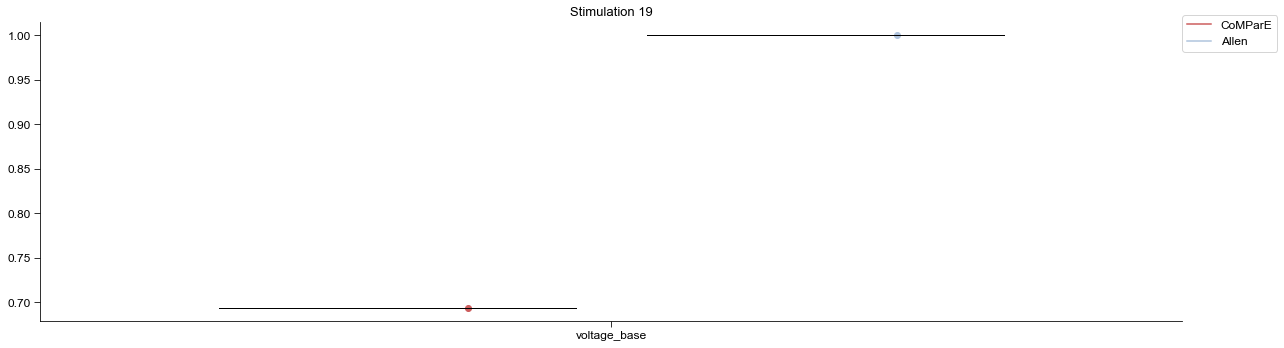

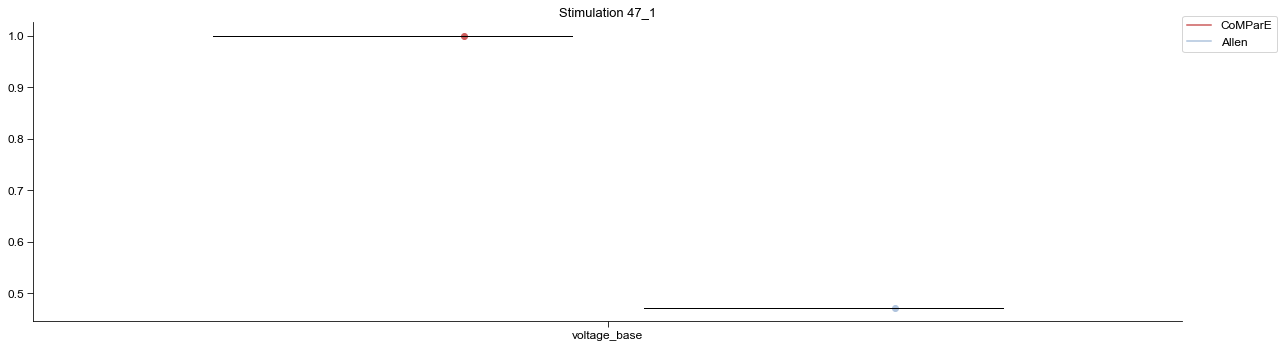

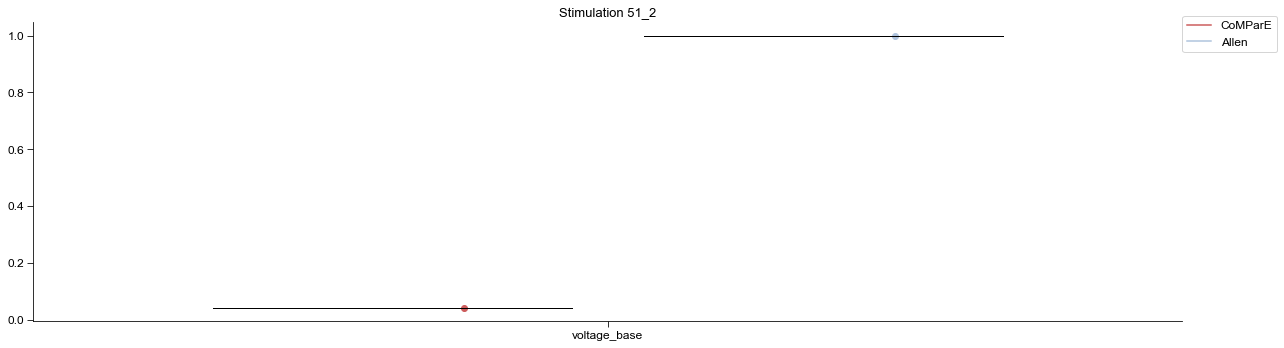

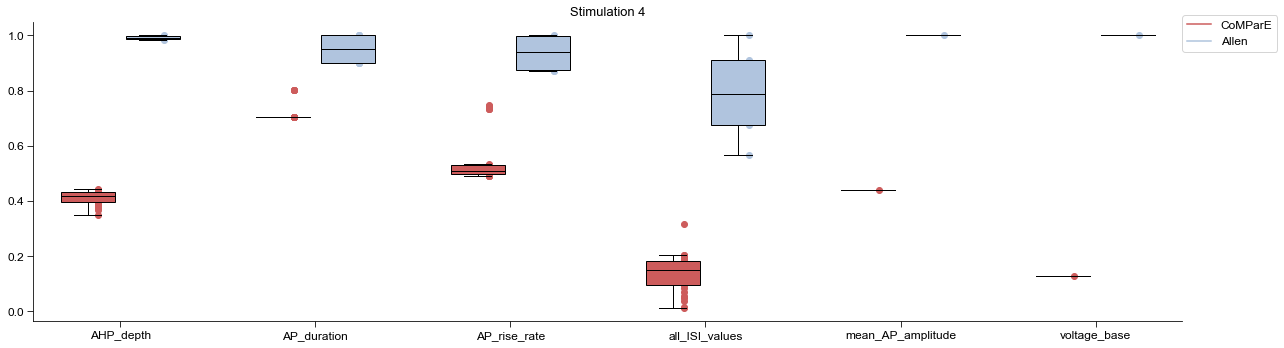

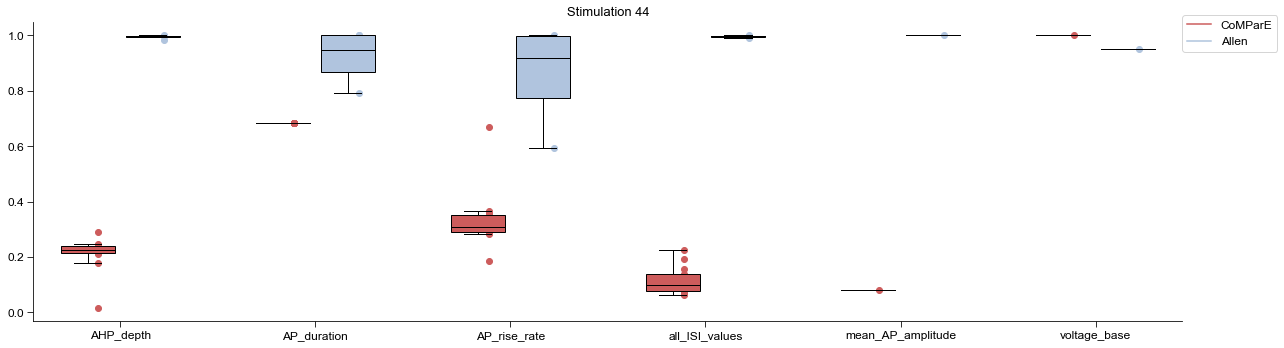

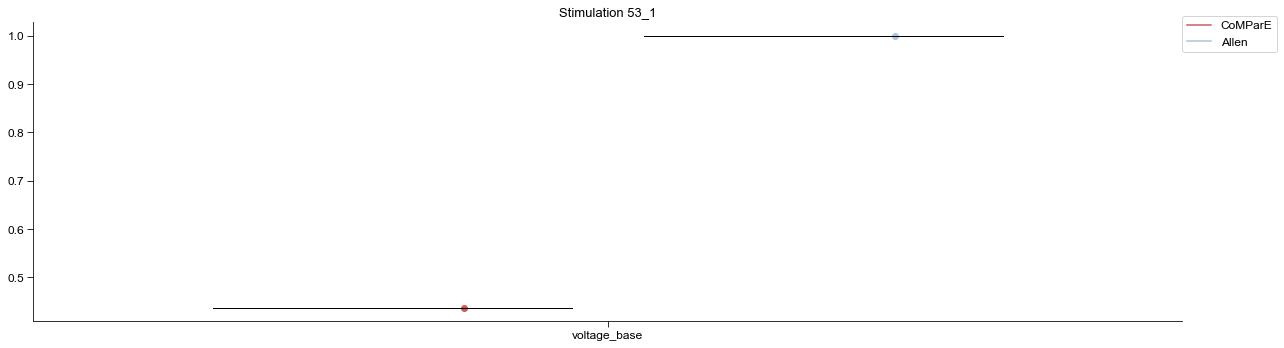

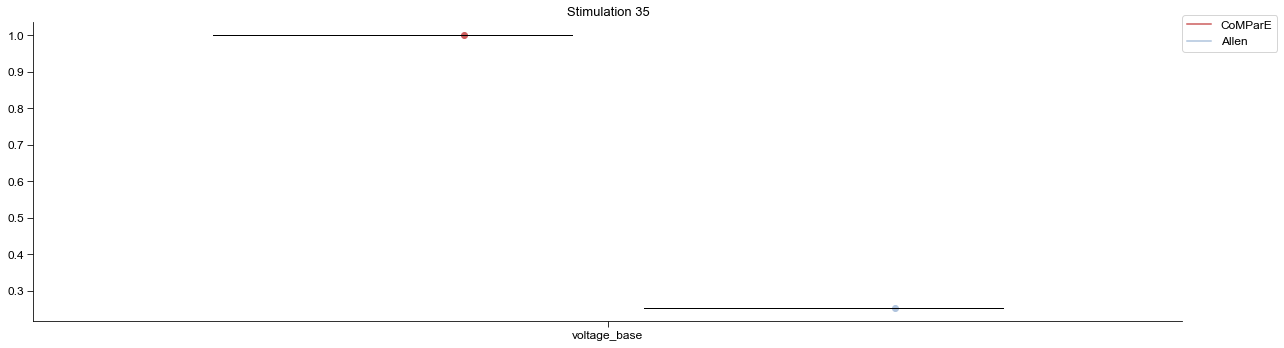

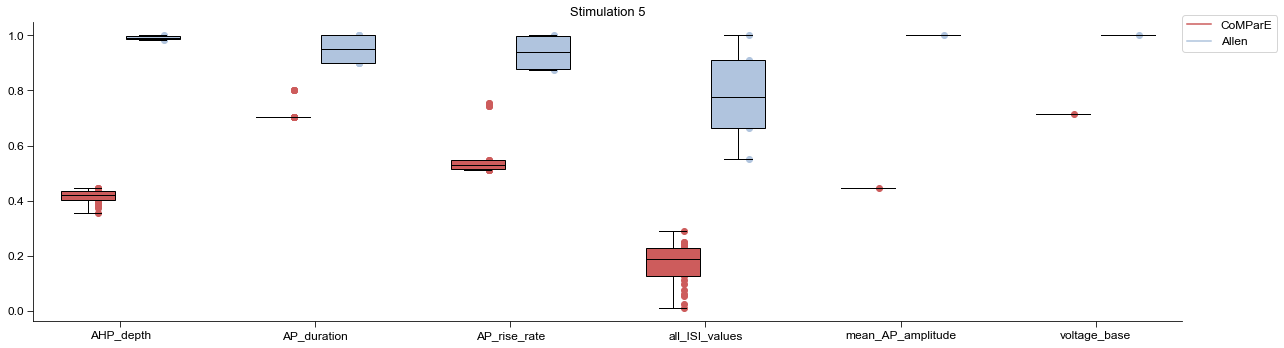

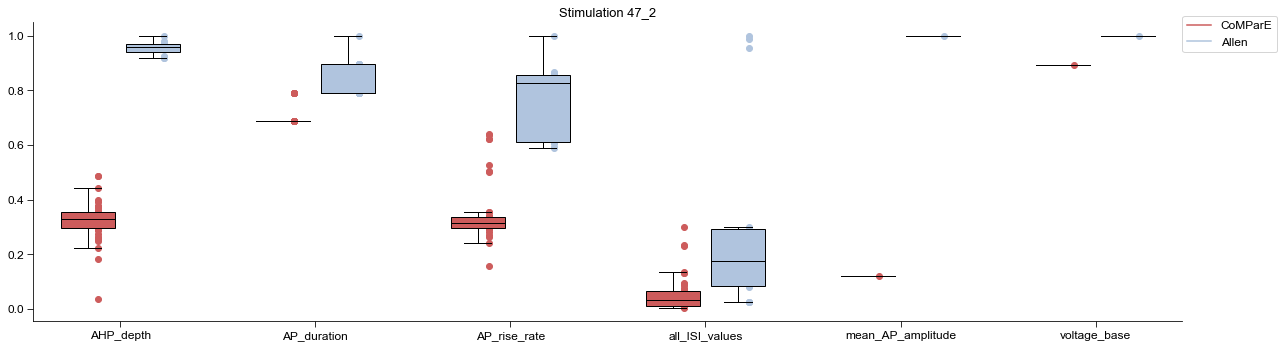

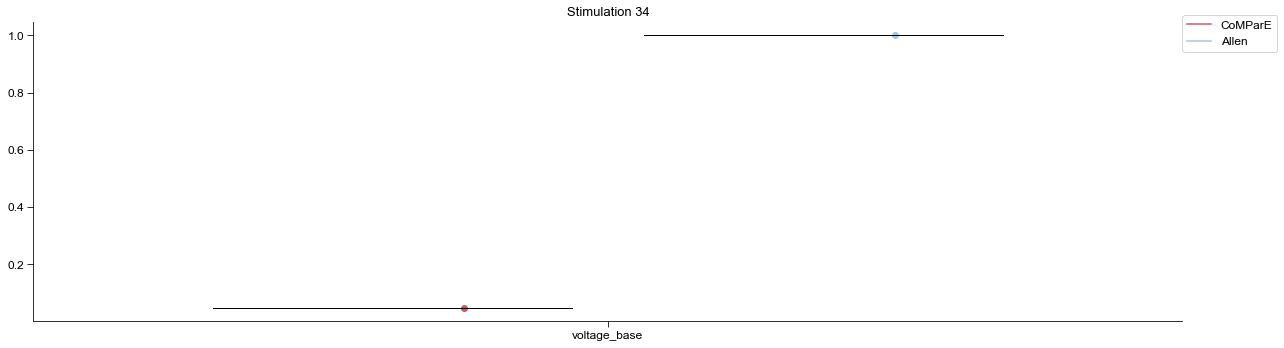

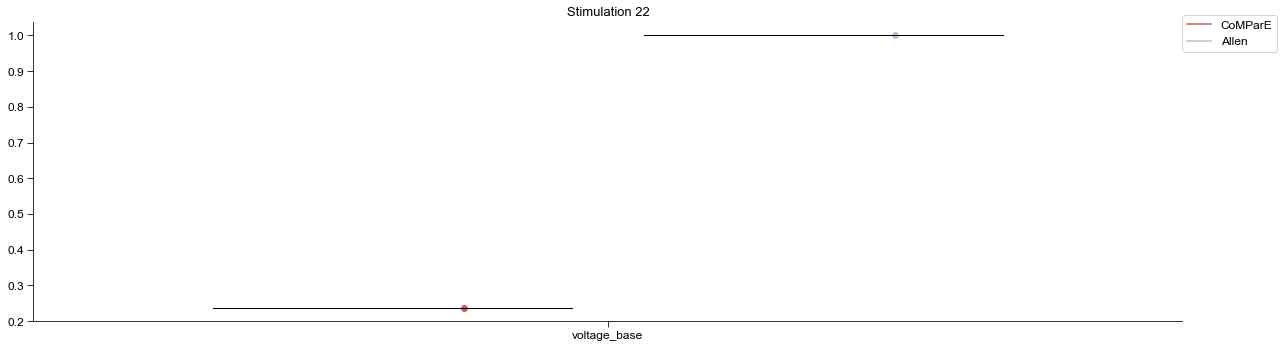

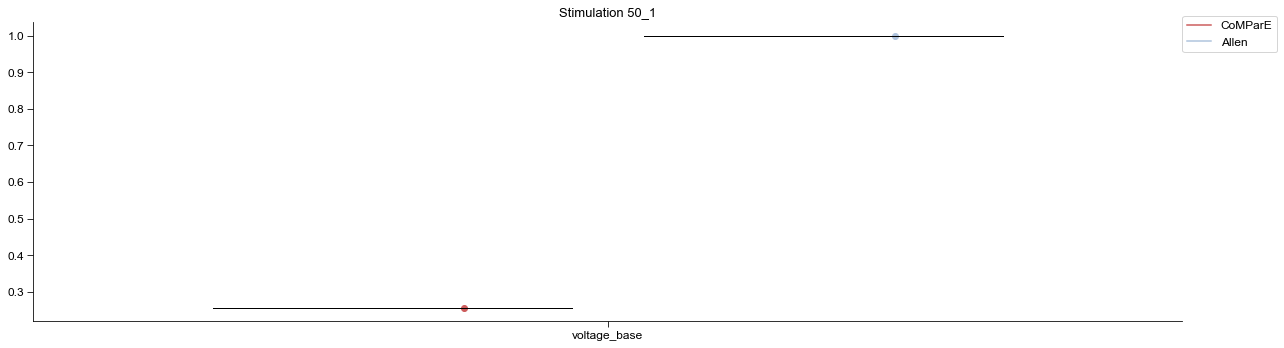

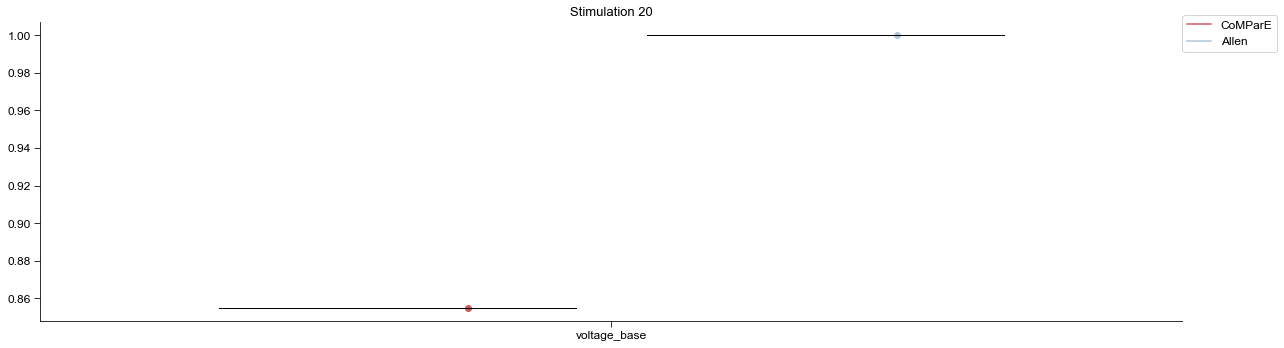

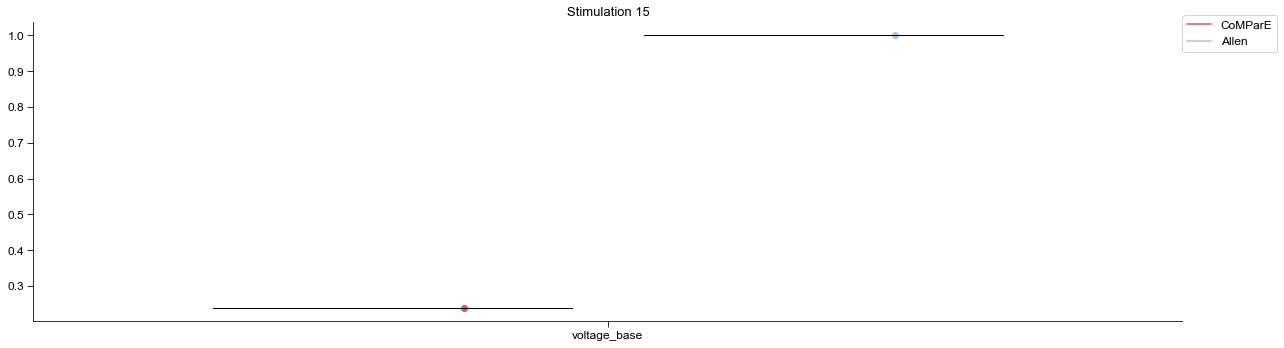

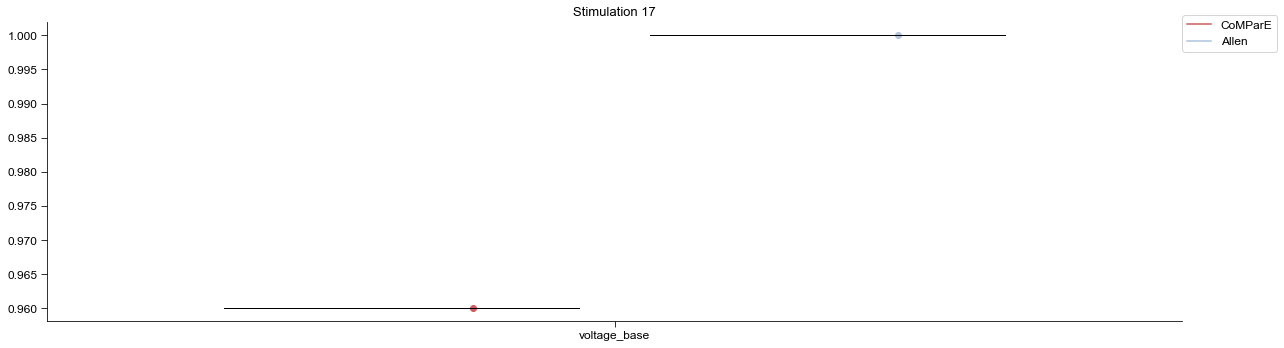

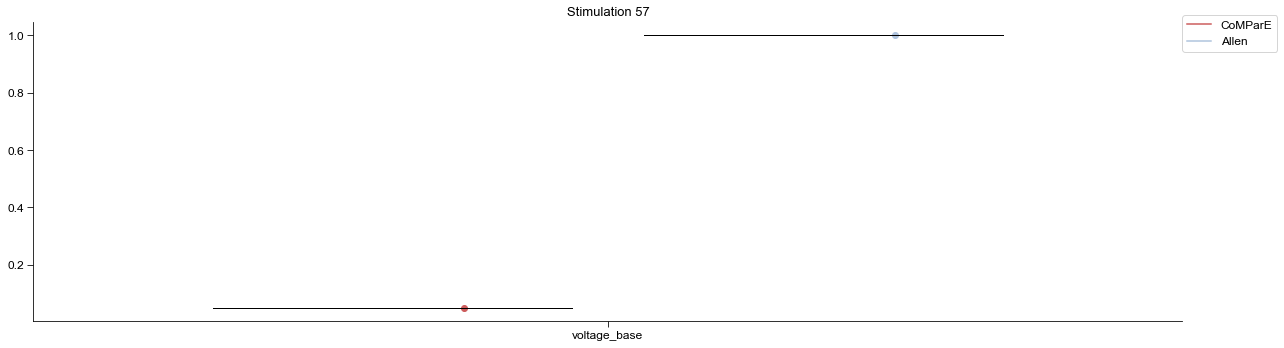

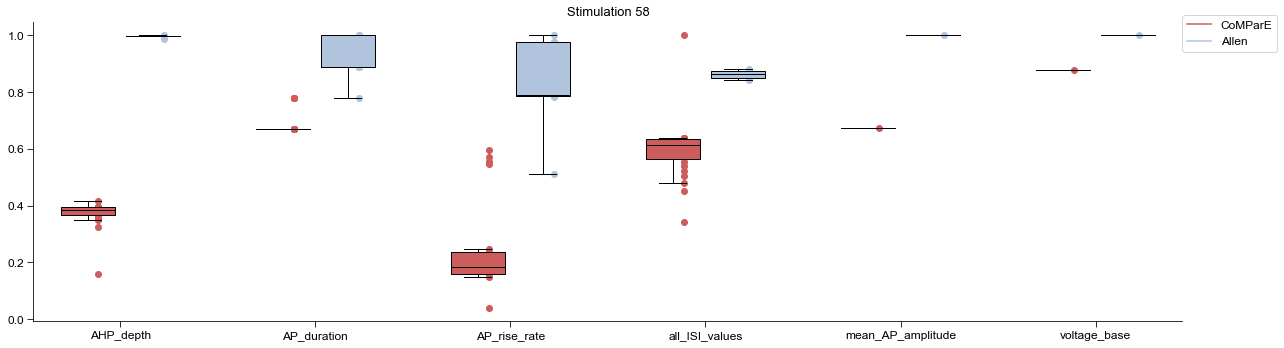

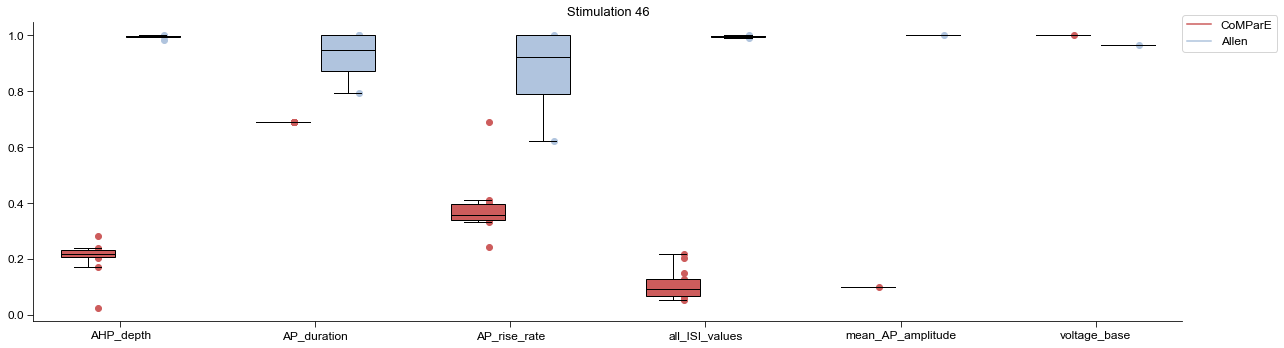

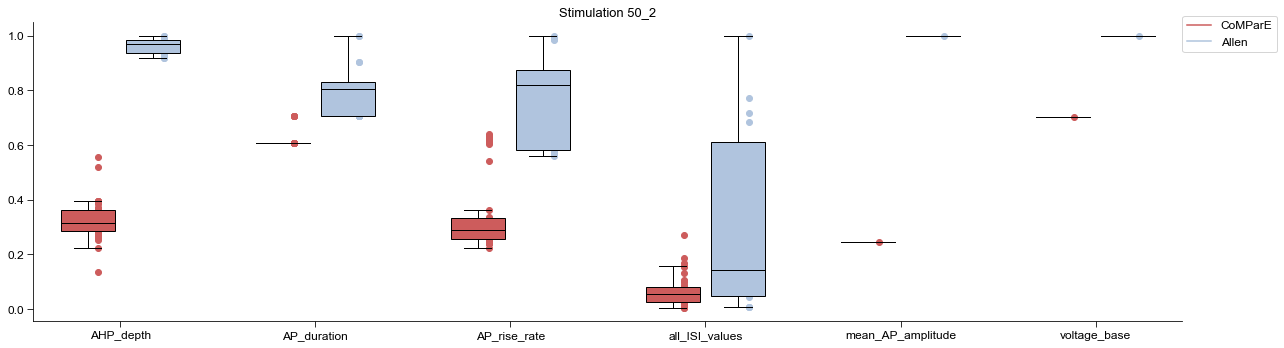

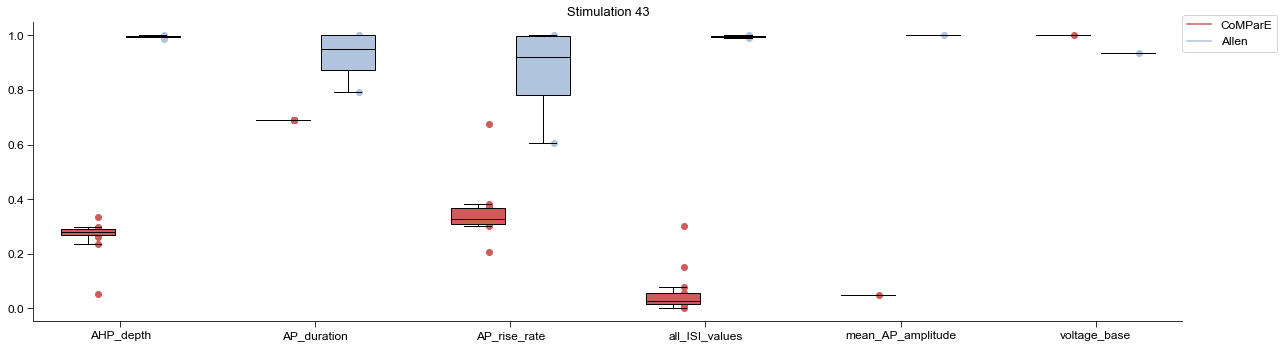

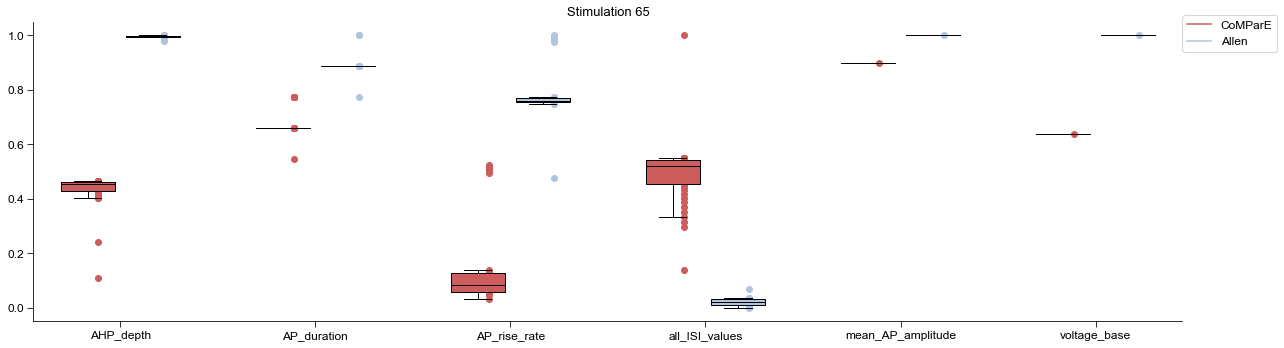

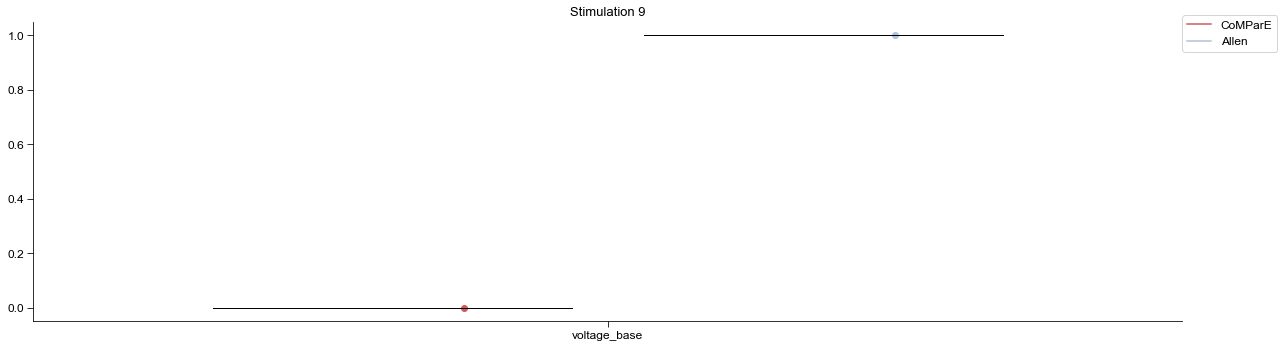

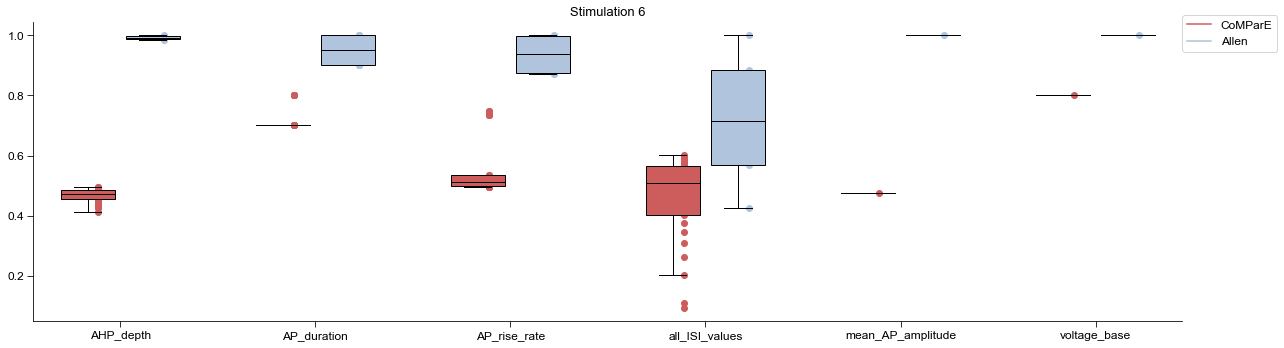

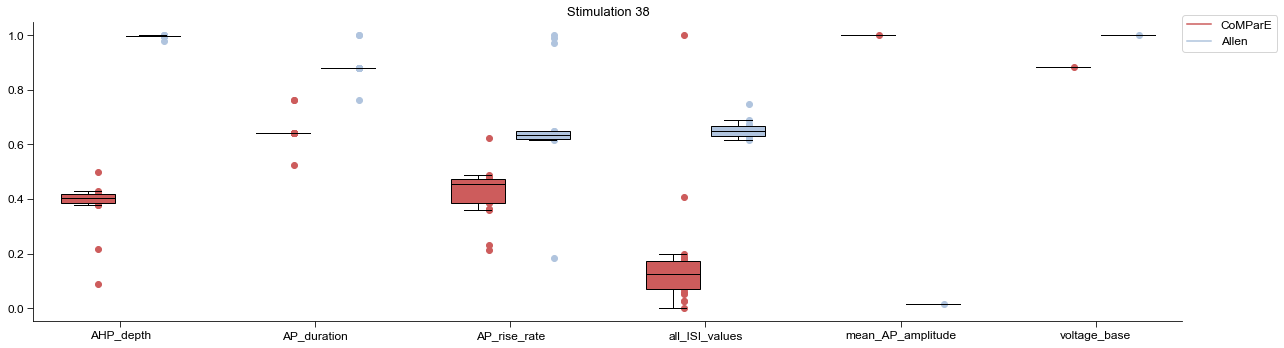

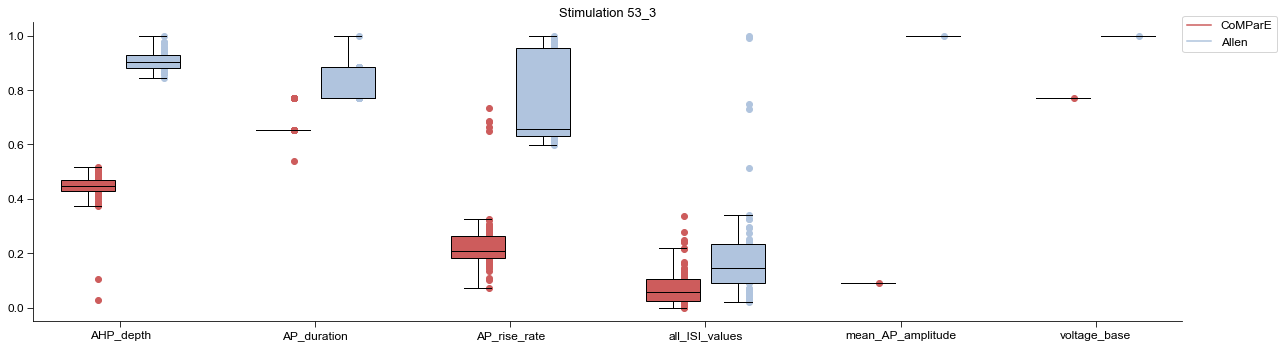

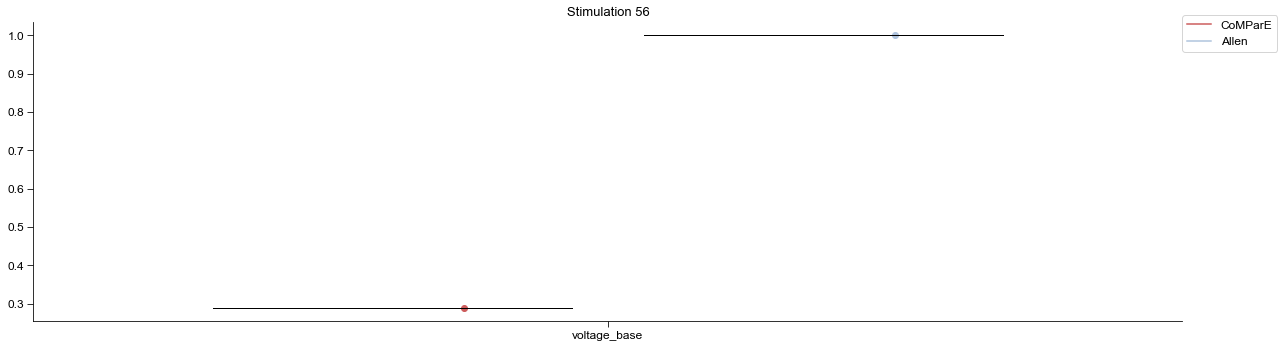

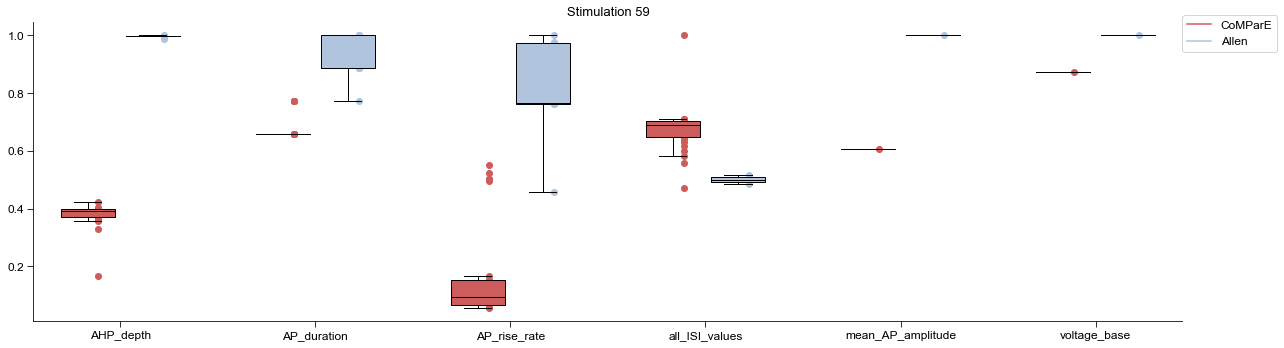

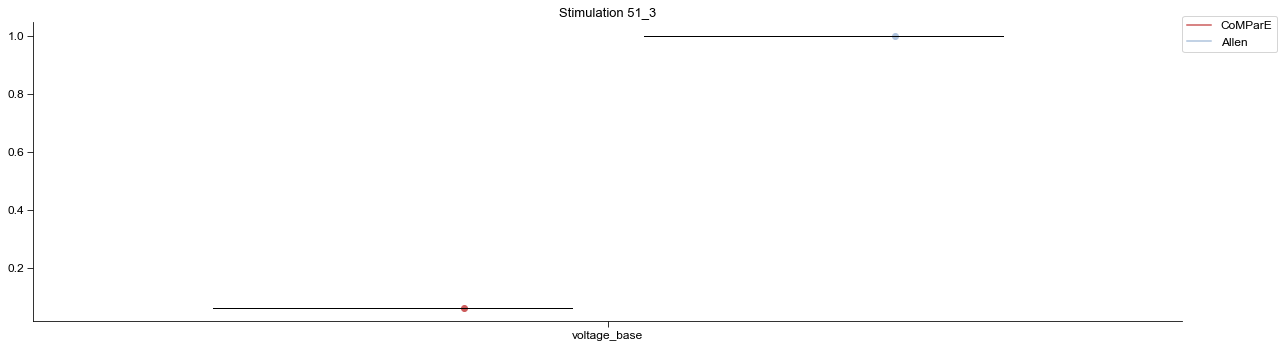

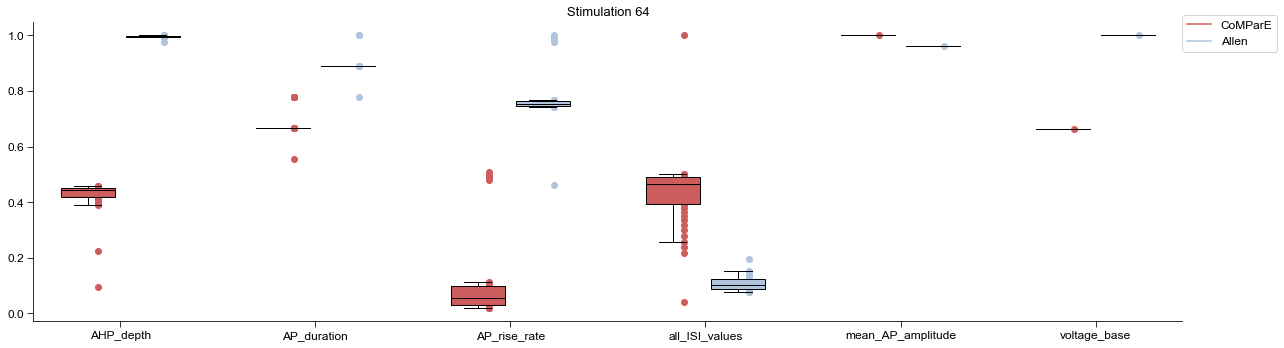

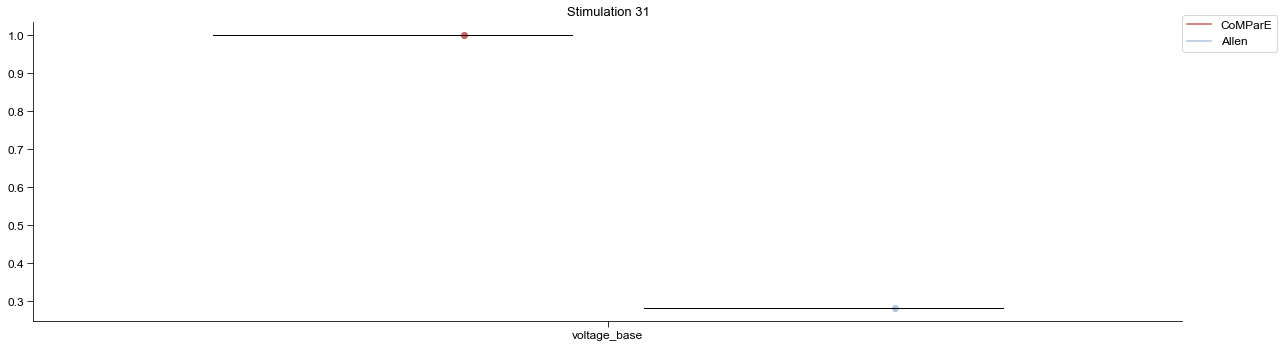

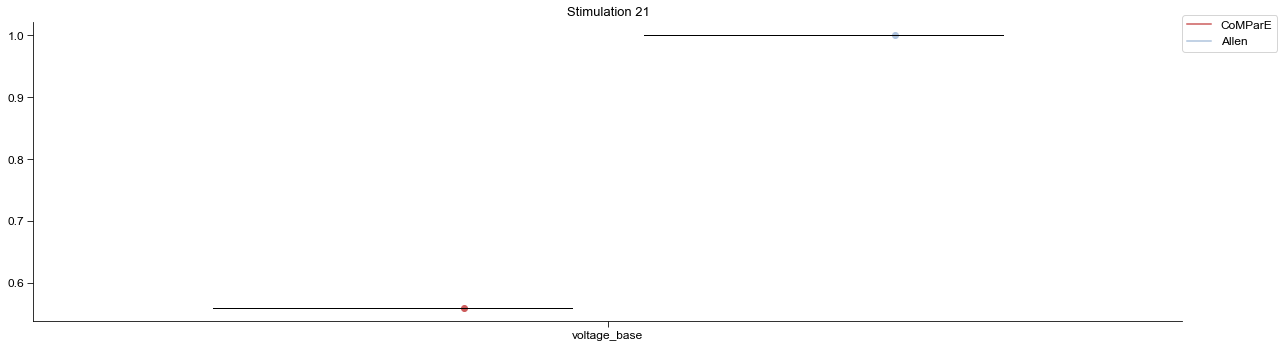

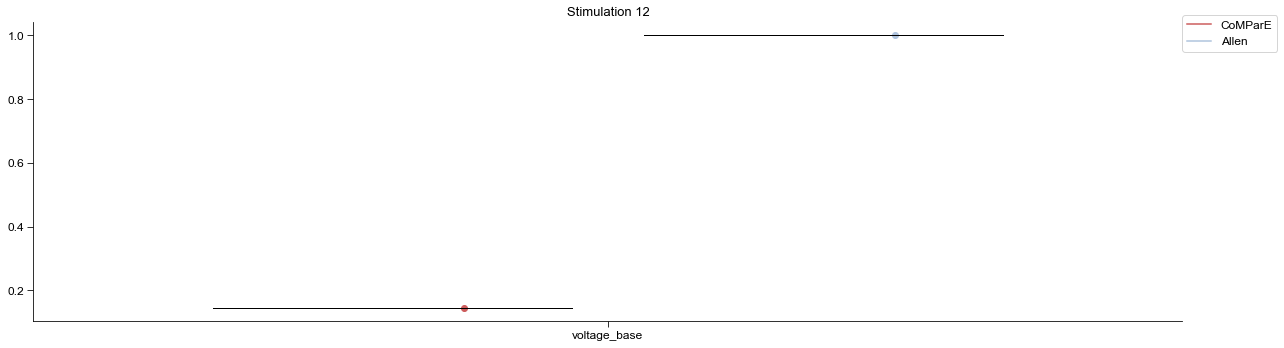

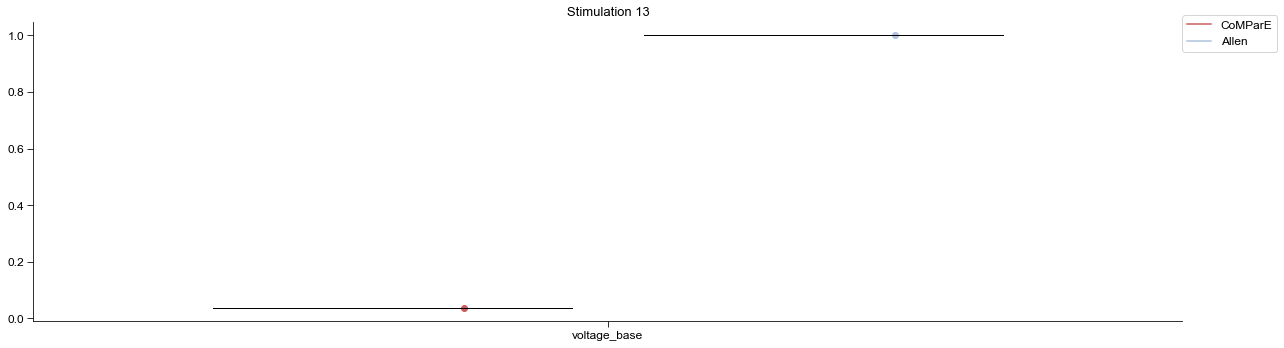

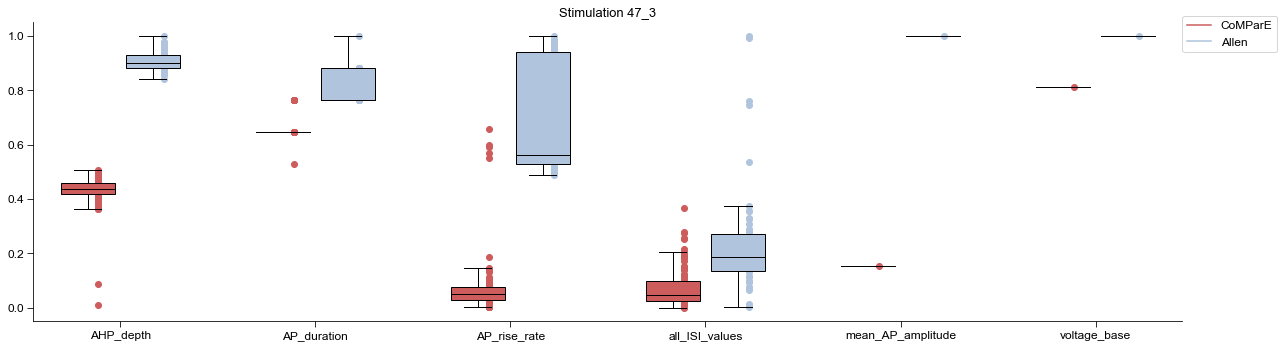

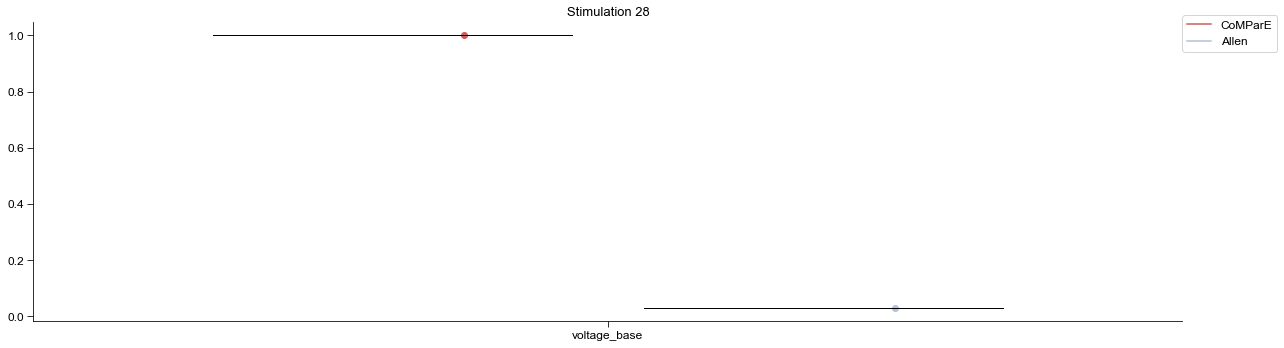

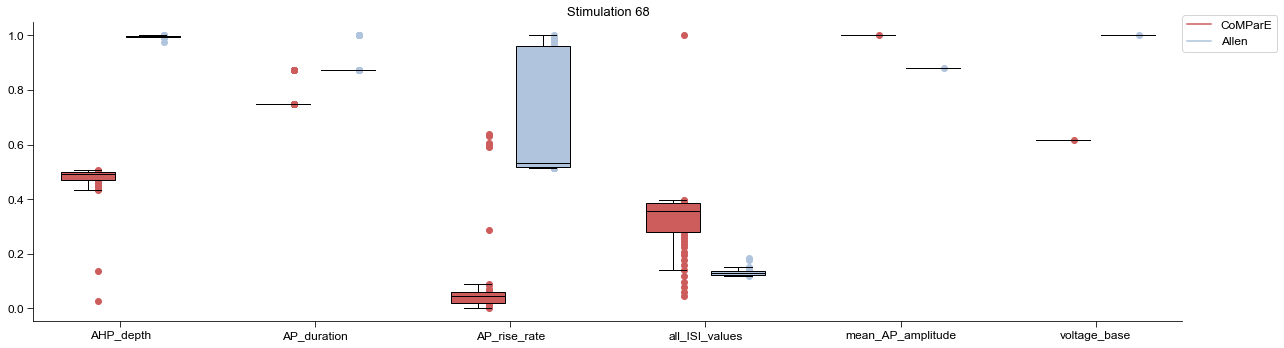

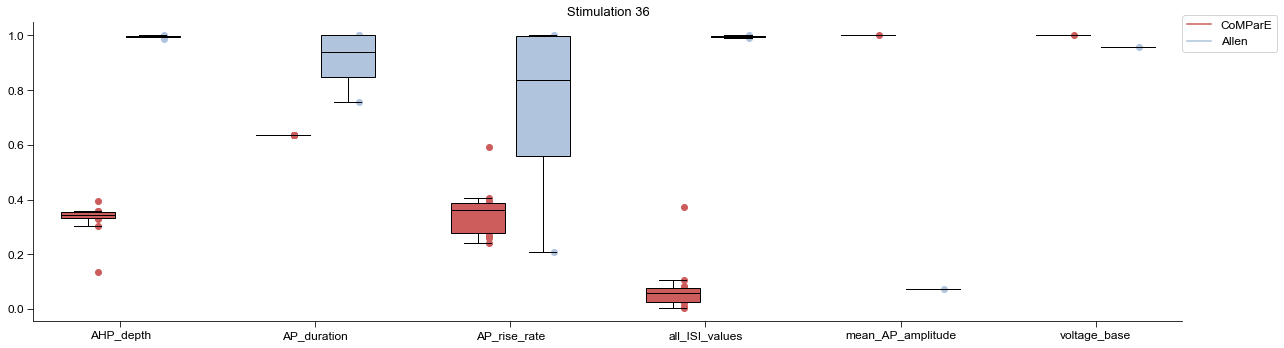

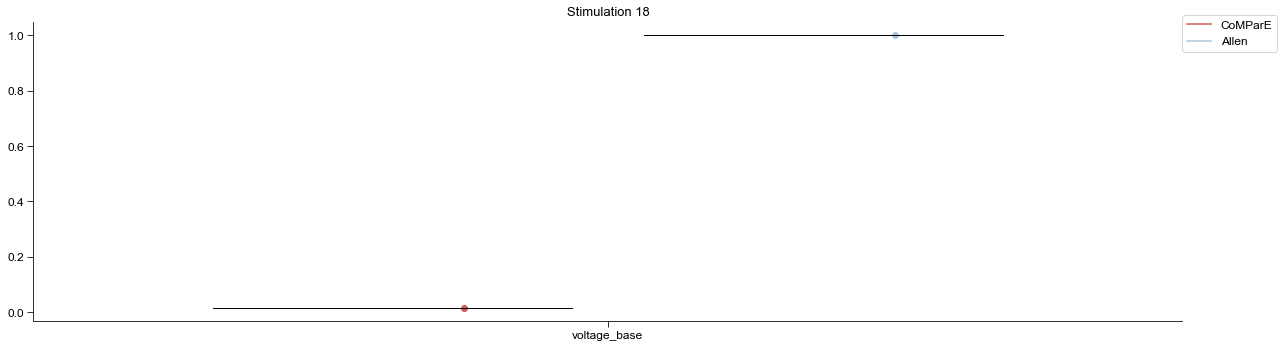

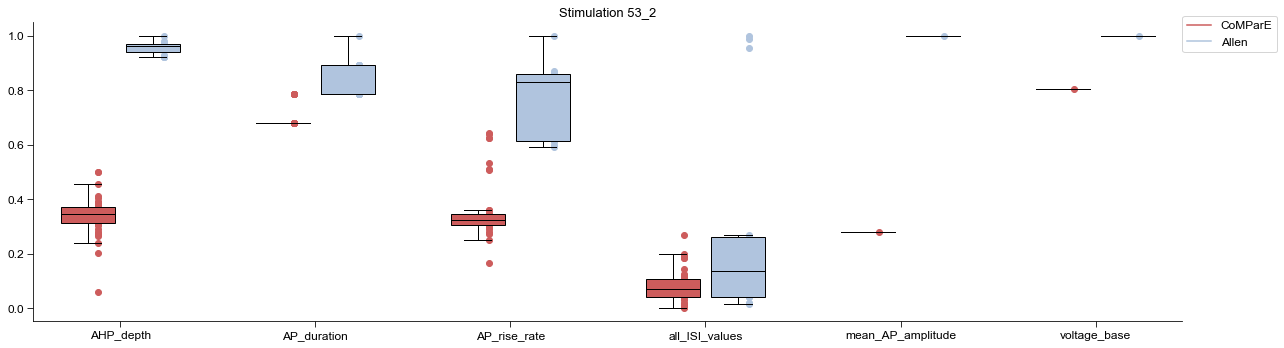

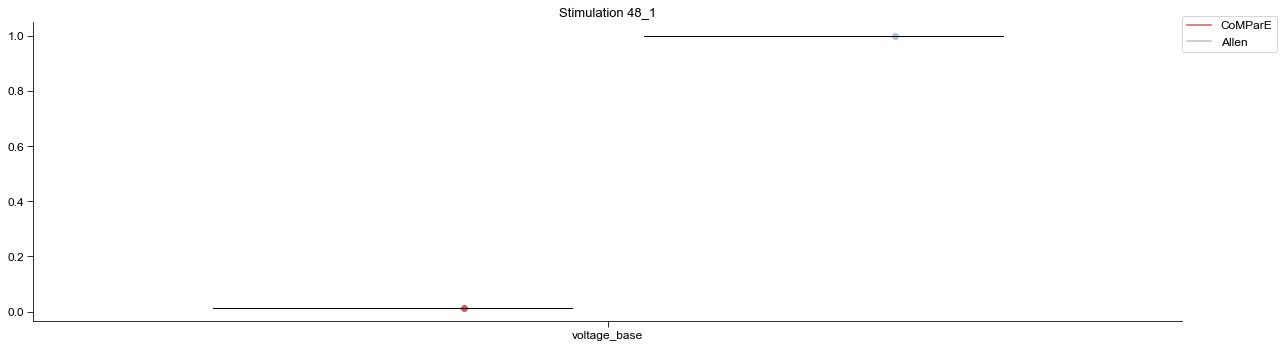

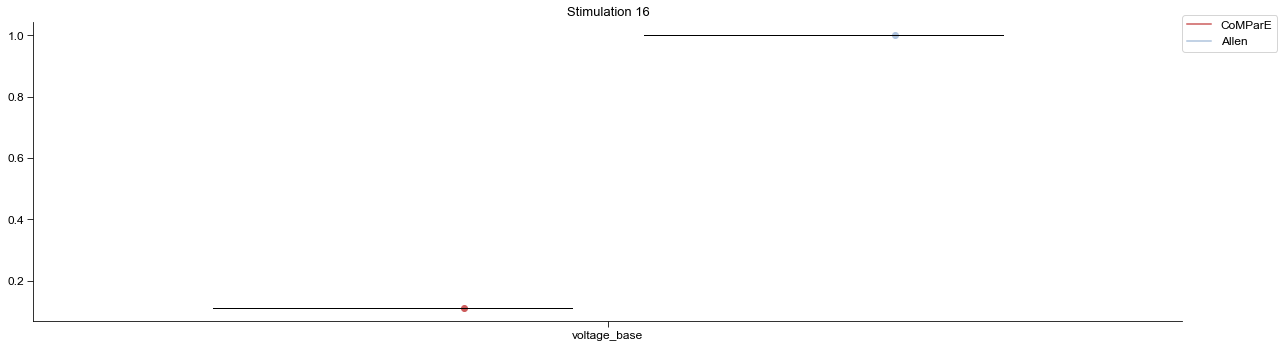

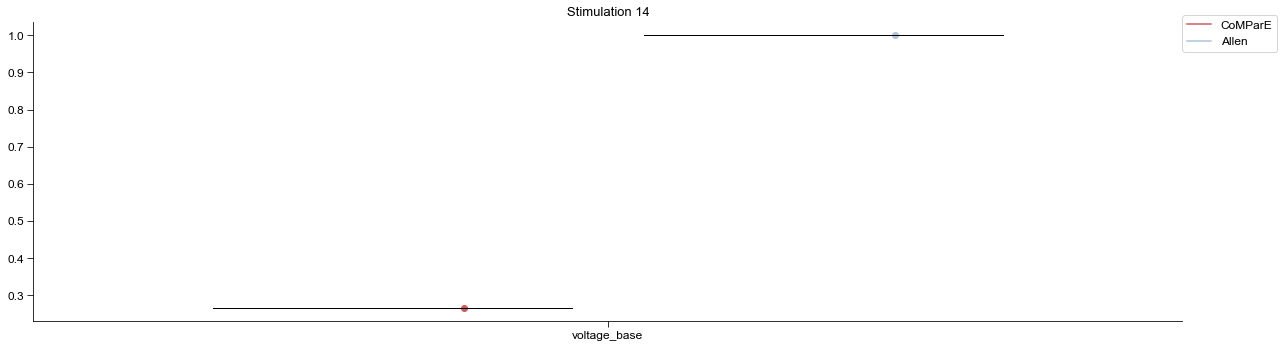

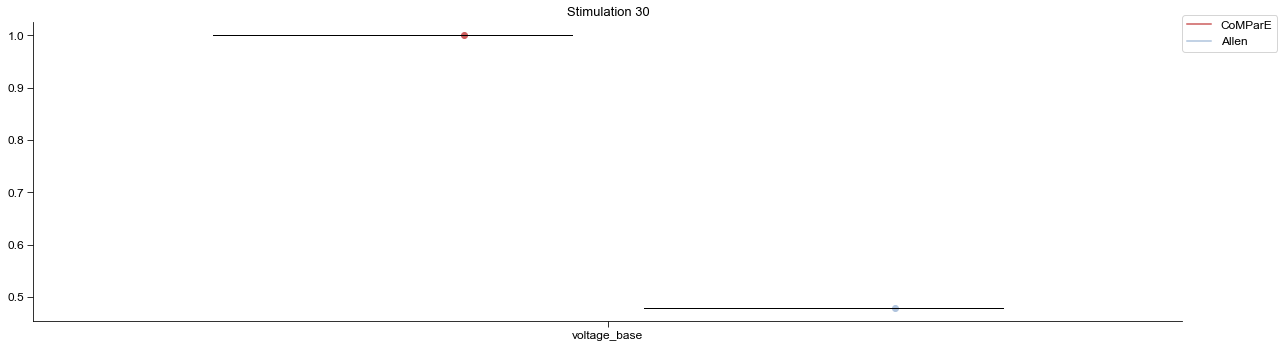

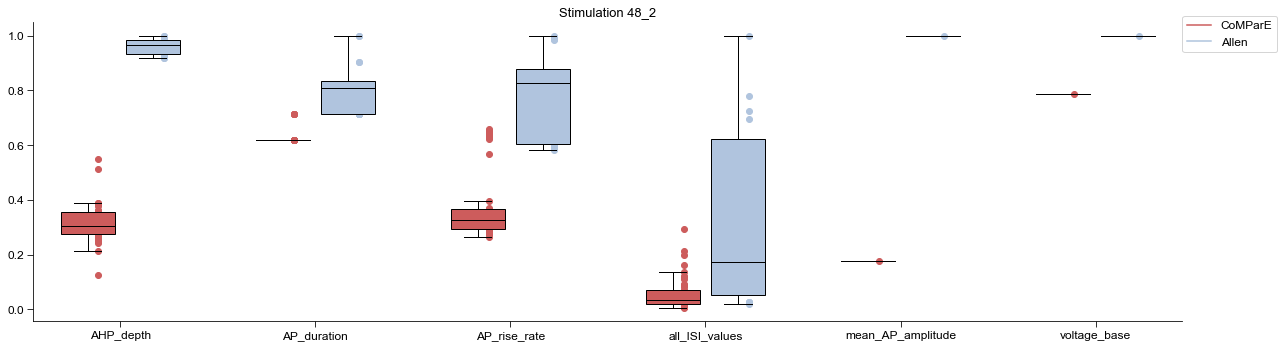

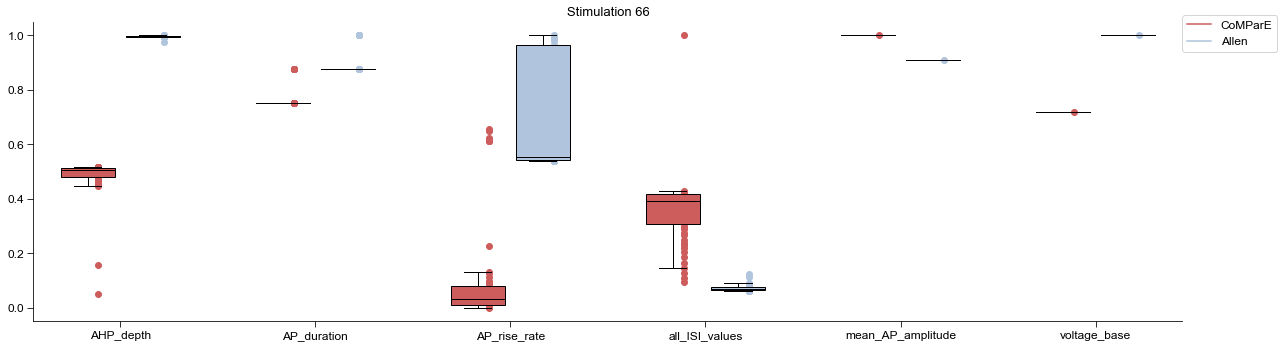

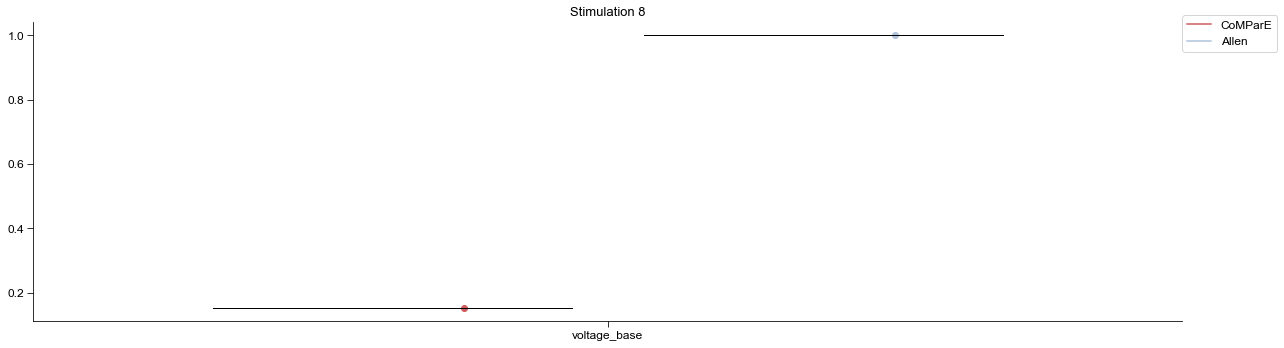

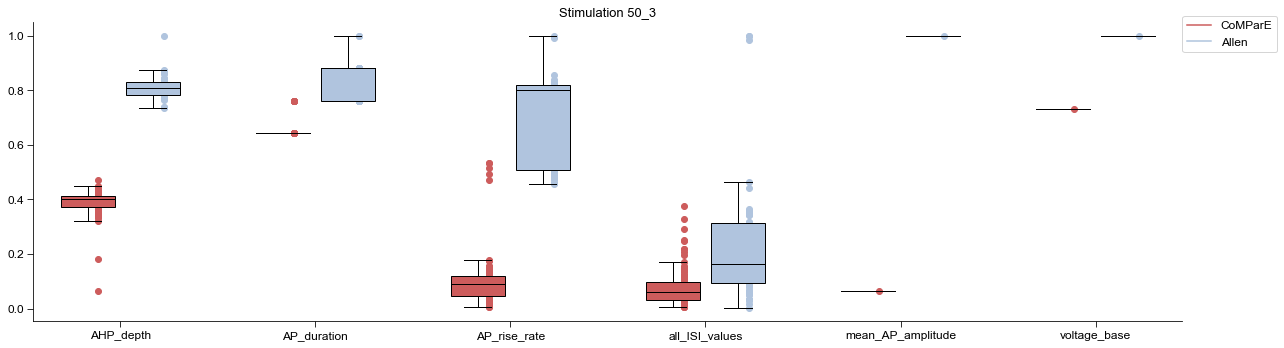

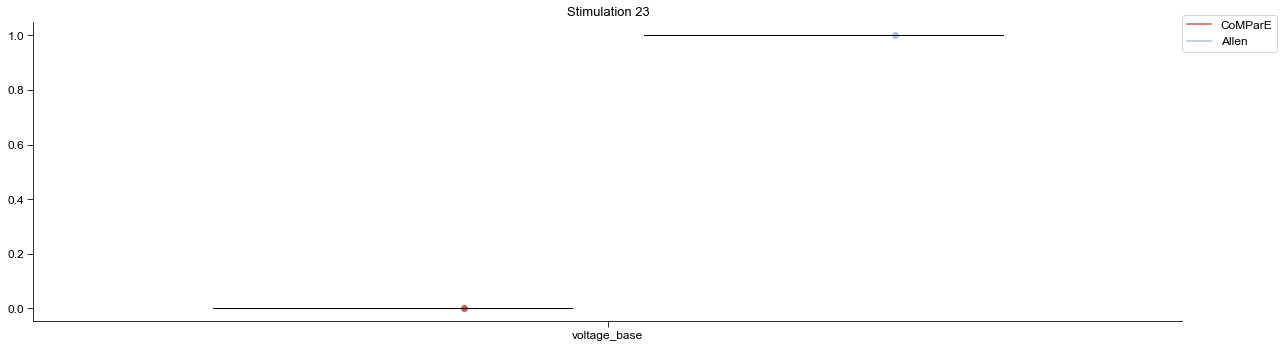

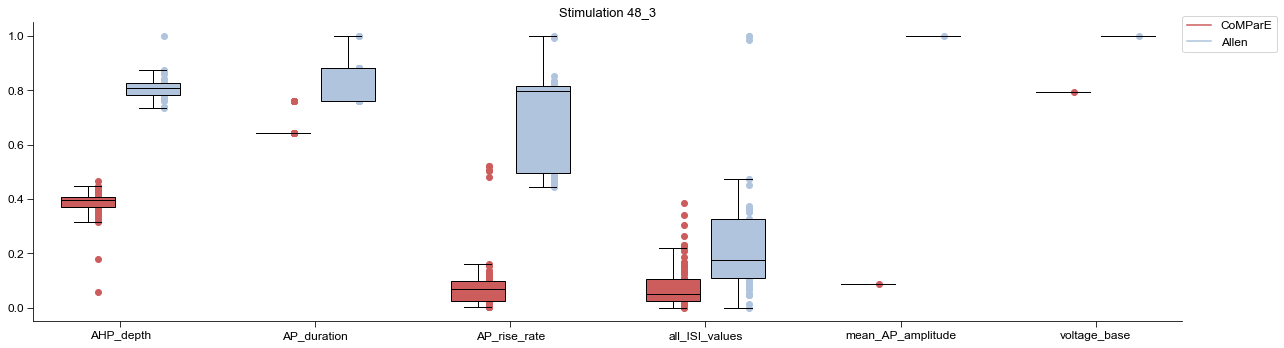

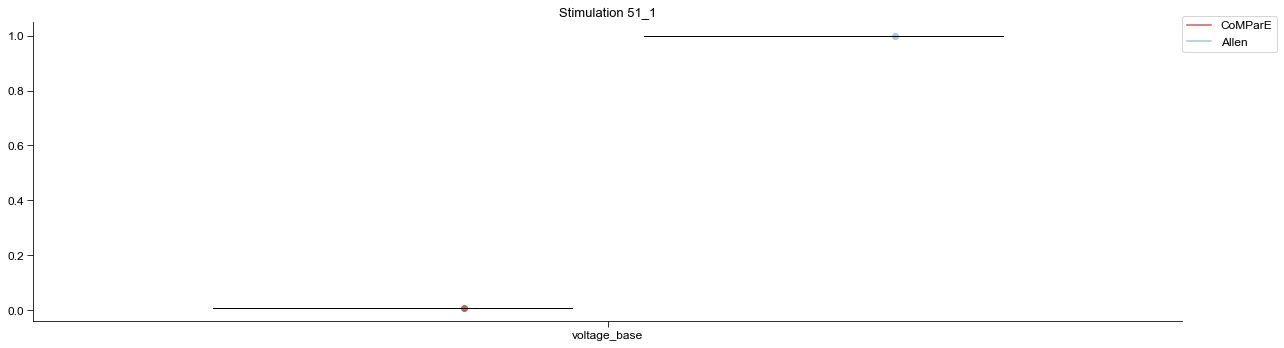

In [311]:
pdf_efel_box_plot_selected = PdfPages('efel_box_plot_selected_efel_ver2.pdf')
for sweep_key in efel_data.keys():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
    for i in range(len(selected_efel_features)):
        labels = ['CoMParE', 'Allen']
        efel_name = selected_efel_features[i]
        if efel_name in feature_devs_per_stim_feature_dict[sweep_key]:
            bplot1 = ax.boxplot(feature_devs_per_stim_feature_dict[sweep_key][efel_name][0],
                                 vert=True,  # vertical box alignment
                                 patch_artist=True,  # fill with color
                                 widths=0.5,
                                 boxprops=dict(facecolor='indianred'),
                                 medianprops=dict(color='black'),
                                 showfliers=False,
                                 positions=[0.5+1.8*i])  # will be used to label x-ticks
            bplot2 = ax.boxplot(feature_devs_per_stim_feature_dict[sweep_key][efel_name][1],
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             widths=0.5,
                             boxprops=dict(facecolor='lightsteelblue'),
                             medianprops=dict(color='black'),
                             showfliers=False,
                             positions=[1.1+1.8*i])  # will be used to label x-ticks
            ax.scatter([0.6+1.8*i for e in feature_devs_per_stim_feature_dict[sweep_key][efel_name][0]],\
                       feature_devs_per_stim_feature_dict[sweep_key][efel_name][0], color='indianred')
            ax.scatter([1.2+1.8*i for e in feature_devs_per_stim_feature_dict[sweep_key][efel_name][1]],\
                       feature_devs_per_stim_feature_dict[sweep_key][efel_name][1], color='lightsteelblue')
            ax.set_title('Stimulation '+sweep_key)

            #ax.set_xlabel('Three separate samples')
    ax.set_xticks([0.8+1.8*i for i in range(len(selected_efel_features))])
    ax.set_xticklabels(selected_efel_features)
    ax.plot([], label='CoMParE', color='indianred')
    ax.plot([], label='Allen', color='lightsteelblue')
    plt.legend(loc=(1,0.9))
    plt.tight_layout()
    pdf_efel_box_plot_selected.savefig(fig, bbox_inches='tight')
pdf_efel_box_plot_selected.close()


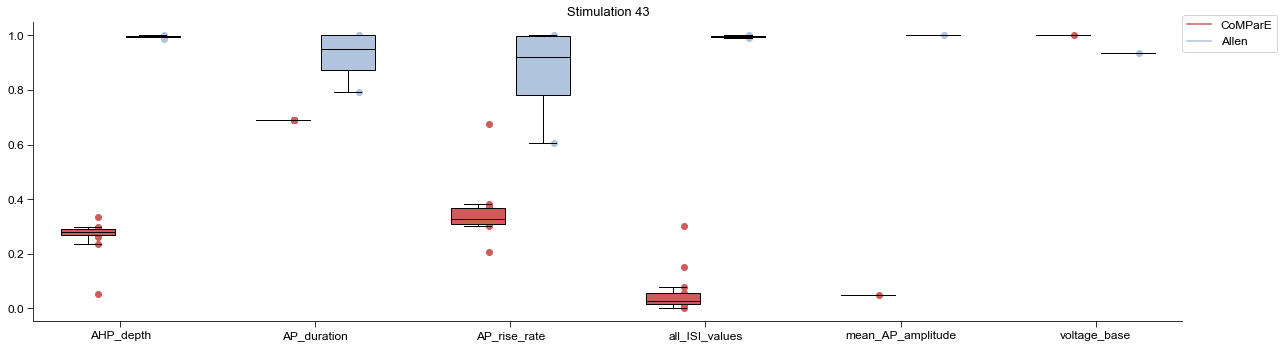

In [308]:

pdf_efel_box_plot_43 = PdfPages('efel_box_plot_selected_efel_43_ver2.pdf')
sweep_key = '43'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
for i in range(len(selected_efel_features)):
    labels = ['CoMParE', 'Allen']
    efel_name = selected_efel_features[i]
#     ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
    # rectangular box plot
    bplot1 = ax.boxplot(feature_devs_per_stim_feature_dict[sweep_key][efel_name][0],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         widths=0.5,
                         boxprops=dict(facecolor='indianred'),
                         medianprops=dict(color='black'),
                         showfliers=False,
                         positions=[0.5+1.8*i])  # will be used to label x-ticks
    bplot2 = ax.boxplot(feature_devs_per_stim_feature_dict[sweep_key][efel_name][1],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     widths=0.5,
                     boxprops=dict(facecolor='lightsteelblue'),
                     medianprops=dict(color='black'),
                     showfliers=False,
                     positions=[1.1+1.8*i])  # will be used to label x-ticks
    ax.scatter([0.6+1.8*i for e in feature_devs_per_stim_feature_dict[sweep_key][efel_name][0]],\
               feature_devs_per_stim_feature_dict[sweep_key][efel_name][0], color='indianred')
    ax.scatter([1.2+1.8*i for e in feature_devs_per_stim_feature_dict[sweep_key][efel_name][1]],\
               feature_devs_per_stim_feature_dict[sweep_key][efel_name][1], color='lightsteelblue')
    ax.set_title('Stimulation '+sweep_key)

    #ax.set_xlabel('Three separate samples')
ax.set_xticks([0.8+1.8*i for i in range(len(selected_efel_features))])
ax.set_xticklabels(selected_efel_features)
ax.plot([], label='CoMParE', color='indianred')
ax.plot([], label='Allen', color='lightsteelblue')
plt.legend(loc=(1,0.9))
plt.tight_layout()
pdf_efel_box_plot_43.savefig(fig, bbox_inches='tight')
pdf_efel_box_plot_43.close()
